In [1]:
run_gridsearch = True
skip_best_model_train = False
hyperparam_csv_file = "CV_calpella_daily_hyperparams.csv"

In [2]:
import sys
import os
import itertools
import pandas as pd
current_dir = os.getcwd()
print(current_dir)

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all


In [3]:
library_path = os.path.join('..', '..', '..','..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)
print(sys.path)

['..\\..\\..\\..\\UCB-USACE-LSTMs', 'c:\\Users\\arman\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip', 'c:\\Users\\arman\\AppData\\Local\\Programs\\Python\\Python311\\Lib', 'c:\\Users\\arman\\AppData\\Local\\Programs\\Python\\Python311\\DLLs', '', 'C:\\Users\\arman\\AppData\\Roaming\\Python\\Python311\\site-packages', 'C:\\Users\\arman\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32', 'C:\\Users\\arman\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32\\lib', 'C:\\Users\\arman\\AppData\\Roaming\\Python\\Python311\\site-packages\\Pythonwin', 'c:\\Users\\arman\\AppData\\Local\\Programs\\Python\\Python311', 'c:\\Users\\arman\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages']


In [4]:
from pathlib import Path
from neuralhydrology.evaluation.metrics import *
from UCB_training.UCB_train import UCB_trainer
from UCB_training.UCB_utils import (combinedPlot, fancyCombinedPlot, combinedPlotFromDf, fancyCombinedPlotFromDf)

In [5]:
current_path = os.getcwd()
library_path = current_path.split('UCB-USACE-LSTMs')[0] + 'UCB-USACE-LSTMs'

target_path = os.path.join(library_path, 'UCB_training', 'models', 'calpella_all')

if os.path.exists(target_path):
    os.chdir(target_path)
    print("Current Working Directory:", os.getcwd())
    print("Train Basin File Exists:", os.path.exists("calpella")) 
else:
    print(f"Error: The target path '{target_path}' does not exist.")

Current Working Directory: c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all
Train Basin File Exists: True


In [6]:
path_to_csv = Path(library_path +'/russian_river_data')
path_to_yaml = Path("calpella_gage_nlayer.yaml")
path_to_physics_data = Path(library_path + "/russian_river_data/Calpella_daily.csv")

In [7]:
features_with_physics = [
    #from hourly
    "EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "POTTER VALLEY CA FLOW USGS_ADJUSTED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    #from new capella.csv
    'Capella Gage FLOW',
    'EF Russian 20 ET-POTENTIAL',
    'EF Russian 20 FLOW',
    'EF Russian 20 FLOW-BASE',
    'EF Russian 20 INFILTRATION',
    'EF Russian 20 PERC-SOIL',
    'EF Russian 20 SATURATION FRACTION',
    #    'Lake Mendocino Storage',
]

In [8]:
hyperparam_space = {
    "hidden_size": [64, 128, 256],
    "seq_length": [90, 180],
    "num_layers": [1, 2],
    "epochs": [16, 32]
}
fixed_dropout = 0.4
no_physics_results = []
physics_results = []

In [9]:
if run_gridsearch or not os.path.exists(hyperparam_csv_file):
    for (hs, seq, nl, ep) in itertools.product(
            hyperparam_space["hidden_size"],
            hyperparam_space["seq_length"],
            hyperparam_space["num_layers"],
            hyperparam_space["epochs"]
    ):
        hp = {
            "hidden_size": hs,
            "seq_length": seq,
            "num_layers": nl,
            "epochs": ep,
            "output_dropout": fixed_dropout,
        }
        print(f"NoPhysics: {hp}")
        trainer = UCB_trainer(
            path_to_csv_folder=path_to_csv,
            yaml_path=path_to_yaml,
            hyperparams=hp,
            input_features=None,
            physics_informed=False,
            physics_data_file=None,
            hourly=False,
            extend_train_period=False,
            gpu=0
        )
        metrics_dict = trainer.cross_validate()
        row_data = {"hidden_size": hs, "seq_length": seq, "num_layers": nl, "epochs": ep, "output_dropout": fixed_dropout}
        for k, v in metrics_dict.items():
            row_data[k] = v
        no_physics_results.append(row_data)
    df_no_physics = pd.DataFrame(no_physics_results)
    df_no_physics.sort_values(by="avg NSE", ascending=False, inplace=True)
    df_no_physics.reset_index(drop=True, inplace=True)
else:
    print("Skipping Grid-Search")

NoPhysics: {'hidden_size': 64, 'seq_length': 90, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4}
2025-03-11 22:25:24,026: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222524\output.log initialized.
2025-03-11 22:25:24,027: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222524
2025-03-11 22:25:24,028: ### Run configurations for testing_run
2025-03-11 22:25:24,028: experiment_name: testing_run
2025-03-11 22:25:24,029: train_basin_file: calpella
2025-03-11 22:25:24,030: validation_basin_file: calpella
2025-03-11 22:25:24,030: test_basin_file: calpella
2025-03-11 22:25:24,031: train_start_date: 1994-10-01 00:00:00
2025-03-11 22:25:24,031: train_end_date: 1996-10-01 00:00:00
2025-03-11 22:25:24,032: validation_start_date: 1996-10-02 00:00:00
2025-03-11 22:25:24,033: validation_end_date: 1997-10-01 00:00:00
2025-03-11 22:25:24,033: tes

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]
2025-03-11 22:25:31,165: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222524\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:25:31,167: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222524\validation\model_epoch016\validation_results.p
2025-03-11 22:25:31,217: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222524\testing_run_1103_222531\output.log initialized.
2025-03-11 22:25:31,217: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222524\testing_run_1103_222531
2025-03-11 22:25:31,218: ### Run configurations for testing_run
2025-03-11 22:25:31,218: experiment_name: testing_run
2025-03-11 22:25:31,219: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.55it/s]
2025-03-11 22:25:31,402: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.15it/s]
2025-03-11 22:25:31,414: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 104.39it/s, Loss: 0.0000]
2025-03-11 22:25:31,592: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 102.31it/s, Loss: 0.0000]
2025-03-11 22:25:31,644: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 100.21it/s, Loss: 0.0000]
2025-03-11 22:25:31,697: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 100.27it/s, Loss: 0.0000]
2025-03-11 22:25:31,748: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 102.31it/s, Loss: 0.0000]
2025-03-11 22:25:31,799: Epoch 5 average los

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]
2025-03-11 22:25:33,589: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222524\testing_run_1103_222531\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:25:33,591: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222524\testing_run_1103_222531\validation\model_epoch016\validation_results.p
2025-03-11 22:25:33,643: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222524\testing_run_1103_222531\testing_run_1103_222533\output.log initialized.
2025-03-11 22:25:33,644: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222524\testing_run_1103_222531\testing_run_1103_222533
2025-03-11 22:25:33,644: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.55it/s]
2025-03-11 22:25:33,829: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 501.53it/s]
2025-03-11 22:25:33,840: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 53.83it/s, Loss: 0.0000]
2025-03-11 22:25:34,120: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 55.32it/s, Loss: 0.0000]
2025-03-11 22:25:34,267: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 53.47it/s, Loss: 0.0000]
2025-03-11 22:25:34,420: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 74.25it/s, Loss: 0.0000]
2025-03-11 22:25:34,529: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 105.51it/s, Loss: 0.0000]
2025-03-11 22:25:34,607: Epoch 5 average loss: a

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]
2025-03-11 22:25:36,744: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222524\testing_run_1103_222531\testing_run_1103_222533\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:25:36,745: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222524\testing_run_1103_222531\testing_run_1103_222533\validation\model_epoch016\validation_results.p
2025-03-11 22:25:36,793: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222524\testing_run_1103_222531\testing_run_1103_222533\testing_run_1103_222536\output.log initialized.
2025-03-11 22:25:36,793: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222524\testing_run_1103_222531\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.77it/s]
2025-03-11 22:25:36,973: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.29it/s]
2025-03-11 22:25:36,984: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 85.66it/s, Loss: 0.0000]
2025-03-11 22:25:37,245: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 65.43it/s, Loss: 0.0000]
2025-03-11 22:25:37,416: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 58.34it/s, Loss: 0.0000]
2025-03-11 22:25:37,607: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 73.79it/s, Loss: 0.0000]
2025-03-11 22:25:37,759: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 105.02it/s, Loss: 0.0000]
2025-03-11 22:25:37,867: Epoch 5 avera

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]
2025-03-11 22:25:40,352: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222524\testing_run_1103_222531\testing_run_1103_222533\testing_run_1103_222536\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:25:40,354: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222524\testing_run_1103_222531\testing_run_1103_222533\testing_run_1103_222536\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.596053808927536, 'MSE': 141942.765625, 'RMSE': 376.7529238439962, 'KGE': 0.5363950388182812, 'Alpha-NSE': 0.5834760069847107, 'Beta-KGE': 0.9477642178535461, 'Beta-NSE': -0.029352499172091484, 'Pearson-r': 0.803254615458328, 'FHV': -45.31600773334503, 'FMS': 21.180370760719814, 'FLV': -5924.40050629441, 'Peak-Timing': 0.0, 'Peak-MAPE': 60.39925217628479}


Fold 2 results

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.60it/s]
2025-03-11 22:25:40,594: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.62it/s]
2025-03-11 22:25:40,605: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 80.22it/s, Loss: 0.0000]
2025-03-11 22:25:40,749: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 80.21it/s, Loss: 0.0000]
2025-03-11 22:25:40,777: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 83.43it/s, Loss: 0.0000]
2025-03-11 22:25:40,804: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 83.56it/s, Loss: 0.0000]
2025-03-11 22:25:40,831: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 80.21it/s, Loss: 0.0000]
2025-03-11 22:25:40,859: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]
2025-03-11 22:25:44,327: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222540\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:25:44,329: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222540\validation\model_epoch032\validation_results.p
2025-03-11 22:25:44,384: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222540\testing_run_1103_222544\output.log initialized.
2025-03-11 22:25:44,384: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222540\testing_run_1103_222544
2025-03-11 22:25:44,385: ### Run configurations for testing_run
2025-03-11 22:25:44,385: experiment_name: testing_run
2025-03-11 22:25:44,386: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  5.39it/s]
2025-03-11 22:25:44,601: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.26it/s]
2025-03-11 22:25:44,612: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 43.98it/s, Loss: 0.0000]
2025-03-11 22:25:44,846: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 53.91it/s, Loss: 0.0000]
2025-03-11 22:25:44,942: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 53.33it/s, Loss: 0.0000]
2025-03-11 22:25:45,038: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 52.77it/s, Loss: 0.0000]
2025-03-11 22:25:45,136: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 102.32it/s, Loss: 0.0000]
2025-03-11 22:25:45,188: Epoch 5 average loss: a

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]
2025-03-11 22:25:48,851: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222540\testing_run_1103_222544\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:25:48,853: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222540\testing_run_1103_222544\validation\model_epoch032\validation_results.p
2025-03-11 22:25:48,900: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222540\testing_run_1103_222544\testing_run_1103_222548\output.log initialized.
2025-03-11 22:25:48,901: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222540\testing_run_1103_222544\testing_run_1103_222548
2025-03-11 22:25:48,901: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.91it/s]
2025-03-11 22:25:49,076: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 338.20it/s]
2025-03-11 22:25:49,087: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 54.21it/s, Loss: 0.0000]
2025-03-11 22:25:49,356: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 55.32it/s, Loss: 0.0000]
2025-03-11 22:25:49,503: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 56.89it/s, Loss: 0.0000]
2025-03-11 22:25:49,646: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 57.71it/s, Loss: 0.0000]
2025-03-11 22:25:49,787: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 58.54it/s, Loss: 0.0000]
2025-03-11 22:25:49,926: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]
2025-03-11 22:25:54,317: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222540\testing_run_1103_222544\testing_run_1103_222548\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:25:54,318: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222540\testing_run_1103_222544\testing_run_1103_222548\validation\model_epoch032\validation_results.p
2025-03-11 22:25:54,367: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222540\testing_run_1103_222544\testing_run_1103_222548\testing_run_1103_222554\output.log initialized.
2025-03-11 22:25:54,368: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222540\testing_run_1103_222544\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
2025-03-11 22:25:54,548: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 500.63it/s]
2025-03-11 22:25:54,559: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 65.66it/s, Loss: 0.0000]
2025-03-11 22:25:54,856: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 53.79it/s, Loss: 0.0000]
2025-03-11 22:25:55,063: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 58.36it/s, Loss: 0.0000]
2025-03-11 22:25:55,253: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 65.65it/s, Loss: 0.0000]
2025-03-11 22:25:55,423: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 103.08it/s, Loss: 0.0000]
2025-03-11 22:25:55,533: Epoch 5 avera

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]
2025-03-11 22:26:01,129: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222540\testing_run_1103_222544\testing_run_1103_222548\testing_run_1103_222554\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:26:01,131: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222540\testing_run_1103_222544\testing_run_1103_222548\testing_run_1103_222554\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.6578177809715271, 'MSE': 120239.5, 'RMSE': 346.75567767521846, 'KGE': 0.6170176682058817, 'Alpha-NSE': 0.6581288576126099, 'Beta-KGE': 0.9766661524772644, 'Beta-NSE': -0.0131118418648839, 'Pearson-r': 0.8289587183485032, 'FHV': -31.53471052646637, 'FMS': -14.52718867436925, 'FLV': -6517.988662844558, 'Peak-Timing': 0.0, 'Peak-MAPE': 50.79818367958069}


Fold 2 results
{'

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  5.76it/s]
2025-03-11 22:26:01,388: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 336.57it/s]
2025-03-11 22:26:01,399: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 52.82it/s, Loss: 0.0000]
2025-03-11 22:26:01,559: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 52.77it/s, Loss: 0.0000]
2025-03-11 22:26:01,600: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 51.39it/s, Loss: 0.0000]
2025-03-11 22:26:01,642: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 54.33it/s, Loss: 0.0000]
2025-03-11 22:26:01,682: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 66.84it/s, Loss: 0.0000]
2025-03-11 22:26:01,715: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]
2025-03-11 22:26:03,195: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222601\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:26:03,197: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222601\validation\model_epoch016\validation_results.p
2025-03-11 22:26:03,243: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222601\testing_run_1103_222603\output.log initialized.
2025-03-11 22:26:03,244: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222601\testing_run_1103_222603
2025-03-11 22:26:03,244: ### Run configurations for testing_run
2025-03-11 22:26:03,245: experiment_name: testing_run
2025-03-11 22:26:03,245: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.35it/s]
2025-03-11 22:26:03,431: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.21it/s]
2025-03-11 22:26:03,442: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 103.14it/s, Loss: 0.0000]
2025-03-11 22:26:03,611: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 106.67it/s, Loss: 0.0000]
2025-03-11 22:26:03,661: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 107.80it/s, Loss: 0.0000]
2025-03-11 22:26:03,711: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 106.61it/s, Loss: 0.0000]
2025-03-11 22:26:03,760: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 106.68it/s, Loss: 0.0000]
2025-03-11 22:26:03,809: Epoch 5 average los

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.31it/s]
2025-03-11 22:26:05,575: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222601\testing_run_1103_222603\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:26:05,576: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222601\testing_run_1103_222603\validation\model_epoch016\validation_results.p
2025-03-11 22:26:05,624: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222601\testing_run_1103_222603\testing_run_1103_222605\output.log initialized.
2025-03-11 22:26:05,624: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222601\testing_run_1103_222603\testing_run_1103_222605
2025-03-11 22:26:05,625: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.87it/s]
2025-03-11 22:26:05,801: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.23it/s]
2025-03-11 22:26:05,813: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 57.71it/s, Loss: 0.0000]
2025-03-11 22:26:06,078: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 55.71it/s, Loss: 0.0000]
2025-03-11 22:26:06,225: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 58.55it/s, Loss: 0.0000]
2025-03-11 22:26:06,364: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 71.60it/s, Loss: 0.0000]
2025-03-11 22:26:06,479: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 105.54it/s, Loss: 0.0000]
2025-03-11 22:26:06,557: Epoch 5 average loss: a

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]
2025-03-11 22:26:08,677: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222601\testing_run_1103_222603\testing_run_1103_222605\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:26:08,679: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222601\testing_run_1103_222603\testing_run_1103_222605\validation\model_epoch016\validation_results.p
2025-03-11 22:26:08,729: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222601\testing_run_1103_222603\testing_run_1103_222605\testing_run_1103_222608\output.log initialized.
2025-03-11 22:26:08,729: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222601\testing_run_1103_222603\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.77it/s]
2025-03-11 22:26:08,909: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 335.62it/s]
2025-03-11 22:26:08,920: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 84.84it/s, Loss: 0.0000]
2025-03-11 22:26:09,178: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 84.84it/s, Loss: 0.0000]
2025-03-11 22:26:09,310: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 87.00it/s, Loss: 0.0000]
2025-03-11 22:26:09,439: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 86.14it/s, Loss: 0.0000]
2025-03-11 22:26:09,569: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 85.50it/s, Loss: 0.0000]
2025-03-11 22:26:09,700: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]
2025-03-11 22:26:12,479: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222601\testing_run_1103_222603\testing_run_1103_222605\testing_run_1103_222608\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:26:12,480: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222601\testing_run_1103_222603\testing_run_1103_222605\testing_run_1103_222608\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.5510290563106537, 'MSE': 157764.015625, 'RMSE': 397.1951858028997, 'KGE': 0.48002645018983325, 'Alpha-NSE': 0.5257874131202698, 'Beta-KGE': 1.009705901145935, 'Beta-NSE': 0.005453948862850666, 'Pearson-r': 0.786925575373379, 'FHV': -53.13287377357483, 'FMS': 35.451513942890365, 'FLV': -54.02460724953675, 'Peak-Timing': 0.0, 'Peak-MAPE': 66.83815717697144}


Fold 2 result

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.91it/s]
2025-03-11 22:26:12,709: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 333.62it/s]
2025-03-11 22:26:12,720: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 69.15it/s, Loss: 0.0000]
2025-03-11 22:26:12,867: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 54.20it/s, Loss: 0.0000]
2025-03-11 22:26:12,907: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 51.42it/s, Loss: 0.0000]
2025-03-11 22:26:12,949: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 48.91it/s, Loss: 0.0000]
2025-03-11 22:26:12,993: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 48.88it/s, Loss: 0.0000]
2025-03-11 22:26:13,037: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]
2025-03-11 22:26:16,368: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222612\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:26:16,370: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222612\validation\model_epoch032\validation_results.p
2025-03-11 22:26:16,420: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222612\testing_run_1103_222616\output.log initialized.
2025-03-11 22:26:16,421: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222612\testing_run_1103_222616
2025-03-11 22:26:16,422: ### Run configurations for testing_run
2025-03-11 22:26:16,422: experiment_name: testing_run
2025-03-11 22:26:16,423: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
2025-03-11 22:26:16,600: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.54it/s]
2025-03-11 22:26:16,612: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 50.65it/s, Loss: 0.0000]
2025-03-11 22:26:16,835: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 55.70it/s, Loss: 0.0000]
2025-03-11 22:26:16,927: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 104.44it/s, Loss: 0.0000]
2025-03-11 22:26:16,978: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 23.65it/s, Loss: 0.0000]
2025-03-11 22:26:17,192: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 104.18it/s, Loss: 0.0000]
2025-03-11 22:26:17,243: Epoch 5 average loss: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]
2025-03-11 22:26:20,913: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222612\testing_run_1103_222616\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:26:20,915: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222612\testing_run_1103_222616\validation\model_epoch032\validation_results.p
2025-03-11 22:26:20,962: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222612\testing_run_1103_222616\testing_run_1103_222620\output.log initialized.
2025-03-11 22:26:20,963: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222612\testing_run_1103_222616\testing_run_1103_222620
2025-03-11 22:26:20,963: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  7.01it/s]
2025-03-11 22:26:21,138: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.18it/s]
2025-03-11 22:26:21,149: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 102.87it/s, Loss: 0.0000]
2025-03-11 22:26:21,348: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 102.80it/s, Loss: 0.0000]
2025-03-11 22:26:21,430: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 109.84it/s, Loss: 0.0000]
2025-03-11 22:26:21,505: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 75.67it/s, Loss: 0.0000]
2025-03-11 22:26:21,614: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 92.17it/s, Loss: 0.0000]
2025-03-11 22:26:21,704: Epoch 5 average loss:

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]
2025-03-11 22:26:25,962: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222612\testing_run_1103_222616\testing_run_1103_222620\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:26:25,964: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222612\testing_run_1103_222616\testing_run_1103_222620\validation\model_epoch032\validation_results.p
2025-03-11 22:26:26,014: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222612\testing_run_1103_222616\testing_run_1103_222620\testing_run_1103_222626\output.log initialized.
2025-03-11 22:26:26,015: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222612\testing_run_1103_222616\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
2025-03-11 22:26:26,195: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.10it/s]
2025-03-11 22:26:26,206: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 55.70it/s, Loss: 0.0000]
2025-03-11 22:26:26,531: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 57.75it/s, Loss: 0.0000]
2025-03-11 22:26:26,724: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 58.04it/s, Loss: 0.0000]
2025-03-11 22:26:26,916: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 73.53it/s, Loss: 0.0000]
2025-03-11 22:26:27,068: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 109.18it/s, Loss: 0.0000]
2025-03-11 22:26:27,172: Epoch 5 avera

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]
2025-03-11 22:26:32,438: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222612\testing_run_1103_222616\testing_run_1103_222620\testing_run_1103_222626\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:26:32,439: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222612\testing_run_1103_222616\testing_run_1103_222620\testing_run_1103_222626\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.6969811916351318, 'MSE': 106477.8671875, 'RMSE': 326.3094653660847, 'KGE': 0.5960799995703288, 'Alpha-NSE': 0.6352401375770569, 'Beta-KGE': 0.8857123255729675, 'Beta-NSE': -0.06422088295221329, 'Pearson-r': 0.8694628903860595, 'FHV': -39.63935971260071, 'FMS': 6.723270488487232, 'FLV': -384.01157166144696, 'Peak-Timing': 0.0, 'Peak-MAPE': 57.94854164123535}


Fold 2 resu

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.35it/s]
2025-03-11 22:26:32,686: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.21it/s]
2025-03-11 22:26:32,697: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 27.10it/s, Loss: 0.0000]
2025-03-11 22:26:32,902: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 36.03it/s, Loss: 0.0000]
2025-03-11 22:26:32,960: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 35.81it/s, Loss: 0.0000]
2025-03-11 22:26:33,018: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 38.56it/s, Loss: 0.0000]
2025-03-11 22:26:33,073: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 37.14it/s, Loss: 0.0000]
2025-03-11 22:26:33,129: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]
2025-03-11 22:26:34,856: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222632\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:26:34,858: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222632\validation\model_epoch016\validation_results.p
2025-03-11 22:26:34,905: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222632\testing_run_1103_222634\output.log initialized.
2025-03-11 22:26:34,906: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222632\testing_run_1103_222634
2025-03-11 22:26:34,907: ### Run configurations for testing_run
2025-03-11 22:26:34,907: experiment_name: testing_run
2025-03-11 22:26:34,908: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  7.01it/s]
2025-03-11 22:26:35,084: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.45it/s]
2025-03-11 22:26:35,096: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 92.88it/s, Loss: 0.0000]
2025-03-11 22:26:35,279: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 96.33it/s, Loss: 0.0000]
2025-03-11 22:26:35,334: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 89.53it/s, Loss: 0.0000]
2025-03-11 22:26:35,393: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 96.42it/s, Loss: 0.0000]
2025-03-11 22:26:35,448: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 92.84it/s, Loss: 0.0000]
2025-03-11 22:26:35,505: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]
2025-03-11 22:26:37,609: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222632\testing_run_1103_222634\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:26:37,611: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222632\testing_run_1103_222634\validation\model_epoch016\validation_results.p
2025-03-11 22:26:37,658: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222632\testing_run_1103_222634\testing_run_1103_222637\output.log initialized.
2025-03-11 22:26:37,659: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222632\testing_run_1103_222634\testing_run_1103_222637
2025-03-11 22:26:37,659: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.96it/s]
2025-03-11 22:26:37,833: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 337.24it/s]
2025-03-11 22:26:37,844: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 65.79it/s, Loss: 0.0000]
2025-03-11 22:26:38,098: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 63.66it/s, Loss: 0.0000]
2025-03-11 22:26:38,226: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 70.99it/s, Loss: 0.0000]
2025-03-11 22:26:38,342: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 72.92it/s, Loss: 0.0000]
2025-03-11 22:26:38,456: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 75.67it/s, Loss: 0.0000]
2025-03-11 22:26:38,564: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]
2025-03-11 22:26:41,014: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222632\testing_run_1103_222634\testing_run_1103_222637\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:26:41,015: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222632\testing_run_1103_222634\testing_run_1103_222637\validation\model_epoch016\validation_results.p
2025-03-11 22:26:41,067: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222632\testing_run_1103_222634\testing_run_1103_222637\testing_run_1103_222641\output.log initialized.
2025-03-11 22:26:41,068: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222632\testing_run_1103_222634\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
2025-03-11 22:26:41,247: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.05it/s]
2025-03-11 22:26:41,259: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 79.50it/s, Loss: 0.0000]
2025-03-11 22:26:41,536: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 77.66it/s, Loss: 0.0000]
2025-03-11 22:26:41,679: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 79.92it/s, Loss: 0.0000]
2025-03-11 22:26:41,819: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 80.51it/s, Loss: 0.0000]
2025-03-11 22:26:41,958: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 80.49it/s, Loss: 0.0000]
2025-03-11 22:26:42,096: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]
2025-03-11 22:26:44,925: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222632\testing_run_1103_222634\testing_run_1103_222637\testing_run_1103_222641\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:26:44,926: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222632\testing_run_1103_222634\testing_run_1103_222637\testing_run_1103_222641\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.3669206500053406, 'MSE': 222457.90625, 'RMSE': 471.65443520653974, 'KGE': 0.31039488825739514, 'Alpha-NSE': 0.40265458822250366, 'Beta-KGE': 0.9620453715324402, 'Beta-NSE': -0.021327592432498932, 'Pearson-r': 0.657519175211526, 'FHV': -68.93360018730164, 'FMS': 26.767591303302495, 'FLV': -98.65550109491875, 'Peak-Timing': 1.0, 'Peak-MAPE': 79.72685694694519}


Fold 2 res

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.77it/s]
2025-03-11 22:26:45,161: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.23it/s]
2025-03-11 22:26:45,172: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 71.70it/s, Loss: 0.0000]
2025-03-11 22:26:45,317: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 66.84it/s, Loss: 0.0000]
2025-03-11 22:26:45,349: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 74.26it/s, Loss: 0.0000]
2025-03-11 22:26:45,379: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 77.13it/s, Loss: 0.0000]
2025-03-11 22:26:45,407: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 74.21it/s, Loss: 0.0000]
2025-03-11 22:26:45,436: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]
2025-03-11 22:26:48,430: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222644\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:26:48,432: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222644\validation\model_epoch032\validation_results.p
2025-03-11 22:26:48,481: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222644\testing_run_1103_222648\output.log initialized.
2025-03-11 22:26:48,482: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222644\testing_run_1103_222648
2025-03-11 22:26:48,482: ### Run configurations for testing_run
2025-03-11 22:26:48,483: experiment_name: testing_run
2025-03-11 22:26:48,483: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.91it/s]
2025-03-11 22:26:48,658: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.23it/s]
2025-03-11 22:26:48,669: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 34.75it/s, Loss: 0.0000]
2025-03-11 22:26:48,941: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 36.07it/s, Loss: 0.0000]
2025-03-11 22:26:49,083: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 33.87it/s, Loss: 0.0000]
2025-03-11 22:26:49,233: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 69.63it/s, Loss: 0.0000]
2025-03-11 22:26:49,306: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 94.50it/s, Loss: 0.0000]
2025-03-11 22:26:49,361: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]
2025-03-11 22:26:53,108: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222644\testing_run_1103_222648\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:26:53,111: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222644\testing_run_1103_222648\validation\model_epoch032\validation_results.p
2025-03-11 22:26:53,159: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222644\testing_run_1103_222648\testing_run_1103_222653\output.log initialized.
2025-03-11 22:26:53,159: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222644\testing_run_1103_222648\testing_run_1103_222653
2025-03-11 22:26:53,160: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.77it/s]
2025-03-11 22:26:53,337: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 502.13it/s]
2025-03-11 22:26:53,348: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 65.77it/s, Loss: 0.0000]
2025-03-11 22:26:53,594: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 69.05it/s, Loss: 0.0000]
2025-03-11 22:26:53,712: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 75.65it/s, Loss: 0.0000]
2025-03-11 22:26:53,821: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 50.44it/s, Loss: 0.0000]
2025-03-11 22:26:53,982: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 74.97it/s, Loss: 0.0000]
2025-03-11 22:26:54,092: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]
2025-03-11 22:26:58,931: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222644\testing_run_1103_222648\testing_run_1103_222653\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:26:58,932: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222644\testing_run_1103_222648\testing_run_1103_222653\validation\model_epoch032\validation_results.p
2025-03-11 22:26:58,981: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222644\testing_run_1103_222648\testing_run_1103_222653\testing_run_1103_222658\output.log initialized.
2025-03-11 22:26:58,981: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222644\testing_run_1103_222648\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.55it/s]
2025-03-11 22:26:59,166: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.15it/s]
2025-03-11 22:26:59,178: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 77.66it/s, Loss: 0.0000]
2025-03-11 22:26:59,454: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 79.33it/s, Loss: 0.0000]
2025-03-11 22:26:59,596: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 79.92it/s, Loss: 0.0000]
2025-03-11 22:26:59,736: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 77.67it/s, Loss: 0.0000]
2025-03-11 22:26:59,881: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 62.67it/s, Loss: 0.0000]
2025-03-11 22:27:00,059: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]
2025-03-11 22:27:06,227: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222644\testing_run_1103_222648\testing_run_1103_222653\testing_run_1103_222658\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:27:06,230: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222644\testing_run_1103_222648\testing_run_1103_222653\testing_run_1103_222658\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.6002991795539856, 'MSE': 140450.96875, 'RMSE': 374.7678864977628, 'KGE': 0.5093412804811952, 'Alpha-NSE': 0.551115095615387, 'Beta-KGE': 0.9122409224510193, 'Beta-NSE': -0.04931386187672615, 'Pearson-r': 0.8223861887036881, 'FHV': -51.02563500404358, 'FMS': 17.18421771693039, 'FLV': -195.4526486793254, 'Peak-Timing': 0.0, 'Peak-MAPE': 67.36411452293396}


Fold 2 results


c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  7.01it/s]
2025-03-11 22:27:06,474: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.28it/s]
2025-03-11 22:27:06,485: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 69.22it/s, Loss: 0.0000]
2025-03-11 22:27:06,669: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 69.15it/s, Loss: 0.0000]
2025-03-11 22:27:06,701: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 66.85it/s, Loss: 0.0000]
2025-03-11 22:27:06,734: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 60.77it/s, Loss: 0.0000]
2025-03-11 22:27:06,770: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 69.15it/s, Loss: 0.0000]
2025-03-11 22:27:06,801: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]
2025-03-11 22:27:08,409: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222706\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:27:08,410: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222706\validation\model_epoch016\validation_results.p
2025-03-11 22:27:08,460: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222706\testing_run_1103_222708\output.log initialized.
2025-03-11 22:27:08,461: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222706\testing_run_1103_222708
2025-03-11 22:27:08,462: ### Run configurations for testing_run
2025-03-11 22:27:08,463: experiment_name: testing_run
2025-03-11 22:27:08,463: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.43it/s]
2025-03-11 22:27:08,648: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.09it/s]
2025-03-11 22:27:08,659: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 54.50it/s, Loss: 0.0000]
2025-03-11 22:27:08,874: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 56.33it/s, Loss: 0.0000]
2025-03-11 22:27:08,966: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 61.90it/s, Loss: 0.0000]
2025-03-11 22:27:09,050: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 62.65it/s, Loss: 0.0000]
2025-03-11 22:27:09,131: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 69.27it/s, Loss: 0.0000]
2025-03-11 22:27:09,206: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]
2025-03-11 22:27:11,277: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222706\testing_run_1103_222708\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:27:11,279: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222706\testing_run_1103_222708\validation\model_epoch016\validation_results.p
2025-03-11 22:27:11,328: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222706\testing_run_1103_222708\testing_run_1103_222711\output.log initialized.
2025-03-11 22:27:11,328: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222706\testing_run_1103_222708\testing_run_1103_222711
2025-03-11 22:27:11,329: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
2025-03-11 22:27:11,507: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.15it/s]
2025-03-11 22:27:11,520: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 72.26it/s, Loss: 0.0000]
2025-03-11 22:27:11,760: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 66.83it/s, Loss: 0.0000]
2025-03-11 22:27:11,883: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 66.84it/s, Loss: 0.0000]
2025-03-11 22:27:12,004: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 75.67it/s, Loss: 0.0000]
2025-03-11 22:27:12,112: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 74.95it/s, Loss: 0.0000]
2025-03-11 22:27:12,222: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]
2025-03-11 22:27:14,629: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222706\testing_run_1103_222708\testing_run_1103_222711\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:27:14,631: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222706\testing_run_1103_222708\testing_run_1103_222711\validation\model_epoch016\validation_results.p
2025-03-11 22:27:14,679: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222706\testing_run_1103_222708\testing_run_1103_222711\testing_run_1103_222714\output.log initialized.
2025-03-11 22:27:14,680: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222706\testing_run_1103_222708\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.51it/s]
2025-03-11 22:27:14,867: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 495.08it/s]
2025-03-11 22:27:14,878: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 79.44it/s, Loss: 0.0000]
2025-03-11 22:27:15,143: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 79.92it/s, Loss: 0.0000]
2025-03-11 22:27:15,283: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 81.35it/s, Loss: 0.0000]
2025-03-11 22:27:15,421: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 81.61it/s, Loss: 0.0000]
2025-03-11 22:27:15,558: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 81.70it/s, Loss: 0.0000]
2025-03-11 22:27:15,694: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]
2025-03-11 22:27:18,457: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222706\testing_run_1103_222708\testing_run_1103_222711\testing_run_1103_222714\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:27:18,460: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222706\testing_run_1103_222708\testing_run_1103_222711\testing_run_1103_222714\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.30870264768600464, 'MSE': 242915.15625, 'RMSE': 492.86423713838275, 'KGE': 0.26299415743081767, 'Alpha-NSE': 0.39493486285209656, 'Beta-KGE': 0.893896222114563, 'Beta-NSE': -0.0596221499145031, 'Pearson-r': 0.5927951619789654, 'FHV': -73.27281832695007, 'FMS': 36.995737675804705, 'FLV': -67.92918503356753, 'Peak-Timing': 0.0, 'Peak-MAPE': 85.2519154548645}


Fold 2 resul

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.87it/s]
2025-03-11 22:27:18,690: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 330.81it/s]
2025-03-11 22:27:18,700: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 80.13it/s, Loss: 0.0000]
2025-03-11 22:27:18,848: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 77.04it/s, Loss: 0.0000]
2025-03-11 22:27:18,876: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 77.04it/s, Loss: 0.0000]
2025-03-11 22:27:18,905: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 74.27it/s, Loss: 0.0000]
2025-03-11 22:27:18,934: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 74.27it/s, Loss: 0.0000]
2025-03-11 22:27:18,964: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]
2025-03-11 22:27:22,017: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222718\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:27:22,018: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222718\validation\model_epoch032\validation_results.p
2025-03-11 22:27:22,069: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222718\testing_run_1103_222722\output.log initialized.
2025-03-11 22:27:22,069: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222718\testing_run_1103_222722
2025-03-11 22:27:22,070: ### Run configurations for testing_run
2025-03-11 22:27:22,070: experiment_name: testing_run
2025-03-11 22:27:22,071: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
2025-03-11 22:27:22,250: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.28it/s]
2025-03-11 22:27:22,262: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 43.59it/s, Loss: 0.0000]
2025-03-11 22:27:22,501: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 90.78it/s, Loss: 0.0000]
2025-03-11 22:27:22,559: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 91.15it/s, Loss: 0.0000]
2025-03-11 22:27:22,617: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 91.15it/s, Loss: 0.0000]
2025-03-11 22:27:22,675: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 86.44it/s, Loss: 0.0000]
2025-03-11 22:27:22,736: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]
2025-03-11 22:27:26,371: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222718\testing_run_1103_222722\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:27:26,372: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222718\testing_run_1103_222722\validation\model_epoch032\validation_results.p
2025-03-11 22:27:26,420: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222718\testing_run_1103_222722\testing_run_1103_222726\output.log initialized.
2025-03-11 22:27:26,421: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222718\testing_run_1103_222722\testing_run_1103_222726
2025-03-11 22:27:26,422: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.23it/s]
2025-03-11 22:27:26,617: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.21it/s]
2025-03-11 22:27:26,629: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 74.29it/s, Loss: 0.0000]
2025-03-11 22:27:26,867: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 75.91it/s, Loss: 0.0000]
2025-03-11 22:27:26,974: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 76.42it/s, Loss: 0.0000]
2025-03-11 22:27:27,082: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 77.37it/s, Loss: 0.0000]
2025-03-11 22:27:27,188: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 77.73it/s, Loss: 0.0000]
2025-03-11 22:27:27,294: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]
2025-03-11 22:27:32,447: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222718\testing_run_1103_222722\testing_run_1103_222726\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:27:32,448: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222718\testing_run_1103_222722\testing_run_1103_222726\validation\model_epoch032\validation_results.p
2025-03-11 22:27:32,496: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222718\testing_run_1103_222722\testing_run_1103_222726\testing_run_1103_222732\output.log initialized.
2025-03-11 22:27:32,497: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222718\testing_run_1103_222722\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.60it/s]
2025-03-11 22:27:32,679: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.26it/s]
2025-03-11 22:27:32,690: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 81.11it/s, Loss: 0.0000]
2025-03-11 22:27:32,957: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 82.94it/s, Loss: 0.0000]
2025-03-11 22:27:33,093: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 72.09it/s, Loss: 0.0000]
2025-03-11 22:27:33,247: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 82.94it/s, Loss: 0.0000]
2025-03-11 22:27:33,382: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 81.72it/s, Loss: 0.0000]
2025-03-11 22:27:33,518: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.28it/s]
2025-03-11 22:27:39,347: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222718\testing_run_1103_222722\testing_run_1103_222726\testing_run_1103_222732\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:27:39,348: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222718\testing_run_1103_222722\testing_run_1103_222726\testing_run_1103_222732\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.49394434690475464, 'MSE': 177823.03125, 'RMSE': 421.6906819577592, 'KGE': 0.4200173676812464, 'Alpha-NSE': 0.48577645421028137, 'Beta-KGE': 0.8903217911720276, 'Beta-NSE': -0.061630722135305405, 'Pearson-r': 0.7552048014050781, 'FHV': -60.59844493865967, 'FMS': 62.777229725924244, 'FLV': -686.2522964380335, 'Peak-Timing': 1.0, 'Peak-MAPE': 74.2084264755249}


Fold 2 resu

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.87it/s]
2025-03-11 22:27:39,577: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.23it/s]
2025-03-11 22:27:39,588: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 52.77it/s, Loss: 0.0000]
2025-03-11 22:27:39,746: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 51.42it/s, Loss: 0.0000]
2025-03-11 22:27:39,788: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 29.06it/s, Loss: 0.0000]
2025-03-11 22:27:39,860: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 46.64it/s, Loss: 0.0000]
2025-03-11 22:27:39,905: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 55.70it/s, Loss: 0.0000]
2025-03-11 22:27:39,944: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]
2025-03-11 22:27:41,602: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222739\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:27:41,603: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222739\validation\model_epoch016\validation_results.p
2025-03-11 22:27:41,655: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222739\testing_run_1103_222741\output.log initialized.
2025-03-11 22:27:41,656: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222739\testing_run_1103_222741
2025-03-11 22:27:41,656: ### Run configurations for testing_run
2025-03-11 22:27:41,657: experiment_name: testing_run
2025-03-11 22:27:41,657: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.64it/s]
2025-03-11 22:27:41,837: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.31it/s]
2025-03-11 22:27:41,848: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 57.61it/s, Loss: 0.0000]
2025-03-11 22:27:42,056: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 58.33it/s, Loss: 0.0000]
2025-03-11 22:27:42,143: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 58.27it/s, Loss: 0.0000]
2025-03-11 22:27:42,231: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 59.68it/s, Loss: 0.0000]
2025-03-11 22:27:42,318: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 68.65it/s, Loss: 0.0000]
2025-03-11 22:27:42,393: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]
2025-03-11 22:27:44,393: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222739\testing_run_1103_222741\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:27:44,395: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222739\testing_run_1103_222741\validation\model_epoch016\validation_results.p
2025-03-11 22:27:44,442: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222739\testing_run_1103_222741\testing_run_1103_222744\output.log initialized.
2025-03-11 22:27:44,443: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222739\testing_run_1103_222741\testing_run_1103_222744
2025-03-11 22:27:44,443: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
2025-03-11 22:27:44,623: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 501.35it/s]
2025-03-11 22:27:44,635: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 75.69it/s, Loss: 0.0000]
2025-03-11 22:27:44,863: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 77.13it/s, Loss: 0.0000]
2025-03-11 22:27:44,968: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 77.21it/s, Loss: 0.0000]
2025-03-11 22:27:45,075: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 77.88it/s, Loss: 0.0000]
2025-03-11 22:27:45,181: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 61.21it/s, Loss: 0.0000]
2025-03-11 22:27:45,314: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]
2025-03-11 22:27:47,670: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222739\testing_run_1103_222741\testing_run_1103_222744\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:27:47,672: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222739\testing_run_1103_222741\testing_run_1103_222744\validation\model_epoch016\validation_results.p
2025-03-11 22:27:47,720: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222739\testing_run_1103_222741\testing_run_1103_222744\testing_run_1103_222747\output.log initialized.
2025-03-11 22:27:47,721: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222739\testing_run_1103_222741\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
2025-03-11 22:27:47,900: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 511.88it/s]
2025-03-11 22:27:47,911: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 78.72it/s, Loss: 0.0000]
2025-03-11 22:27:48,179: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 80.50it/s, Loss: 0.0000]
2025-03-11 22:27:48,318: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 80.49it/s, Loss: 0.0000]
2025-03-11 22:27:48,458: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 80.64it/s, Loss: 0.0000]
2025-03-11 22:27:48,597: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 81.08it/s, Loss: 0.0000]
2025-03-11 22:27:48,735: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]
2025-03-11 22:27:51,518: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222739\testing_run_1103_222741\testing_run_1103_222744\testing_run_1103_222747\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:27:51,522: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222739\testing_run_1103_222741\testing_run_1103_222744\testing_run_1103_222747\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.5589815974235535, 'MSE': 154969.578125, 'RMSE': 393.661755984754, 'KGE': 0.4619289143577321, 'Alpha-NSE': 0.4992765188217163, 'Beta-KGE': 1.0530884265899658, 'Beta-NSE': 0.029831642284989357, 'Pearson-r': 0.8103210408001151, 'FHV': -50.024014711380005, 'FMS': -9.029857520365029, 'FLV': 37.116516111248224, 'Peak-Timing': 0.0, 'Peak-MAPE': 63.19517493247986}


Fold 2 resul

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.51it/s]
2025-03-11 22:27:51,770: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 332.01it/s]
2025-03-11 22:27:51,782: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 77.20it/s, Loss: 0.0000]
2025-03-11 22:27:51,926: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 77.04it/s, Loss: 0.0000]
2025-03-11 22:27:51,955: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 77.48it/s, Loss: 0.0000]
2025-03-11 22:27:51,984: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 74.27it/s, Loss: 0.0000]
2025-03-11 22:27:52,014: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 77.06it/s, Loss: 0.0000]
2025-03-11 22:27:52,043: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]
2025-03-11 22:27:55,064: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222751\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:27:55,065: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222751\validation\model_epoch032\validation_results.p
2025-03-11 22:27:55,113: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222751\testing_run_1103_222755\output.log initialized.
2025-03-11 22:27:55,114: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222751\testing_run_1103_222755
2025-03-11 22:27:55,114: ### Run configurations for testing_run
2025-03-11 22:27:55,115: experiment_name: testing_run
2025-03-11 22:27:55,115: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.96it/s]
2025-03-11 22:27:55,287: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 494.15it/s]
2025-03-11 22:27:55,298: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 52.10it/s, Loss: 0.0000]
2025-03-11 22:27:55,515: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 53.32it/s, Loss: 0.0000]
2025-03-11 22:27:55,611: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 56.31it/s, Loss: 0.0000]
2025-03-11 22:27:55,702: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 58.30it/s, Loss: 0.0000]
2025-03-11 22:27:55,790: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 66.84it/s, Loss: 0.0000]
2025-03-11 22:27:55,867: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]
2025-03-11 22:27:59,840: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222751\testing_run_1103_222755\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:27:59,843: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222751\testing_run_1103_222755\validation\model_epoch032\validation_results.p
2025-03-11 22:27:59,896: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222751\testing_run_1103_222755\testing_run_1103_222759\output.log initialized.
2025-03-11 22:27:59,897: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222751\testing_run_1103_222755\testing_run_1103_222759
2025-03-11 22:27:59,898: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.96it/s]
2025-03-11 22:28:00,077: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.23it/s]
2025-03-11 22:28:00,089: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 76.39it/s, Loss: 0.0000]
2025-03-11 22:28:00,354: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 21.68it/s, Loss: 0.0000]
2025-03-11 22:28:00,726: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 74.88it/s, Loss: 0.0000]
2025-03-11 22:28:00,837: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 76.20it/s, Loss: 0.0000]
2025-03-11 22:28:00,943: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 77.87it/s, Loss: 0.0000]
2025-03-11 22:28:01,048: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.33it/s]
2025-03-11 22:28:06,000: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222751\testing_run_1103_222755\testing_run_1103_222759\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:28:06,001: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222751\testing_run_1103_222755\testing_run_1103_222759\validation\model_epoch032\validation_results.p
2025-03-11 22:28:06,051: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222751\testing_run_1103_222755\testing_run_1103_222759\testing_run_1103_222806\output.log initialized.
2025-03-11 22:28:06,052: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222751\testing_run_1103_222755\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
2025-03-11 22:28:06,236: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.67it/s]
2025-03-11 22:28:06,248: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 77.66it/s, Loss: 0.0000]
2025-03-11 22:28:06,572: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 79.36it/s, Loss: 0.0000]
2025-03-11 22:28:06,713: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 60.27it/s, Loss: 0.0000]
2025-03-11 22:28:06,898: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 78.21it/s, Loss: 0.0000]
2025-03-11 22:28:07,040: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 76.58it/s, Loss: 0.0000]
2025-03-11 22:28:07,187: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]
2025-03-11 22:28:13,074: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222751\testing_run_1103_222755\testing_run_1103_222759\testing_run_1103_222806\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:28:13,076: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222751\testing_run_1103_222755\testing_run_1103_222759\testing_run_1103_222806\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.7037020921707153, 'MSE': 104116.1953125, 'RMSE': 322.6704128247584, 'KGE': 0.6663979125410173, 'Alpha-NSE': 0.7011645436286926, 'Beta-KGE': 1.0146199464797974, 'Beta-NSE': 0.008215287700295448, 'Pearson-r': 0.8524399107574441, 'FHV': -29.45655584335327, 'FMS': 7.547011781229328, 'FLV': -29.93305130362905, 'Peak-Timing': 0.0, 'Peak-MAPE': 45.40637135505676}


Fold 2 resul

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.55it/s]
2025-03-11 22:28:13,319: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 250.65it/s]
2025-03-11 22:28:13,332: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 74.27it/s, Loss: 0.0000]
2025-03-11 22:28:13,507: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 72.71it/s, Loss: 0.0000]
2025-03-11 22:28:13,538: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 71.55it/s, Loss: 0.0000]
2025-03-11 22:28:13,568: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 74.35it/s, Loss: 0.0000]
2025-03-11 22:28:13,597: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 71.62it/s, Loss: 0.0000]
2025-03-11 22:28:13,628: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]
2025-03-11 22:28:15,221: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222813\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:28:15,222: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222813\validation\model_epoch016\validation_results.p
2025-03-11 22:28:15,273: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222813\testing_run_1103_222815\output.log initialized.
2025-03-11 22:28:15,274: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222813\testing_run_1103_222815
2025-03-11 22:28:15,274: ### Run configurations for testing_run
2025-03-11 22:28:15,275: experiment_name: testing_run
2025-03-11 22:28:15,275: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.64it/s]
2025-03-11 22:28:15,457: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.15it/s]
2025-03-11 22:28:15,468: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 56.33it/s, Loss: 0.0000]
2025-03-11 22:28:15,681: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 53.91it/s, Loss: 0.0000]
2025-03-11 22:28:15,777: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 57.60it/s, Loss: 0.0000]
2025-03-11 22:28:15,866: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 66.84it/s, Loss: 0.0000]
2025-03-11 22:28:15,943: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 66.85it/s, Loss: 0.0000]
2025-03-11 22:28:16,020: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]
2025-03-11 22:28:18,114: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222813\testing_run_1103_222815\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:28:18,115: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222813\testing_run_1103_222815\validation\model_epoch016\validation_results.p
2025-03-11 22:28:18,164: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222813\testing_run_1103_222815\testing_run_1103_222818\output.log initialized.
2025-03-11 22:28:18,164: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222813\testing_run_1103_222815\testing_run_1103_222818
2025-03-11 22:28:18,165: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.77it/s]
2025-03-11 22:28:18,343: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.15it/s]
2025-03-11 22:28:18,353: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 73.76it/s, Loss: 0.0000]
2025-03-11 22:28:18,590: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 73.59it/s, Loss: 0.0000]
2025-03-11 22:28:18,701: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 75.66it/s, Loss: 0.0000]
2025-03-11 22:28:18,810: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 76.39it/s, Loss: 0.0000]
2025-03-11 22:28:18,918: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 75.66it/s, Loss: 0.0000]
2025-03-11 22:28:19,026: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]
2025-03-11 22:28:21,450: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222813\testing_run_1103_222815\testing_run_1103_222818\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:28:21,451: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222813\testing_run_1103_222815\testing_run_1103_222818\validation\model_epoch016\validation_results.p
2025-03-11 22:28:21,499: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222813\testing_run_1103_222815\testing_run_1103_222818\testing_run_1103_222821\output.log initialized.
2025-03-11 22:28:21,500: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222813\testing_run_1103_222815\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  5.01it/s]
2025-03-11 22:28:21,731: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 493.80it/s]
2025-03-11 22:28:21,742: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 76.08it/s, Loss: 0.0000]
2025-03-11 22:28:22,014: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 78.21it/s, Loss: 0.0000]
2025-03-11 22:28:22,157: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 77.68it/s, Loss: 0.0000]
2025-03-11 22:28:22,301: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 78.22it/s, Loss: 0.0000]
2025-03-11 22:28:22,445: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 78.45it/s, Loss: 0.0000]
2025-03-11 22:28:22,588: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]
2025-03-11 22:28:25,452: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222813\testing_run_1103_222815\testing_run_1103_222818\testing_run_1103_222821\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:28:25,454: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222813\testing_run_1103_222815\testing_run_1103_222818\testing_run_1103_222821\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.4439781904220581, 'MSE': 195380.671875, 'RMSE': 442.01885918476376, 'KGE': 0.3968616987136805, 'Alpha-NSE': 0.4873662292957306, 'Beta-KGE': 0.8859831094741821, 'Beta-NSE': -0.06406869739294052, 'Pearson-r': 0.7033814296324431, 'FHV': -59.67414379119873, 'FMS': 59.21786314776254, 'FLV': -6196.593254320645, 'Peak-Timing': 0.0, 'Peak-MAPE': 69.91214156150818}


Fold 2 resul

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
2025-03-11 22:28:25,684: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 336.16it/s]
2025-03-11 22:28:25,695: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 77.05it/s, Loss: 0.0000]
2025-03-11 22:28:25,841: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 74.27it/s, Loss: 0.0000]
2025-03-11 22:28:25,870: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 69.15it/s, Loss: 0.0000]
2025-03-11 22:28:25,901: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 71.69it/s, Loss: 0.0000]
2025-03-11 22:28:25,932: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 74.27it/s, Loss: 0.0000]
2025-03-11 22:28:25,962: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]
2025-03-11 22:28:29,011: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222825\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:28:29,012: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222825\validation\model_epoch032\validation_results.p
2025-03-11 22:28:29,061: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222825\testing_run_1103_222829\output.log initialized.
2025-03-11 22:28:29,061: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222825\testing_run_1103_222829
2025-03-11 22:28:29,061: ### Run configurations for testing_run
2025-03-11 22:28:29,062: experiment_name: testing_run
2025-03-11 22:28:29,062: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.93it/s]
2025-03-11 22:28:29,236: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.31it/s]
2025-03-11 22:28:29,247: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 55.70it/s, Loss: 0.0000]
2025-03-11 22:28:29,458: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 55.09it/s, Loss: 0.0000]
2025-03-11 22:28:29,552: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 55.12it/s, Loss: 0.0000]
2025-03-11 22:28:29,645: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 58.28it/s, Loss: 0.0000]
2025-03-11 22:28:29,735: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 66.82it/s, Loss: 0.0000]
2025-03-11 22:28:29,813: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.22it/s]
2025-03-11 22:28:33,790: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222825\testing_run_1103_222829\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:28:33,793: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222825\testing_run_1103_222829\validation\model_epoch032\validation_results.p
2025-03-11 22:28:33,841: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222825\testing_run_1103_222829\testing_run_1103_222833\output.log initialized.
2025-03-11 22:28:33,842: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222825\testing_run_1103_222829\testing_run_1103_222833
2025-03-11 22:28:33,842: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
2025-03-11 22:28:34,020: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 338.30it/s]
2025-03-11 22:28:34,031: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 77.49it/s, Loss: 0.0000]
2025-03-11 22:28:34,258: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 77.88it/s, Loss: 0.0000]
2025-03-11 22:28:34,363: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 77.11it/s, Loss: 0.0000]
2025-03-11 22:28:34,468: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 77.35it/s, Loss: 0.0000]
2025-03-11 22:28:34,574: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 74.70it/s, Loss: 0.0000]
2025-03-11 22:28:34,683: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]
2025-03-11 22:28:39,933: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222825\testing_run_1103_222829\testing_run_1103_222833\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:28:39,935: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222825\testing_run_1103_222829\testing_run_1103_222833\validation\model_epoch032\validation_results.p
2025-03-11 22:28:39,985: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222825\testing_run_1103_222829\testing_run_1103_222833\testing_run_1103_222839\output.log initialized.
2025-03-11 22:28:39,985: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222825\testing_run_1103_222829\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.87it/s]
2025-03-11 22:28:40,161: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 501.53it/s]
2025-03-11 22:28:40,173: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 74.02it/s, Loss: 0.0000]
2025-03-11 22:28:40,453: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 78.78it/s, Loss: 0.0000]
2025-03-11 22:28:40,595: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 80.51it/s, Loss: 0.0000]
2025-03-11 22:28:40,734: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 79.33it/s, Loss: 0.0000]
2025-03-11 22:28:40,874: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 79.91it/s, Loss: 0.0000]
2025-03-11 22:28:41,014: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]
2025-03-11 22:28:47,050: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222825\testing_run_1103_222829\testing_run_1103_222833\testing_run_1103_222839\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:28:47,052: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222825\testing_run_1103_222829\testing_run_1103_222833\testing_run_1103_222839\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.7498970925807953, 'MSE': 87883.7265625, 'RMSE': 296.4518958659229, 'KGE': 0.7197599355032248, 'Alpha-NSE': 0.7616965174674988, 'Beta-KGE': 0.9228329062461853, 'Beta-NSE': -0.043361980468034744, 'Pearson-r': 0.8743370237355944, 'FHV': -23.566964268684387, 'FMS': -8.913178561894734, 'FLV': -6427.739730696095, 'Peak-Timing': 0.0, 'Peak-MAPE': 42.36440658569336}


Fold 2 res

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.60it/s]
2025-03-11 22:28:47,291: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.26it/s]
2025-03-11 22:28:47,303: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 28.24it/s, Loss: 0.0000]
2025-03-11 22:28:47,494: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 48.91it/s, Loss: 0.0000]
2025-03-11 22:28:47,537: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 50.10it/s, Loss: 0.0000]
2025-03-11 22:28:47,580: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 51.42it/s, Loss: 0.0000]
2025-03-11 22:28:47,621: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 52.77it/s, Loss: 0.0000]
2025-03-11 22:28:47,663: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]
2025-03-11 22:28:49,371: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222847\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:28:49,372: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222847\validation\model_epoch016\validation_results.p
2025-03-11 22:28:49,421: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222847\testing_run_1103_222849\output.log initialized.
2025-03-11 22:28:49,422: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222847\testing_run_1103_222849
2025-03-11 22:28:49,422: ### Run configurations for testing_run
2025-03-11 22:28:49,423: experiment_name: testing_run
2025-03-11 22:28:49,423: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.77it/s]
2025-03-11 22:28:49,600: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.15it/s]
2025-03-11 22:28:49,611: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 55.09it/s, Loss: 0.0000]
2025-03-11 22:28:49,829: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 56.33it/s, Loss: 0.0000]
2025-03-11 22:28:49,921: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 57.59it/s, Loss: 0.0000]
2025-03-11 22:28:50,011: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 60.40it/s, Loss: 0.0000]
2025-03-11 22:28:50,095: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 61.89it/s, Loss: 0.0000]
2025-03-11 22:28:50,179: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]
2025-03-11 22:28:52,401: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222847\testing_run_1103_222849\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:28:52,402: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222847\testing_run_1103_222849\validation\model_epoch016\validation_results.p
2025-03-11 22:28:52,451: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222847\testing_run_1103_222849\testing_run_1103_222852\output.log initialized.
2025-03-11 22:28:52,452: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222847\testing_run_1103_222849\testing_run_1103_222852
2025-03-11 22:28:52,453: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.47it/s]
2025-03-11 22:28:52,640: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 332.12it/s]
2025-03-11 22:28:52,651: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 60.24it/s, Loss: 0.0000]
2025-03-11 22:28:52,913: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 60.61it/s, Loss: 0.0000]
2025-03-11 22:28:53,048: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 60.31it/s, Loss: 0.0000]
2025-03-11 22:28:53,184: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 61.22it/s, Loss: 0.0000]
2025-03-11 22:28:53,317: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 60.77it/s, Loss: 0.0000]
2025-03-11 22:28:53,452: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]
2025-03-11 22:28:56,225: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222847\testing_run_1103_222849\testing_run_1103_222852\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:28:56,227: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222847\testing_run_1103_222849\testing_run_1103_222852\validation\model_epoch016\validation_results.p
2025-03-11 22:28:56,277: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222847\testing_run_1103_222849\testing_run_1103_222852\testing_run_1103_222856\output.log initialized.
2025-03-11 22:28:56,277: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222847\testing_run_1103_222849\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.43it/s]
2025-03-11 22:28:56,465: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 330.91it/s]
2025-03-11 22:28:56,477: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 60.27it/s, Loss: 0.0000]
2025-03-11 22:28:56,791: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 60.26it/s, Loss: 0.0000]
2025-03-11 22:28:56,976: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 48.80it/s, Loss: 0.0000]
2025-03-11 22:28:57,205: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 50.82it/s, Loss: 0.0000]
2025-03-11 22:28:57,425: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 59.30it/s, Loss: 0.0000]
2025-03-11 22:28:57,614: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]
2025-03-11 22:29:00,933: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222847\testing_run_1103_222849\testing_run_1103_222852\testing_run_1103_222856\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:29:00,937: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222847\testing_run_1103_222849\testing_run_1103_222852\testing_run_1103_222856\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.4347572922706604, 'MSE': 198620.78125, 'RMSE': 445.6689143860047, 'KGE': 0.3173688607156593, 'Alpha-NSE': 0.3859947919845581, 'Beta-KGE': 0.808681070804596, 'Beta-NSE': -0.10750651359558105, 'Pearson-r': 0.7711333484710476, 'FHV': -66.70915484428406, 'FMS': 1.8845880036950904, 'FLV': -155.11168675000292, 'Peak-Timing': 1.0, 'Peak-MAPE': 78.12022566795349}


Fold 2 result

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
2025-03-11 22:29:01,177: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 501.23it/s]
2025-03-11 22:29:01,188: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 60.71it/s, Loss: 0.0000]
2025-03-11 22:29:01,340: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:29:01,377: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:29:01,412: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 61.18it/s, Loss: 0.0000]
2025-03-11 22:29:01,447: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 60.77it/s, Loss: 0.0000]
2025-03-11 22:29:01,482: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.19it/s]
2025-03-11 22:29:04,599: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222900\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:29:04,601: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222900\validation\model_epoch032\validation_results.p
2025-03-11 22:29:04,649: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222900\testing_run_1103_222904\output.log initialized.
2025-03-11 22:29:04,650: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222900\testing_run_1103_222904
2025-03-11 22:29:04,650: ### Run configurations for testing_run
2025-03-11 22:29:04,650: experiment_name: testing_run
2025-03-11 22:29:04,651: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.15it/s]
2025-03-11 22:29:04,852: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.31it/s]
2025-03-11 22:29:04,863: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 60.43it/s, Loss: 0.0000]
2025-03-11 22:29:05,069: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 59.68it/s, Loss: 0.0000]
2025-03-11 22:29:05,154: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 60.38it/s, Loss: 0.0000]
2025-03-11 22:29:05,240: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 60.40it/s, Loss: 0.0000]
2025-03-11 22:29:05,323: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 61.14it/s, Loss: 0.0000]
2025-03-11 22:29:05,408: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]
2025-03-11 22:29:09,784: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222900\testing_run_1103_222904\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:29:09,786: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222900\testing_run_1103_222904\validation\model_epoch032\validation_results.p
2025-03-11 22:29:09,835: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222900\testing_run_1103_222904\testing_run_1103_222909\output.log initialized.
2025-03-11 22:29:09,836: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222900\testing_run_1103_222904\testing_run_1103_222909
2025-03-11 22:29:09,836: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
2025-03-11 22:29:10,018: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.18it/s]
2025-03-11 22:29:10,030: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 60.31it/s, Loss: 0.0000]
2025-03-11 22:29:10,293: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 60.31it/s, Loss: 0.0000]
2025-03-11 22:29:10,428: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 60.75it/s, Loss: 0.0000]
2025-03-11 22:29:10,562: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 60.31it/s, Loss: 0.0000]
2025-03-11 22:29:10,698: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 60.31it/s, Loss: 0.0000]
2025-03-11 22:29:10,833: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]
2025-03-11 22:29:16,665: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222900\testing_run_1103_222904\testing_run_1103_222909\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:29:16,672: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222900\testing_run_1103_222904\testing_run_1103_222909\validation\model_epoch032\validation_results.p
2025-03-11 22:29:16,759: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222900\testing_run_1103_222904\testing_run_1103_222909\testing_run_1103_222916\output.log initialized.
2025-03-11 22:29:16,760: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222900\testing_run_1103_222904\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.60it/s]
2025-03-11 22:29:16,944: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 494.49it/s]
2025-03-11 22:29:16,956: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 60.88it/s, Loss: 0.0000]
2025-03-11 22:29:17,268: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 60.28it/s, Loss: 0.0000]
2025-03-11 22:29:17,454: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 60.93it/s, Loss: 0.0000]
2025-03-11 22:29:17,636: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 59.94it/s, Loss: 0.0000]
2025-03-11 22:29:17,823: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 43.08it/s, Loss: 0.0000]
2025-03-11 22:29:18,081: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]
2025-03-11 22:29:25,745: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222900\testing_run_1103_222904\testing_run_1103_222909\testing_run_1103_222916\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:29:25,747: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222900\testing_run_1103_222904\testing_run_1103_222909\testing_run_1103_222916\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.5363280773162842, 'MSE': 162929.796875, 'RMSE': 403.64563279564914, 'KGE': 0.4499853551243841, 'Alpha-NSE': 0.4964993894100189, 'Beta-KGE': 0.9302601218223572, 'Beta-NSE': -0.0391884408891201, 'Pearson-r': 0.7899057494719723, 'FHV': -56.19441866874695, 'FMS': 31.635190318166917, 'FLV': -6454.630279383811, 'Peak-Timing': 1.0, 'Peak-MAPE': 70.3440248966217}


Fold 2 result

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.64it/s]
2025-03-11 22:29:25,987: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.09it/s]
2025-03-11 22:29:25,998: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:29:26,149: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 59.03it/s, Loss: 0.0000]
2025-03-11 22:29:26,186: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 57.30it/s, Loss: 0.0000]
2025-03-11 22:29:26,224: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 60.72it/s, Loss: 0.0000]
2025-03-11 22:29:26,259: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 58.93it/s, Loss: 0.0000]
2025-03-11 22:29:26,295: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]
2025-03-11 22:29:27,958: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222925\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:29:27,961: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222925\validation\model_epoch016\validation_results.p
2025-03-11 22:29:28,011: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222925\testing_run_1103_222928\output.log initialized.
2025-03-11 22:29:28,012: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222925\testing_run_1103_222928
2025-03-11 22:29:28,012: ### Run configurations for testing_run
2025-03-11 22:29:28,012: experiment_name: testing_run
2025-03-11 22:29:28,013: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
2025-03-11 22:29:28,193: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.26it/s]
2025-03-11 22:29:28,205: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 46.42it/s, Loss: 0.0000]
2025-03-11 22:29:28,440: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 48.67it/s, Loss: 0.0000]
2025-03-11 22:29:28,545: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 57.61it/s, Loss: 0.0000]
2025-03-11 22:29:28,634: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 58.28it/s, Loss: 0.0000]
2025-03-11 22:29:28,722: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 61.11it/s, Loss: 0.0000]
2025-03-11 22:29:28,806: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.06it/s]
2025-03-11 22:29:31,015: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222925\testing_run_1103_222928\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:29:31,018: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222925\testing_run_1103_222928\validation\model_epoch016\validation_results.p
2025-03-11 22:29:31,067: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222925\testing_run_1103_222928\testing_run_1103_222931\output.log initialized.
2025-03-11 22:29:31,068: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222925\testing_run_1103_222928\testing_run_1103_222931
2025-03-11 22:29:31,069: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
2025-03-11 22:29:31,247: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.23it/s]
2025-03-11 22:29:31,259: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:29:31,525: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 60.30it/s, Loss: 0.0000]
2025-03-11 22:29:31,660: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 60.76it/s, Loss: 0.0000]
2025-03-11 22:29:31,794: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 60.31it/s, Loss: 0.0000]
2025-03-11 22:29:31,930: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 60.32it/s, Loss: 0.0000]
2025-03-11 22:29:32,065: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]
2025-03-11 22:29:34,801: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222925\testing_run_1103_222928\testing_run_1103_222931\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:29:34,802: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222925\testing_run_1103_222928\testing_run_1103_222931\validation\model_epoch016\validation_results.p
2025-03-11 22:29:34,852: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222925\testing_run_1103_222928\testing_run_1103_222931\testing_run_1103_222934\output.log initialized.
2025-03-11 22:29:34,853: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222925\testing_run_1103_222928\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.47it/s]
2025-03-11 22:29:35,039: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.07it/s]
2025-03-11 22:29:35,050: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 60.59it/s, Loss: 0.0000]
2025-03-11 22:29:35,363: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 60.32it/s, Loss: 0.0000]
2025-03-11 22:29:35,547: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 59.61it/s, Loss: 0.0000]
2025-03-11 22:29:35,734: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 60.93it/s, Loss: 0.0000]
2025-03-11 22:29:35,917: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 60.93it/s, Loss: 0.0000]
2025-03-11 22:29:36,101: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]
2025-03-11 22:29:39,452: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222925\testing_run_1103_222928\testing_run_1103_222931\testing_run_1103_222934\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:29:39,454: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222925\testing_run_1103_222928\testing_run_1103_222931\testing_run_1103_222934\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.37358182668685913, 'MSE': 220117.25, 'RMSE': 469.16654825338946, 'KGE': 0.32223461588334656, 'Alpha-NSE': 0.42568424344062805, 'Beta-KGE': 0.8951136469841003, 'Beta-NSE': -0.05893805995583534, 'Pearson-r': 0.6557236856455921, 'FHV': -67.19929575920105, 'FMS': 70.62459866977827, 'FLV': -317.38861503846096, 'Peak-Timing': 0.0, 'Peak-MAPE': 77.62564420700073}


Fold 2 resul

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
2025-03-11 22:29:39,686: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.15it/s]
2025-03-11 22:29:39,697: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 62.67it/s, Loss: 0.0000]
2025-03-11 22:29:39,848: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 60.77it/s, Loss: 0.0000]
2025-03-11 22:29:39,884: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:29:39,920: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 60.29it/s, Loss: 0.0000]
2025-03-11 22:29:39,956: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 60.72it/s, Loss: 0.0000]
2025-03-11 22:29:39,992: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]
2025-03-11 22:29:43,149: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222939\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:29:43,150: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222939\validation\model_epoch032\validation_results.p
2025-03-11 22:29:43,202: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222939\testing_run_1103_222943\output.log initialized.
2025-03-11 22:29:43,204: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222939\testing_run_1103_222943
2025-03-11 22:29:43,204: ### Run configurations for testing_run
2025-03-11 22:29:43,204: experiment_name: testing_run
2025-03-11 22:29:43,204: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
2025-03-11 22:29:43,384: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 333.99it/s]
2025-03-11 22:29:43,395: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 60.37it/s, Loss: 0.0000]
2025-03-11 22:29:43,602: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 61.24it/s, Loss: 0.0000]
2025-03-11 22:29:43,685: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 61.14it/s, Loss: 0.0000]
2025-03-11 22:29:43,770: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:29:43,858: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 61.14it/s, Loss: 0.0000]
2025-03-11 22:29:43,943: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]
2025-03-11 22:29:48,440: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222939\testing_run_1103_222943\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:29:48,441: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222939\testing_run_1103_222943\validation\model_epoch032\validation_results.p
2025-03-11 22:29:48,490: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222939\testing_run_1103_222943\testing_run_1103_222948\output.log initialized.
2025-03-11 22:29:48,491: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222939\testing_run_1103_222943\testing_run_1103_222948
2025-03-11 22:29:48,491: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.77it/s]
2025-03-11 22:29:48,668: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.26it/s]
2025-03-11 22:29:48,680: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 59.86it/s, Loss: 0.0000]
2025-03-11 22:29:48,941: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 60.31it/s, Loss: 0.0000]
2025-03-11 22:29:49,075: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 59.82it/s, Loss: 0.0000]
2025-03-11 22:29:49,211: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 59.23it/s, Loss: 0.0000]
2025-03-11 22:29:49,348: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 60.10it/s, Loss: 0.0000]
2025-03-11 22:29:49,483: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.01it/s]
2025-03-11 22:29:55,259: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222939\testing_run_1103_222943\testing_run_1103_222948\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:29:55,261: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222939\testing_run_1103_222943\testing_run_1103_222948\validation\model_epoch032\validation_results.p
2025-03-11 22:29:55,309: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222939\testing_run_1103_222943\testing_run_1103_222948\testing_run_1103_222955\output.log initialized.
2025-03-11 22:29:55,310: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222939\testing_run_1103_222943\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.55it/s]
2025-03-11 22:29:55,528: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.15it/s]
2025-03-11 22:29:55,539: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 60.60it/s, Loss: 0.0000]
2025-03-11 22:29:55,855: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 60.94it/s, Loss: 0.0000]
2025-03-11 22:29:56,038: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 60.69it/s, Loss: 0.0000]
2025-03-11 22:29:56,222: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 60.81it/s, Loss: 0.0000]
2025-03-11 22:29:56,405: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 60.34it/s, Loss: 0.0000]
2025-03-11 22:29:56,591: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]
2025-03-11 22:30:03,770: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222939\testing_run_1103_222943\testing_run_1103_222948\testing_run_1103_222955\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:30:03,773: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_222939\testing_run_1103_222943\testing_run_1103_222948\testing_run_1103_222955\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.4039130210876465, 'MSE': 209459.15625, 'RMSE': 457.66708014669354, 'KGE': 0.3460326352157359, 'Alpha-NSE': 0.42585548758506775, 'Beta-KGE': 0.9853134155273438, 'Beta-NSE': -0.00825271476060152, 'Pearson-r': 0.6872449883643397, 'FHV': -65.85293412208557, 'FMS': 19.18178781973452, 'FLV': -6485.058060287894, 'Peak-Timing': 0.0, 'Peak-MAPE': 75.74448585510254}


Fold 2 resul

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
2025-03-11 22:30:04,004: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.20it/s]
2025-03-11 22:30:04,015: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 51.45it/s, Loss: 0.0000]
2025-03-11 22:30:04,173: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 55.39it/s, Loss: 0.0000]
2025-03-11 22:30:04,212: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 57.25it/s, Loss: 0.0000]
2025-03-11 22:30:04,250: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 55.67it/s, Loss: 0.0000]
2025-03-11 22:30:04,290: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 55.70it/s, Loss: 0.0000]
2025-03-11 22:30:04,327: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]
2025-03-11 22:30:05,997: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223003\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:30:05,998: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223003\validation\model_epoch016\validation_results.p
2025-03-11 22:30:06,052: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223003\testing_run_1103_223006\output.log initialized.
2025-03-11 22:30:06,053: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223003\testing_run_1103_223006
2025-03-11 22:30:06,053: ### Run configurations for testing_run
2025-03-11 22:30:06,053: experiment_name: testing_run
2025-03-11 22:30:06,054: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  5.73it/s]
2025-03-11 22:30:06,262: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.39it/s]
2025-03-11 22:30:06,273: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 57.13it/s, Loss: 0.0000]
2025-03-11 22:30:06,483: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 57.40it/s, Loss: 0.0000]
2025-03-11 22:30:06,572: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 56.36it/s, Loss: 0.0000]
2025-03-11 22:30:06,663: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 58.30it/s, Loss: 0.0000]
2025-03-11 22:30:06,752: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 58.27it/s, Loss: 0.0000]
2025-03-11 22:30:06,841: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]
2025-03-11 22:30:09,070: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223003\testing_run_1103_223006\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:30:09,072: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223003\testing_run_1103_223006\validation\model_epoch016\validation_results.p
2025-03-11 22:30:09,120: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223003\testing_run_1103_223006\testing_run_1103_223009\output.log initialized.
2025-03-11 22:30:09,121: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223003\testing_run_1103_223006\testing_run_1103_223009
2025-03-11 22:30:09,122: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.64it/s]
2025-03-11 22:30:09,302: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.42it/s]
2025-03-11 22:30:09,313: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 58.13it/s, Loss: 0.0000]
2025-03-11 22:30:09,577: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 57.71it/s, Loss: 0.0000]
2025-03-11 22:30:09,718: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 58.13it/s, Loss: 0.0000]
2025-03-11 22:30:09,858: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 58.12it/s, Loss: 0.0000]
2025-03-11 22:30:09,997: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 58.12it/s, Loss: 0.0000]
2025-03-11 22:30:10,137: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]
2025-03-11 22:30:13,285: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223003\testing_run_1103_223006\testing_run_1103_223009\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:30:13,288: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223003\testing_run_1103_223006\testing_run_1103_223009\validation\model_epoch016\validation_results.p
2025-03-11 22:30:13,336: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223003\testing_run_1103_223006\testing_run_1103_223009\testing_run_1103_223013\output.log initialized.
2025-03-11 22:30:13,337: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223003\testing_run_1103_223006\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.77it/s]
2025-03-11 22:30:13,515: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 332.35it/s]
2025-03-11 22:30:13,526: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 58.59it/s, Loss: 0.0000]
2025-03-11 22:30:13,892: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 58.05it/s, Loss: 0.0000]
2025-03-11 22:30:14,083: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 57.74it/s, Loss: 0.0000]
2025-03-11 22:30:14,277: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 57.78it/s, Loss: 0.0000]
2025-03-11 22:30:14,468: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 58.05it/s, Loss: 0.0000]
2025-03-11 22:30:14,660: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]
2025-03-11 22:30:18,039: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223003\testing_run_1103_223006\testing_run_1103_223009\testing_run_1103_223013\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:30:18,041: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223003\testing_run_1103_223006\testing_run_1103_223009\testing_run_1103_223013\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.3920902609825134, 'MSE': 213613.578125, 'RMSE': 462.18348967158056, 'KGE': 0.36906460267628205, 'Alpha-NSE': 0.47516247630119324, 'Beta-KGE': 0.9822549819946289, 'Beta-NSE': -0.00997133832424879, 'Pearson-r': 0.6502712999341755, 'FHV': -66.74489974975586, 'FMS': 58.91416361913999, 'FLV': -6138.74882686326, 'Peak-Timing': 0.0, 'Peak-MAPE': 79.26799654960632}


Fold 2 resu

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.77it/s]
2025-03-11 22:30:18,275: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.25it/s]
2025-03-11 22:30:18,287: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 55.66it/s, Loss: 0.0000]
2025-03-11 22:30:18,442: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 24.76it/s, Loss: 0.0000]
2025-03-11 22:30:18,529: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 54.24it/s, Loss: 0.0000]
2025-03-11 22:30:18,571: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 54.20it/s, Loss: 0.0000]
2025-03-11 22:30:18,610: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 54.20it/s, Loss: 0.0000]
2025-03-11 22:30:18,649: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]
2025-03-11 22:30:21,813: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223018\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:30:21,814: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223018\validation\model_epoch032\validation_results.p
2025-03-11 22:30:21,863: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223018\testing_run_1103_223021\output.log initialized.
2025-03-11 22:30:21,864: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223018\testing_run_1103_223021
2025-03-11 22:30:21,864: ### Run configurations for testing_run
2025-03-11 22:30:21,864: experiment_name: testing_run
2025-03-11 22:30:21,865: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.23it/s]
2025-03-11 22:30:22,055: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 445.92it/s]
2025-03-11 22:30:22,066: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 57.02it/s, Loss: 0.0000]
2025-03-11 22:30:22,279: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 35.55it/s, Loss: 0.0000]
2025-03-11 22:30:22,422: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 58.28it/s, Loss: 0.0000]
2025-03-11 22:30:22,511: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 57.61it/s, Loss: 0.0000]
2025-03-11 22:30:22,601: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 56.58it/s, Loss: 0.0000]
2025-03-11 22:30:22,692: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]
2025-03-11 22:30:27,255: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223018\testing_run_1103_223021\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:30:27,257: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223018\testing_run_1103_223021\validation\model_epoch032\validation_results.p
2025-03-11 22:30:27,311: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223018\testing_run_1103_223021\testing_run_1103_223027\output.log initialized.
2025-03-11 22:30:27,312: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223018\testing_run_1103_223021\testing_run_1103_223027
2025-03-11 22:30:27,312: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.47it/s]
2025-03-11 22:30:27,502: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.21it/s]
2025-03-11 22:30:27,514: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 57.40it/s, Loss: 0.0000]
2025-03-11 22:30:27,782: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 57.69it/s, Loss: 0.0000]
2025-03-11 22:30:27,924: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 57.70it/s, Loss: 0.0000]
2025-03-11 22:30:28,065: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 58.11it/s, Loss: 0.0000]
2025-03-11 22:30:28,206: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 57.69it/s, Loss: 0.0000]
2025-03-11 22:30:28,347: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]
2025-03-11 22:30:34,251: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223018\testing_run_1103_223021\testing_run_1103_223027\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:30:34,252: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223018\testing_run_1103_223021\testing_run_1103_223027\validation\model_epoch032\validation_results.p
2025-03-11 22:30:34,302: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223018\testing_run_1103_223021\testing_run_1103_223027\testing_run_1103_223034\output.log initialized.
2025-03-11 22:30:34,302: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223018\testing_run_1103_223021\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.60it/s]
2025-03-11 22:30:34,484: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 494.84it/s]
2025-03-11 22:30:34,495: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 58.07it/s, Loss: 0.0000]
2025-03-11 22:30:34,820: Epoch 1 average loss: avg_loss: 0.00001, avg_total_loss: 0.00001
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 57.74it/s, Loss: 0.0000]
2025-03-11 22:30:35,014: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 57.15it/s, Loss: 0.0000]
2025-03-11 22:30:35,209: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 57.73it/s, Loss: 0.0000]
2025-03-11 22:30:35,403: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 57.74it/s, Loss: 0.0000]
2025-03-11 22:30:35,597: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.17it/s]
2025-03-11 22:30:43,031: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223018\testing_run_1103_223021\testing_run_1103_223027\testing_run_1103_223034\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:30:43,032: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223018\testing_run_1103_223021\testing_run_1103_223027\testing_run_1103_223034\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.7337539494037628, 'MSE': 93556.265625, 'RMSE': 305.8696873261553, 'KGE': 0.7266938664627531, 'Alpha-NSE': 0.7708437442779541, 'Beta-KGE': 0.9439491629600525, 'Beta-NSE': -0.031496260315179825, 'Pearson-r': 0.8620074032433153, 'FHV': -24.737687408924103, 'FMS': -13.196167378590296, 'FLV': -6106.608649588517, 'Peak-Timing': 0.0, 'Peak-MAPE': 44.24442648887634}


Fold 2 res

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.11it/s]
2025-03-11 22:30:43,282: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.13it/s]
2025-03-11 22:30:43,294: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 54.20it/s, Loss: 0.0000]
2025-03-11 22:30:43,456: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 54.20it/s, Loss: 0.0000]
2025-03-11 22:30:43,496: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 54.83it/s, Loss: 0.0000]
2025-03-11 22:30:43,534: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 55.70it/s, Loss: 0.0000]
2025-03-11 22:30:43,573: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 55.70it/s, Loss: 0.0000]
2025-03-11 22:30:43,612: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]
2025-03-11 22:30:45,302: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223043\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:30:45,304: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223043\validation\model_epoch016\validation_results.p
2025-03-11 22:30:45,353: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223043\testing_run_1103_223045\output.log initialized.
2025-03-11 22:30:45,354: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223043\testing_run_1103_223045
2025-03-11 22:30:45,355: ### Run configurations for testing_run
2025-03-11 22:30:45,355: experiment_name: testing_run
2025-03-11 22:30:45,356: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.60it/s]
2025-03-11 22:30:45,537: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.18it/s]
2025-03-11 22:30:45,549: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 51.67it/s, Loss: 0.0000]
2025-03-11 22:30:45,770: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 55.09it/s, Loss: 0.0000]
2025-03-11 22:30:45,864: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 54.48it/s, Loss: 0.0000]
2025-03-11 22:30:45,958: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 53.89it/s, Loss: 0.0000]
2025-03-11 22:30:46,054: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 54.78it/s, Loss: 0.0000]
2025-03-11 22:30:46,147: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]
2025-03-11 22:30:48,455: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223043\testing_run_1103_223045\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:30:48,456: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223043\testing_run_1103_223045\validation\model_epoch016\validation_results.p
2025-03-11 22:30:48,506: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223043\testing_run_1103_223045\testing_run_1103_223048\output.log initialized.
2025-03-11 22:30:48,506: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223043\testing_run_1103_223045\testing_run_1103_223048
2025-03-11 22:30:48,507: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.08it/s]
2025-03-11 22:30:48,704: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 250.62it/s]
2025-03-11 22:30:48,715: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 57.63it/s, Loss: 0.0000]
2025-03-11 22:30:48,982: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 57.53it/s, Loss: 0.0000]
2025-03-11 22:30:49,124: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 57.30it/s, Loss: 0.0000]
2025-03-11 22:30:49,267: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 57.71it/s, Loss: 0.0000]
2025-03-11 22:30:49,408: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 57.70it/s, Loss: 0.0000]
2025-03-11 22:30:49,549: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]
2025-03-11 22:30:52,480: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223043\testing_run_1103_223045\testing_run_1103_223048\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:30:52,481: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223043\testing_run_1103_223045\testing_run_1103_223048\validation\model_epoch016\validation_results.p
2025-03-11 22:30:52,535: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223043\testing_run_1103_223045\testing_run_1103_223048\testing_run_1103_223052\output.log initialized.
2025-03-11 22:30:52,536: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223043\testing_run_1103_223045\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.23it/s]
2025-03-11 22:30:52,727: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.57it/s]
2025-03-11 22:30:52,739: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 56.85it/s, Loss: 0.0000]
2025-03-11 22:30:53,064: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 48.81it/s, Loss: 0.0000]
2025-03-11 22:30:53,292: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 57.15it/s, Loss: 0.0000]
2025-03-11 22:30:53,488: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 56.91it/s, Loss: 0.0000]
2025-03-11 22:30:53,683: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 57.45it/s, Loss: 0.0000]
2025-03-11 22:30:53,878: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]
2025-03-11 22:30:57,341: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223043\testing_run_1103_223045\testing_run_1103_223048\testing_run_1103_223052\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:30:57,342: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223043\testing_run_1103_223045\testing_run_1103_223048\testing_run_1103_223052\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.4366886615753174, 'MSE': 197942.140625, 'RMSE': 444.90688983763783, 'KGE': 0.29884312506623933, 'Alpha-NSE': 0.3874380588531494, 'Beta-KGE': 0.7342635989189148, 'Beta-NSE': -0.14932338893413544, 'Pearson-r': 0.7860537528589197, 'FHV': -65.2839183807373, 'FMS': 42.27404257313184, 'FLV': -258.6712126923429, 'Peak-Timing': 0.0, 'Peak-MAPE': 72.9551911354065}


Fold 2 result

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.47it/s]
2025-03-11 22:30:57,582: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.12it/s]
2025-03-11 22:30:57,594: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 54.20it/s, Loss: 0.0000]
2025-03-11 22:30:57,753: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 55.70it/s, Loss: 0.0000]
2025-03-11 22:30:57,792: Epoch 2 average loss: avg_loss: 0.00001, avg_total_loss: 0.00001
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 54.16it/s, Loss: 0.0000]
2025-03-11 22:30:57,831: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 55.71it/s, Loss: 0.0000]
2025-03-11 22:30:57,870: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 55.66it/s, Loss: 0.0000]
2025-03-11 22:30:57,909: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]
2025-03-11 22:31:01,227: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223057\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:31:01,230: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223057\validation\model_epoch032\validation_results.p
2025-03-11 22:31:01,279: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223057\testing_run_1103_223101\output.log initialized.
2025-03-11 22:31:01,280: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223057\testing_run_1103_223101
2025-03-11 22:31:01,280: ### Run configurations for testing_run
2025-03-11 22:31:01,281: experiment_name: testing_run
2025-03-11 22:31:01,281: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
2025-03-11 22:31:01,460: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.34it/s]
2025-03-11 22:31:01,471: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 48.20it/s, Loss: 0.0000]
2025-03-11 22:31:01,696: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 48.21it/s, Loss: 0.0000]
2025-03-11 22:31:01,802: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 53.89it/s, Loss: 0.0000]
2025-03-11 22:31:01,899: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 57.61it/s, Loss: 0.0000]
2025-03-11 22:31:01,987: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 57.43it/s, Loss: 0.0000]
2025-03-11 22:31:02,077: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]
2025-03-11 22:31:06,613: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223057\testing_run_1103_223101\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:31:06,614: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223057\testing_run_1103_223101\validation\model_epoch032\validation_results.p
2025-03-11 22:31:06,661: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223057\testing_run_1103_223101\testing_run_1103_223106\output.log initialized.
2025-03-11 22:31:06,662: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223057\testing_run_1103_223101\testing_run_1103_223106
2025-03-11 22:31:06,662: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.51it/s]
2025-03-11 22:31:06,846: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 330.96it/s]
2025-03-11 22:31:06,857: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 57.30it/s, Loss: 0.0000]
2025-03-11 22:31:07,124: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 56.89it/s, Loss: 0.0000]
2025-03-11 22:31:07,267: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 58.03it/s, Loss: 0.0000]
2025-03-11 22:31:07,408: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 58.14it/s, Loss: 0.0000]
2025-03-11 22:31:07,550: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 57.71it/s, Loss: 0.0000]
2025-03-11 22:31:07,690: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]
2025-03-11 22:31:14,037: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223057\testing_run_1103_223101\testing_run_1103_223106\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:31:14,039: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223057\testing_run_1103_223101\testing_run_1103_223106\validation\model_epoch032\validation_results.p
2025-03-11 22:31:14,087: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223057\testing_run_1103_223101\testing_run_1103_223106\testing_run_1103_223114\output.log initialized.
2025-03-11 22:31:14,088: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223057\testing_run_1103_223101\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.69it/s]
2025-03-11 22:31:14,269: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.30it/s]
2025-03-11 22:31:14,280: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 57.75it/s, Loss: 0.0000]
2025-03-11 22:31:14,604: Epoch 1 average loss: avg_loss: 0.00001, avg_total_loss: 0.00001
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 58.03it/s, Loss: 0.0000]
2025-03-11 22:31:14,796: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 58.04it/s, Loss: 0.0000]
2025-03-11 22:31:14,988: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 57.26it/s, Loss: 0.0000]
2025-03-11 22:31:15,183: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 57.75it/s, Loss: 0.0000]
2025-03-11 22:31:15,375: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]
2025-03-11 22:31:22,752: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223057\testing_run_1103_223101\testing_run_1103_223106\testing_run_1103_223114\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:31:22,753: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223057\testing_run_1103_223101\testing_run_1103_223106\testing_run_1103_223114\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.45651865005493164, 'MSE': 190974.0625, 'RMSE': 437.0057922957086, 'KGE': 0.32271921119116564, 'Alpha-NSE': 0.3428531587123871, 'Beta-KGE': 0.9794113636016846, 'Beta-NSE': -0.011569235473871231, 'Pearson-r': 0.8373857204102675, 'FHV': -60.23339033126831, 'FMS': -61.069280701024454, 'FLV': 25.12680296975354, 'Peak-Timing': 0.0, 'Peak-MAPE': 69.06476616859436}


Fold 2 resu

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
2025-03-11 22:31:22,992: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 494.55it/s]
2025-03-11 22:31:23,003: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 35.81it/s, Loss: 0.0000]
2025-03-11 22:31:23,178: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 35.81it/s, Loss: 0.0000]
2025-03-11 22:31:23,237: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 33.42it/s, Loss: 0.0000]
2025-03-11 22:31:23,300: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 36.45it/s, Loss: 0.0000]
2025-03-11 22:31:23,358: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 35.81it/s, Loss: 0.0000]
2025-03-11 22:31:23,418: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.92it/s]
2025-03-11 22:31:25,363: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223122\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:31:25,365: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223122\validation\model_epoch016\validation_results.p
2025-03-11 22:31:25,413: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223122\testing_run_1103_223125\output.log initialized.
2025-03-11 22:31:25,414: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223122\testing_run_1103_223125
2025-03-11 22:31:25,414: ### Run configurations for testing_run
2025-03-11 22:31:25,415: experiment_name: testing_run
2025-03-11 22:31:25,415: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
2025-03-11 22:31:25,594: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.67it/s]
2025-03-11 22:31:25,605: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 35.94it/s, Loss: 0.0000]
2025-03-11 22:31:25,868: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 36.98it/s, Loss: 0.0000]
2025-03-11 22:31:26,007: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 36.33it/s, Loss: 0.0000]
2025-03-11 22:31:26,146: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 36.59it/s, Loss: 0.0000]
2025-03-11 22:31:26,285: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 37.14it/s, Loss: 0.0000]
2025-03-11 22:31:26,423: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]
2025-03-11 22:31:29,218: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223122\testing_run_1103_223125\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:31:29,219: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223122\testing_run_1103_223125\validation\model_epoch016\validation_results.p
2025-03-11 22:31:29,268: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223122\testing_run_1103_223125\testing_run_1103_223129\output.log initialized.
2025-03-11 22:31:29,269: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223122\testing_run_1103_223125\testing_run_1103_223129
2025-03-11 22:31:29,269: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  5.45it/s]
2025-03-11 22:31:29,483: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.09it/s]
2025-03-11 22:31:29,495: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 36.11it/s, Loss: 0.0000]
2025-03-11 22:31:29,847: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 36.55it/s, Loss: 0.0000]
2025-03-11 22:31:30,068: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 36.46it/s, Loss: 0.0000]
2025-03-11 22:31:30,291: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 36.13it/s, Loss: 0.0000]
2025-03-11 22:31:30,515: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 36.30it/s, Loss: 0.0000]
2025-03-11 22:31:30,739: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]
2025-03-11 22:31:34,728: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223122\testing_run_1103_223125\testing_run_1103_223129\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:31:34,730: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223122\testing_run_1103_223125\testing_run_1103_223129\validation\model_epoch016\validation_results.p
2025-03-11 22:31:34,779: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223122\testing_run_1103_223125\testing_run_1103_223129\testing_run_1103_223134\output.log initialized.
2025-03-11 22:31:34,779: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223122\testing_run_1103_223125\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.43it/s]
2025-03-11 22:31:34,966: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 335.33it/s]
2025-03-11 22:31:34,977: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 35.58it/s, Loss: 0.0000]
2025-03-11 22:31:35,420: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 35.93it/s, Loss: 0.0000]
2025-03-11 22:31:35,729: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 36.04it/s, Loss: 0.0000]
2025-03-11 22:31:36,037: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 35.59it/s, Loss: 0.0000]
2025-03-11 22:31:36,348: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 35.24it/s, Loss: 0.0000]
2025-03-11 22:31:36,662: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.58it/s]
2025-03-11 22:31:41,651: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223122\testing_run_1103_223125\testing_run_1103_223129\testing_run_1103_223134\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:31:41,653: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223122\testing_run_1103_223125\testing_run_1103_223129\testing_run_1103_223134\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.4958886504173279, 'MSE': 177139.8125, 'RMSE': 420.87980766484867, 'KGE': 0.4229536974081276, 'Alpha-NSE': 0.4764798879623413, 'Beta-KGE': 1.0275665521621704, 'Beta-NSE': 0.015490308403968811, 'Pearson-r': 0.7588585211355824, 'FHV': -60.640060901641846, 'FMS': 25.82266392218392, 'FLV': -39.87061923217704, 'Peak-Timing': 1.0, 'Peak-MAPE': 74.12722110748291}


Fold 2 result

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.51it/s]
2025-03-11 22:31:41,896: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.31it/s]
2025-03-11 22:31:41,907: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 35.18it/s, Loss: 0.0000]
2025-03-11 22:31:42,080: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 35.81it/s, Loss: 0.0000]
2025-03-11 22:31:42,139: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 35.18it/s, Loss: 0.0000]
2025-03-11 22:31:42,199: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 36.46it/s, Loss: 0.0000]
2025-03-11 22:31:42,257: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 36.46it/s, Loss: 0.0000]
2025-03-11 22:31:42,315: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]
2025-03-11 22:31:46,176: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223141\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:31:46,179: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223141\validation\model_epoch032\validation_results.p
2025-03-11 22:31:46,229: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223141\testing_run_1103_223146\output.log initialized.
2025-03-11 22:31:46,229: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223141\testing_run_1103_223146
2025-03-11 22:31:46,230: ### Run configurations for testing_run
2025-03-11 22:31:46,231: experiment_name: testing_run
2025-03-11 22:31:46,231: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
2025-03-11 22:31:46,410: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 494.44it/s]
2025-03-11 22:31:46,422: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 36.59it/s, Loss: 0.0000]
2025-03-11 22:31:46,679: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 37.13it/s, Loss: 0.0000]
2025-03-11 22:31:46,817: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 37.13it/s, Loss: 0.0000]
2025-03-11 22:31:46,954: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 36.86it/s, Loss: 0.0000]
2025-03-11 22:31:47,093: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 36.86it/s, Loss: 0.0000]
2025-03-11 22:31:47,231: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]
2025-03-11 22:31:53,375: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223141\testing_run_1103_223146\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:31:53,376: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223141\testing_run_1103_223146\validation\model_epoch032\validation_results.p
2025-03-11 22:31:53,425: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223141\testing_run_1103_223146\testing_run_1103_223153\output.log initialized.
2025-03-11 22:31:53,426: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223141\testing_run_1103_223146\testing_run_1103_223153
2025-03-11 22:31:53,426: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.64it/s]
2025-03-11 22:31:53,607: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.15it/s]
2025-03-11 22:31:53,619: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 36.46it/s, Loss: 0.0000]
2025-03-11 22:31:53,964: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 36.13it/s, Loss: 0.0000]
2025-03-11 22:31:54,187: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 36.30it/s, Loss: 0.0000]
2025-03-11 22:31:54,410: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 35.81it/s, Loss: 0.0000]
2025-03-11 22:31:54,634: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 36.46it/s, Loss: 0.0000]
2025-03-11 22:31:54,857: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]
2025-03-11 22:32:03,030: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223141\testing_run_1103_223146\testing_run_1103_223153\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:32:03,032: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223141\testing_run_1103_223146\testing_run_1103_223153\validation\model_epoch032\validation_results.p
2025-03-11 22:32:03,081: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223141\testing_run_1103_223146\testing_run_1103_223153\testing_run_1103_223203\output.log initialized.
2025-03-11 22:32:03,082: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223141\testing_run_1103_223146\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.47it/s]
2025-03-11 22:32:03,269: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 332.88it/s]
2025-03-11 22:32:03,281: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 35.46it/s, Loss: 0.0000]
2025-03-11 22:32:03,724: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 35.52it/s, Loss: 0.0000]
2025-03-11 22:32:04,037: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 35.43it/s, Loss: 0.0000]
2025-03-11 22:32:04,350: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 34.90it/s, Loss: 0.0000]
2025-03-11 22:32:04,667: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 35.78it/s, Loss: 0.0000]
2025-03-11 22:32:04,978: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]
2025-03-11 22:32:15,506: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223141\testing_run_1103_223146\testing_run_1103_223153\testing_run_1103_223203\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:32:15,508: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223141\testing_run_1103_223146\testing_run_1103_223153\testing_run_1103_223203\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.36553484201431274, 'MSE': 222944.859375, 'RMSE': 472.17037113207346, 'KGE': 0.30234433495823876, 'Alpha-NSE': 0.39156559109687805, 'Beta-KGE': 0.9396393895149231, 'Beta-NSE': -0.033918023109436035, 'Pearson-r': 0.6640125095640619, 'FHV': -69.76807713508606, 'FMS': 7.102578387333802, 'FLV': -18.856387965372125, 'Peak-Timing': 0.0, 'Peak-MAPE': 80.16272187232971}


Fold 2 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.82it/s]
2025-03-11 22:32:15,739: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 250.68it/s]
2025-03-11 22:32:15,750: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 35.79it/s, Loss: 0.0000]
2025-03-11 22:32:15,923: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 36.44it/s, Loss: 0.0000]
2025-03-11 22:32:15,981: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 36.46it/s, Loss: 0.0000]
2025-03-11 22:32:16,039: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 36.46it/s, Loss: 0.0000]
2025-03-11 22:32:16,097: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 36.46it/s, Loss: 0.0000]
2025-03-11 22:32:16,154: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]
2025-03-11 22:32:18,067: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223215\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:32:18,069: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223215\validation\model_epoch016\validation_results.p
2025-03-11 22:32:18,117: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223215\testing_run_1103_223218\output.log initialized.
2025-03-11 22:32:18,118: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223215\testing_run_1103_223218
2025-03-11 22:32:18,118: ### Run configurations for testing_run
2025-03-11 22:32:18,119: experiment_name: testing_run
2025-03-11 22:32:18,119: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
2025-03-11 22:32:18,300: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 508.59it/s]
2025-03-11 22:32:18,311: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 36.54it/s, Loss: 0.0000]
2025-03-11 22:32:18,569: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 36.59it/s, Loss: 0.0000]
2025-03-11 22:32:18,707: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 36.59it/s, Loss: 0.0000]
2025-03-11 22:32:18,847: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 36.60it/s, Loss: 0.0000]
2025-03-11 22:32:18,986: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 35.82it/s, Loss: 0.0000]
2025-03-11 22:32:19,128: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]
2025-03-11 22:32:21,951: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223215\testing_run_1103_223218\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:32:21,952: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223215\testing_run_1103_223218\validation\model_epoch016\validation_results.p
2025-03-11 22:32:22,002: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223215\testing_run_1103_223218\testing_run_1103_223222\output.log initialized.
2025-03-11 22:32:22,002: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223215\testing_run_1103_223218\testing_run_1103_223222
2025-03-11 22:32:22,003: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.64it/s]
2025-03-11 22:32:22,185: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.23it/s]
2025-03-11 22:32:22,196: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 36.30it/s, Loss: 0.0000]
2025-03-11 22:32:22,542: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 36.30it/s, Loss: 0.0000]
2025-03-11 22:32:22,764: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 36.46it/s, Loss: 0.0000]
2025-03-11 22:32:22,987: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 36.65it/s, Loss: 0.0000]
2025-03-11 22:32:23,208: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 36.62it/s, Loss: 0.0000]
2025-03-11 22:32:23,428: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]
2025-03-11 22:32:27,161: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223215\testing_run_1103_223218\testing_run_1103_223222\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:32:27,162: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223215\testing_run_1103_223218\testing_run_1103_223222\validation\model_epoch016\validation_results.p
2025-03-11 22:32:27,210: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223215\testing_run_1103_223218\testing_run_1103_223222\testing_run_1103_223227\output.log initialized.
2025-03-11 22:32:27,210: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223215\testing_run_1103_223218\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.43it/s]
2025-03-11 22:32:27,397: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.29it/s]
2025-03-11 22:32:27,409: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 36.31it/s, Loss: 0.0000]
2025-03-11 22:32:27,841: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 36.31it/s, Loss: 0.0000]
2025-03-11 22:32:28,147: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 36.40it/s, Loss: 0.0000]
2025-03-11 22:32:28,451: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 36.16it/s, Loss: 0.0000]
2025-03-11 22:32:28,757: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 36.10it/s, Loss: 0.0000]
2025-03-11 22:32:29,065: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]
2025-03-11 22:32:33,745: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223215\testing_run_1103_223218\testing_run_1103_223222\testing_run_1103_223227\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:32:33,746: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223215\testing_run_1103_223218\testing_run_1103_223222\testing_run_1103_223227\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.2733984589576721, 'MSE': 255320.703125, 'RMSE': 505.2926905517237, 'KGE': 0.2309367577233613, 'Alpha-NSE': 0.39169394969940186, 'Beta-KGE': 0.8503829836845398, 'Beta-NSE': -0.0840732604265213, 'Pearson-r': 0.5538646301652365, 'FHV': -74.77049231529236, 'FMS': 67.35682820397419, 'FLV': -349.1225734377966, 'Peak-Timing': 0.0, 'Peak-MAPE': 85.55766344070435}


Fold 2 result

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.73it/s]
2025-03-11 22:32:33,981: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.26it/s]
2025-03-11 22:32:33,992: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 36.46it/s, Loss: 0.0000]
2025-03-11 22:32:34,163: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 35.81it/s, Loss: 0.0000]
2025-03-11 22:32:34,222: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 35.79it/s, Loss: 0.0000]
2025-03-11 22:32:34,280: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 35.81it/s, Loss: 0.0000]
2025-03-11 22:32:34,338: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 36.46it/s, Loss: 0.0000]
2025-03-11 22:32:34,395: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.94it/s]
2025-03-11 22:32:38,519: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223233\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:32:38,520: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223233\validation\model_epoch032\validation_results.p
2025-03-11 22:32:38,569: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223233\testing_run_1103_223238\output.log initialized.
2025-03-11 22:32:38,570: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223233\testing_run_1103_223238
2025-03-11 22:32:38,570: ### Run configurations for testing_run
2025-03-11 22:32:38,570: experiment_name: testing_run
2025-03-11 22:32:38,571: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  5.33it/s]
2025-03-11 22:32:38,786: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 330.86it/s]
2025-03-11 22:32:38,798: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 37.15it/s, Loss: 0.0000]
2025-03-11 22:32:39,054: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 36.59it/s, Loss: 0.0000]
2025-03-11 22:32:39,194: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 36.86it/s, Loss: 0.0000]
2025-03-11 22:32:39,332: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 36.86it/s, Loss: 0.0000]
2025-03-11 22:32:39,470: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 37.13it/s, Loss: 0.0000]
2025-03-11 22:32:39,608: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.82it/s]
2025-03-11 22:32:45,527: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223233\testing_run_1103_223238\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:32:45,529: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223233\testing_run_1103_223238\validation\model_epoch032\validation_results.p
2025-03-11 22:32:45,577: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223233\testing_run_1103_223238\testing_run_1103_223245\output.log initialized.
2025-03-11 22:32:45,577: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223233\testing_run_1103_223238\testing_run_1103_223245
2025-03-11 22:32:45,578: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  6.68it/s]
2025-03-11 22:32:45,758: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 333.86it/s]
2025-03-11 22:32:45,770: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 36.79it/s, Loss: 0.0000]
2025-03-11 22:32:46,116: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 36.80it/s, Loss: 0.0000]
2025-03-11 22:32:46,337: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 36.46it/s, Loss: 0.0000]
2025-03-11 22:32:46,559: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 35.18it/s, Loss: 0.0000]
2025-03-11 22:32:46,789: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 34.43it/s, Loss: 0.0000]
2025-03-11 22:32:47,024: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.84it/s]
2025-03-11 22:32:55,247: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223233\testing_run_1103_223238\testing_run_1103_223245\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:32:55,250: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223233\testing_run_1103_223238\testing_run_1103_223245\validation\model_epoch032\validation_results.p
2025-03-11 22:32:55,300: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223233\testing_run_1103_223238\testing_run_1103_223245\testing_run_1103_223255\output.log initialized.
2025-03-11 22:32:55,300: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223233\testing_run_1103_223238\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  5.33it/s]
2025-03-11 22:32:55,520: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.26it/s]
2025-03-11 22:32:55,531: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 36.16it/s, Loss: 0.0000]
2025-03-11 22:32:55,967: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 36.28it/s, Loss: 0.0000]
2025-03-11 22:32:56,272: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 36.40it/s, Loss: 0.0000]
2025-03-11 22:32:56,577: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 35.96it/s, Loss: 0.0000]
2025-03-11 22:32:56,885: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 36.40it/s, Loss: 0.0000]
2025-03-11 22:32:57,190: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]
2025-03-11 22:33:07,718: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223233\testing_run_1103_223238\testing_run_1103_223245\testing_run_1103_223255\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:33:07,720: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223233\testing_run_1103_223238\testing_run_1103_223245\testing_run_1103_223255\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.40231186151504517, 'MSE': 210021.78125, 'RMSE': 458.28133417148905, 'KGE': 0.36460241611061883, 'Alpha-NSE': 0.45886555314064026, 'Beta-KGE': 1.0267724990844727, 'Beta-NSE': 0.015044114552438259, 'Pearson-r': 0.6680559786237297, 'FHV': -63.80535960197449, 'FMS': 40.157058848768266, 'FLV': -165.89785373299864, 'Peak-Timing': 1.0, 'Peak-MAPE': 75.5710780620575}


Fold 2 re

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


In [10]:
if run_gridsearch or not os.path.exists(hyperparam_csv_file):
    for (hs, seq, nl, ep) in itertools.product(
            hyperparam_space["hidden_size"],
            hyperparam_space["seq_length"],
            hyperparam_space["num_layers"],
            hyperparam_space["epochs"]
    ):
        hp = {
            "hidden_size": hs,
            "seq_length": seq,
            "num_layers": nl,
            "epochs": ep,
            "output_dropout": fixed_dropout,
        }
        print(f"Physics: {hp}")
        trainer = UCB_trainer(
            path_to_csv_folder=path_to_csv,
            yaml_path=path_to_yaml,
            hyperparams=hp,
            input_features=features_with_physics,
            physics_informed=True,
            physics_data_file=path_to_physics_data,
            hourly=False,
            extend_train_period=False,
            gpu=0
        )
        metrics_dict = trainer.cross_validate()
        row_data = {"hidden_size": hs, "seq_length": seq, "num_layers": nl, "epochs": ep, "output_dropout": fixed_dropout}
        for k, v in metrics_dict.items():
            row_data[k] = v
        physics_results.append(row_data)
    df_physics = pd.DataFrame(physics_results)
    df_physics.sort_values(by="avg NSE", ascending=False, inplace=True)
    df_physics.reset_index(drop=True, inplace=True)
    best_no_phys = df_no_physics.iloc[0].to_dict()
    best_phys = df_physics.iloc[0].to_dict()
    best_no_phys["model_type"] = "no_physics"
    best_phys["model_type"] = "physics"
    best_params_df = pd.DataFrame([best_no_phys, best_phys])
    best_params_df.to_csv(hyperparam_csv_file, index=False)
else:
    print("Skipping Grid-Search")

Physics: {'hidden_size': 64, 'seq_length': 90, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4}
2025-03-11 22:33:07,787: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223307\output.log initialized.
2025-03-11 22:33:07,788: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223307
2025-03-11 22:33:07,789: ### Run configurations for testing_run
2025-03-11 22:33:07,789: experiment_name: testing_run
2025-03-11 22:33:07,790: train_basin_file: calpella
2025-03-11 22:33:07,790: validation_basin_file: calpella
2025-03-11 22:33:07,790: test_basin_file: calpella
2025-03-11 22:33:07,791: train_start_date: 1994-10-01 00:00:00
2025-03-11 22:33:07,791: train_end_date: 1996-10-01 00:00:00
2025-03-11 22:33:07,791: validation_start_date: 1996-10-02 00:00:00
2025-03-11 22:33:07,792: validation_end_date: 1997-10-01 00:00:00
2025-03-11 22:33:07,792: test_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]
2025-03-11 22:33:09,992: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223307\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:33:09,994: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223307\validation\model_epoch016\validation_results.p
2025-03-11 22:33:10,043: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223307\testing_run_1103_223310\output.log initialized.
2025-03-11 22:33:10,043: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223307\testing_run_1103_223310
2025-03-11 22:33:10,044: ### Run configurations for testing_run
2025-03-11 22:33:10,044: experiment_name: testing_run
2025-03-11 22:33:10,045: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.19it/s]
2025-03-11 22:33:10,314: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 501.47it/s]
2025-03-11 22:33:10,328: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 74.83it/s, Loss: 0.0000]
2025-03-11 22:33:10,534: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 74.80it/s, Loss: 0.0000]
2025-03-11 22:33:10,604: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 74.83it/s, Loss: 0.0000]
2025-03-11 22:33:10,674: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 75.52it/s, Loss: 0.0000]
2025-03-11 22:33:10,743: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 78.34it/s, Loss: 0.0000]
2025-03-11 22:33:10,809: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]
2025-03-11 22:33:12,967: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223307\testing_run_1103_223310\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:33:12,969: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223307\testing_run_1103_223310\validation\model_epoch016\validation_results.p
2025-03-11 22:33:13,020: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223307\testing_run_1103_223310\testing_run_1103_223313\output.log initialized.
2025-03-11 22:33:13,020: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223307\testing_run_1103_223310\testing_run_1103_223313
2025-03-11 22:33:13,021: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.14it/s]
2025-03-11 22:33:13,294: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.20it/s]
2025-03-11 22:33:13,308: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 70.35it/s, Loss: 0.0000]
2025-03-11 22:33:13,563: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 43.59it/s, Loss: 0.0000]
2025-03-11 22:33:13,750: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 49.82it/s, Loss: 0.0000]
2025-03-11 22:33:13,913: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 54.17it/s, Loss: 0.0000]
2025-03-11 22:33:14,064: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 54.58it/s, Loss: 0.0000]
2025-03-11 22:33:14,213: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]
2025-03-11 22:33:16,586: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223307\testing_run_1103_223310\testing_run_1103_223313\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:33:16,590: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223307\testing_run_1103_223310\testing_run_1103_223313\validation\model_epoch016\validation_results.p
2025-03-11 22:33:16,639: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223307\testing_run_1103_223310\testing_run_1103_223313\testing_run_1103_223316\output.log initialized.
2025-03-11 22:33:16,639: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223307\testing_run_1103_223310\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.13it/s]
2025-03-11 22:33:16,914: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.07it/s]
2025-03-11 22:33:16,928: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 84.86it/s, Loss: 0.0000]
2025-03-11 22:33:17,202: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 85.73it/s, Loss: 0.0000]
2025-03-11 22:33:17,332: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 86.17it/s, Loss: 0.0000]
2025-03-11 22:33:17,462: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 86.15it/s, Loss: 0.0000]
2025-03-11 22:33:17,590: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 85.48it/s, Loss: 0.0000]
2025-03-11 22:33:17,722: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]
2025-03-11 22:33:20,689: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223307\testing_run_1103_223310\testing_run_1103_223313\testing_run_1103_223316\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:33:20,691: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223307\testing_run_1103_223310\testing_run_1103_223313\testing_run_1103_223316\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.7007699012756348, 'MSE': 105146.5390625, 'RMSE': 324.2630707658521, 'KGE': 0.6043030051401401, 'Alpha-NSE': 0.6641120314598083, 'Beta-KGE': 0.8395669460296631, 'Beta-NSE': -0.09015101194381714, 'Pearson-r': 0.8657739983281253, 'FHV': -33.89871120452881, 'FMS': -33.709888048466816, 'FLV': -6388.704977955167, 'Peak-Timing': 0.0, 'Peak-MAPE': 52.512603998184204}


Fold 2 re

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.18it/s]
2025-03-11 22:33:21,016: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.50it/s]
2025-03-11 22:33:21,030: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 77.14it/s, Loss: 0.0000]
2025-03-11 22:33:21,180: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 77.13it/s, Loss: 0.0000]
2025-03-11 22:33:21,208: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 80.21it/s, Loss: 0.0000]
2025-03-11 22:33:21,236: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 74.27it/s, Loss: 0.0000]
2025-03-11 22:33:21,265: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 81.54it/s, Loss: 0.0000]
2025-03-11 22:33:21,294: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]
2025-03-11 22:33:24,570: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223320\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:33:24,571: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223320\validation\model_epoch032\validation_results.p
2025-03-11 22:33:24,620: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223320\testing_run_1103_223324\output.log initialized.
2025-03-11 22:33:24,621: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223320\testing_run_1103_223324
2025-03-11 22:33:24,622: ### Run configurations for testing_run
2025-03-11 22:33:24,622: experiment_name: testing_run
2025-03-11 22:33:24,623: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.23it/s]
2025-03-11 22:33:24,889: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 338.71it/s]
2025-03-11 22:33:24,903: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 100.17it/s, Loss: 0.0000]
2025-03-11 22:33:25,084: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 102.26it/s, Loss: 0.0000]
2025-03-11 22:33:25,136: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 100.27it/s, Loss: 0.0000]
2025-03-11 22:33:25,189: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 100.59it/s, Loss: 0.0000]
2025-03-11 22:33:25,241: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 104.46it/s, Loss: 0.0000]
2025-03-11 22:33:25,292: Epoch 5 average los

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]
2025-03-11 22:33:29,159: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223320\testing_run_1103_223324\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:33:29,160: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223320\testing_run_1103_223324\validation\model_epoch032\validation_results.p
2025-03-11 22:33:29,209: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223320\testing_run_1103_223324\testing_run_1103_223329\output.log initialized.
2025-03-11 22:33:29,209: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223320\testing_run_1103_223324\testing_run_1103_223329
2025-03-11 22:33:29,210: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.13it/s]
2025-03-11 22:33:29,484: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 501.41it/s]
2025-03-11 22:33:29,499: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 57.20it/s, Loss: 0.0000]
2025-03-11 22:33:29,774: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 53.85it/s, Loss: 0.0000]
2025-03-11 22:33:29,926: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 58.11it/s, Loss: 0.0000]
2025-03-11 22:33:30,067: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 101.58it/s, Loss: 0.0000]
2025-03-11 22:33:30,146: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 104.13it/s, Loss: 0.0000]
2025-03-11 22:33:30,227: Epoch 5 average loss: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]
2025-03-11 22:33:34,912: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223320\testing_run_1103_223324\testing_run_1103_223329\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:33:34,916: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223320\testing_run_1103_223324\testing_run_1103_223329\validation\model_epoch032\validation_results.p
2025-03-11 22:33:34,966: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223320\testing_run_1103_223324\testing_run_1103_223329\testing_run_1103_223334\output.log initialized.
2025-03-11 22:33:34,966: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223320\testing_run_1103_223324\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.11it/s]
2025-03-11 22:33:35,241: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.02it/s]
2025-03-11 22:33:35,255: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 50.59it/s, Loss: 0.0000]
2025-03-11 22:33:35,615: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 79.92it/s, Loss: 0.0000]
2025-03-11 22:33:35,756: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 105.04it/s, Loss: 0.0000]
2025-03-11 22:33:35,864: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 103.11it/s, Loss: 0.0000]
2025-03-11 22:33:35,973: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 103.08it/s, Loss: 0.0000]
2025-03-11 22:33:36,082: Epoch 5 ave

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]
2025-03-11 22:33:41,570: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223320\testing_run_1103_223324\testing_run_1103_223329\testing_run_1103_223334\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:33:41,571: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223320\testing_run_1103_223324\testing_run_1103_223329\testing_run_1103_223334\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.6946074962615967, 'MSE': 107311.953125, 'RMSE': 327.58503190011595, 'KGE': 0.6136499556913064, 'Alpha-NSE': 0.6760129928588867, 'Beta-KGE': 0.8452401161193848, 'Beta-NSE': -0.08696314692497253, 'Pearson-r': 0.8573530432069014, 'FHV': -31.322753429412842, 'FMS': -14.004614814796787, 'FLV': -304.11733722966994, 'Peak-Timing': 0.0, 'Peak-MAPE': 50.837719440460205}


Fold 2 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.18it/s]
2025-03-11 22:33:41,898: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 330.86it/s]
2025-03-11 22:33:41,911: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 69.24it/s, Loss: 0.0000]
2025-03-11 22:33:42,068: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 69.91it/s, Loss: 0.0000]
2025-03-11 22:33:42,098: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 71.62it/s, Loss: 0.0000]
2025-03-11 22:33:42,129: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 71.55it/s, Loss: 0.0000]
2025-03-11 22:33:42,161: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 69.08it/s, Loss: 0.0000]
2025-03-11 22:33:42,191: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]
2025-03-11 22:33:44,079: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223341\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:33:44,081: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223341\validation\model_epoch016\validation_results.p
2025-03-11 22:33:44,131: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223341\testing_run_1103_223344\output.log initialized.
2025-03-11 22:33:44,132: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223341\testing_run_1103_223344
2025-03-11 22:33:44,132: ### Run configurations for testing_run
2025-03-11 22:33:44,132: experiment_name: testing_run
2025-03-11 22:33:44,133: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.18it/s]
2025-03-11 22:33:44,399: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.28it/s]
2025-03-11 22:33:44,413: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 47.59it/s, Loss: 0.0000]
2025-03-11 22:33:44,651: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 50.64it/s, Loss: 0.0000]
2025-03-11 22:33:44,753: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 48.67it/s, Loss: 0.0000]
2025-03-11 22:33:44,857: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 53.33it/s, Loss: 0.0000]
2025-03-11 22:33:44,954: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 100.27it/s, Loss: 0.0000]
2025-03-11 22:33:45,007: Epoch 5 average loss: a

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]
2025-03-11 22:33:46,995: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223341\testing_run_1103_223344\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:33:46,997: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223341\testing_run_1103_223344\validation\model_epoch016\validation_results.p
2025-03-11 22:33:47,045: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223341\testing_run_1103_223344\testing_run_1103_223347\output.log initialized.
2025-03-11 22:33:47,046: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223341\testing_run_1103_223344\testing_run_1103_223347
2025-03-11 22:33:47,046: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.16it/s]
2025-03-11 22:33:47,317: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 335.22it/s]
2025-03-11 22:33:47,331: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 52.45it/s, Loss: 0.0000]
2025-03-11 22:33:47,622: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 53.82it/s, Loss: 0.0000]
2025-03-11 22:33:47,773: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 55.69it/s, Loss: 0.0000]
2025-03-11 22:33:47,920: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 81.85it/s, Loss: 0.0000]
2025-03-11 22:33:48,019: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 102.80it/s, Loss: 0.0000]
2025-03-11 22:33:48,100: Epoch 5 average loss: a

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]
2025-03-11 22:33:50,451: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223341\testing_run_1103_223344\testing_run_1103_223347\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:33:50,453: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223341\testing_run_1103_223344\testing_run_1103_223347\validation\model_epoch016\validation_results.p
2025-03-11 22:33:50,503: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223341\testing_run_1103_223344\testing_run_1103_223347\testing_run_1103_223350\output.log initialized.
2025-03-11 22:33:50,503: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223341\testing_run_1103_223344\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.96it/s]
2025-03-11 22:33:50,789: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 335.49it/s]
2025-03-11 22:33:50,804: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 57.73it/s, Loss: 0.0000]
2025-03-11 22:33:51,135: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 54.87it/s, Loss: 0.0000]
2025-03-11 22:33:51,338: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 89.63it/s, Loss: 0.0000]
2025-03-11 22:33:51,464: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 104.13it/s, Loss: 0.0000]
2025-03-11 22:33:51,572: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 103.08it/s, Loss: 0.0000]
2025-03-11 22:33:51,681: Epoch 5 aver

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]
2025-03-11 22:33:56,259: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223341\testing_run_1103_223344\testing_run_1103_223347\testing_run_1103_223350\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:33:56,261: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223341\testing_run_1103_223344\testing_run_1103_223347\testing_run_1103_223350\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.6712290346622467, 'MSE': 115526.9140625, 'RMSE': 339.8925036868274, 'KGE': 0.6500607419551918, 'Alpha-NSE': 0.7049610018730164, 'Beta-KGE': 0.9192876815795898, 'Beta-NSE': -0.04535412788391113, 'Pearson-r': 0.830014719577315, 'FHV': -34.01556313037872, 'FMS': 50.31167316931785, 'FLV': -6210.101106573999, 'Peak-Timing': 0.0, 'Peak-MAPE': 54.02623414993286}


Fold 2 result

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.27it/s]
2025-03-11 22:33:56,581: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.38it/s]
2025-03-11 22:33:56,595: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 83.43it/s, Loss: 0.0000]
2025-03-11 22:33:56,745: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 80.09it/s, Loss: 0.0000]
2025-03-11 22:33:56,771: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 80.13it/s, Loss: 0.0000]
2025-03-11 22:33:56,799: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 83.51it/s, Loss: 0.0000]
2025-03-11 22:33:56,826: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 83.55it/s, Loss: 0.0000]
2025-03-11 22:33:56,853: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]
2025-03-11 22:34:00,234: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223356\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:34:00,236: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223356\validation\model_epoch032\validation_results.p
2025-03-11 22:34:00,284: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223356\testing_run_1103_223400\output.log initialized.
2025-03-11 22:34:00,285: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223356\testing_run_1103_223400
2025-03-11 22:34:00,285: ### Run configurations for testing_run
2025-03-11 22:34:00,286: experiment_name: testing_run
2025-03-11 22:34:00,286: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.19it/s]
2025-03-11 22:34:00,555: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.23it/s]
2025-03-11 22:34:00,569: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 98.30it/s, Loss: 0.0000]
2025-03-11 22:34:00,753: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 98.30it/s, Loss: 0.0000]
2025-03-11 22:34:00,806: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 99.82it/s, Loss: 0.0000]
2025-03-11 22:34:00,859: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 100.27it/s, Loss: 0.0000]
2025-03-11 22:34:00,912: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 100.26it/s, Loss: 0.0000]
2025-03-11 22:34:00,965: Epoch 5 average loss: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]
2025-03-11 22:34:05,020: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223356\testing_run_1103_223400\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:34:05,022: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223356\testing_run_1103_223400\validation\model_epoch032\validation_results.p
2025-03-11 22:34:05,072: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223356\testing_run_1103_223400\testing_run_1103_223405\output.log initialized.
2025-03-11 22:34:05,072: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223356\testing_run_1103_223400\testing_run_1103_223405
2025-03-11 22:34:05,073: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.14it/s]
2025-03-11 22:34:05,345: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 337.43it/s]
2025-03-11 22:34:05,359: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 46.91it/s, Loss: 0.0000]
2025-03-11 22:34:05,664: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 49.51it/s, Loss: 0.0000]
2025-03-11 22:34:05,828: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 50.44it/s, Loss: 0.0000]
2025-03-11 22:34:05,990: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 73.59it/s, Loss: 0.0000]
2025-03-11 22:34:06,102: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 101.54it/s, Loss: 0.0000]
2025-03-11 22:34:06,183: Epoch 5 average loss: a

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]
2025-03-11 22:34:10,919: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223356\testing_run_1103_223400\testing_run_1103_223405\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:34:10,920: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223356\testing_run_1103_223400\testing_run_1103_223405\validation\model_epoch032\validation_results.p
2025-03-11 22:34:10,970: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223356\testing_run_1103_223400\testing_run_1103_223405\testing_run_1103_223410\output.log initialized.
2025-03-11 22:34:10,971: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223356\testing_run_1103_223400\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.04it/s]
2025-03-11 22:34:11,249: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 438.83it/s]
2025-03-11 22:34:11,263: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 59.75it/s, Loss: 0.0000]
2025-03-11 22:34:11,586: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 52.16it/s, Loss: 0.0000]
2025-03-11 22:34:11,800: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 55.25it/s, Loss: 0.0000]
2025-03-11 22:34:12,001: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 74.42it/s, Loss: 0.0000]
2025-03-11 22:34:12,151: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 102.11it/s, Loss: 0.0000]
2025-03-11 22:34:12,261: Epoch 5 avera

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]
2025-03-11 22:34:18,141: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223356\testing_run_1103_223400\testing_run_1103_223405\testing_run_1103_223410\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:34:18,143: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223356\testing_run_1103_223400\testing_run_1103_223405\testing_run_1103_223410\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.7101133465766907, 'MSE': 101863.34375, 'RMSE': 319.16037308851486, 'KGE': 0.6302627152254892, 'Alpha-NSE': 0.6798887252807617, 'Beta-KGE': 0.8724668025970459, 'Beta-NSE': -0.07166383415460587, 'Pearson-r': 0.8659488339840672, 'FHV': -32.86064267158508, 'FMS': -23.178649850250757, 'FLV': -6447.683934323112, 'Peak-Timing': 0.0, 'Peak-MAPE': 50.301218032836914}


Fold 2 res

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.65it/s]
2025-03-11 22:34:18,504: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 493.68it/s]
2025-03-11 22:34:18,518: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 62.67it/s, Loss: 0.0000]
2025-03-11 22:34:18,684: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 65.94it/s, Loss: 0.0000]
2025-03-11 22:34:18,718: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 35.81it/s, Loss: 0.0000]
2025-03-11 22:34:18,776: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 33.99it/s, Loss: 0.0000]
2025-03-11 22:34:18,836: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 33.41it/s, Loss: 0.0000]
2025-03-11 22:34:18,898: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]
2025-03-11 22:34:20,768: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223418\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:34:20,769: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223418\validation\model_epoch016\validation_results.p
2025-03-11 22:34:20,818: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223418\testing_run_1103_223420\output.log initialized.
2025-03-11 22:34:20,819: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223418\testing_run_1103_223420
2025-03-11 22:34:20,819: ### Run configurations for testing_run
2025-03-11 22:34:20,820: experiment_name: testing_run
2025-03-11 22:34:20,820: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.18it/s]
2025-03-11 22:34:21,090: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 333.84it/s]
2025-03-11 22:34:21,104: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 89.60it/s, Loss: 0.0000]
2025-03-11 22:34:21,299: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 86.44it/s, Loss: 0.0000]
2025-03-11 22:34:21,360: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 91.10it/s, Loss: 0.0000]
2025-03-11 22:34:21,417: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 92.79it/s, Loss: 0.0000]
2025-03-11 22:34:21,475: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 92.79it/s, Loss: 0.0000]
2025-03-11 22:34:21,532: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]
2025-03-11 22:34:23,685: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223418\testing_run_1103_223420\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:34:23,686: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223418\testing_run_1103_223420\validation\model_epoch016\validation_results.p
2025-03-11 22:34:23,735: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223418\testing_run_1103_223420\testing_run_1103_223423\output.log initialized.
2025-03-11 22:34:23,736: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223418\testing_run_1103_223420\testing_run_1103_223423
2025-03-11 22:34:23,736: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.16it/s]
2025-03-11 22:34:24,008: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 251.17it/s]
2025-03-11 22:34:24,023: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 63.04it/s, Loss: 0.0000]
2025-03-11 22:34:24,296: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 63.25it/s, Loss: 0.0000]
2025-03-11 22:34:24,424: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 65.59it/s, Loss: 0.0000]
2025-03-11 22:34:24,547: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 72.91it/s, Loss: 0.0000]
2025-03-11 22:34:24,659: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 56.87it/s, Loss: 0.0000]
2025-03-11 22:34:24,802: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]
2025-03-11 22:34:27,415: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223418\testing_run_1103_223420\testing_run_1103_223423\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:34:27,416: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223418\testing_run_1103_223420\testing_run_1103_223423\validation\model_epoch016\validation_results.p
2025-03-11 22:34:27,466: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223418\testing_run_1103_223420\testing_run_1103_223423\testing_run_1103_223427\output.log initialized.
2025-03-11 22:34:27,466: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223418\testing_run_1103_223420\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.14it/s]
2025-03-11 22:34:27,742: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.34it/s]
2025-03-11 22:34:27,756: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 77.85it/s, Loss: 0.0000]
2025-03-11 22:34:28,050: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 78.08it/s, Loss: 0.0000]
2025-03-11 22:34:28,195: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 78.22it/s, Loss: 0.0000]
2025-03-11 22:34:28,338: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 78.23it/s, Loss: 0.0000]
2025-03-11 22:34:28,481: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 78.77it/s, Loss: 0.0000]
2025-03-11 22:34:28,623: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]
2025-03-11 22:34:31,650: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223418\testing_run_1103_223420\testing_run_1103_223423\testing_run_1103_223427\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:34:31,652: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223418\testing_run_1103_223420\testing_run_1103_223423\testing_run_1103_223427\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.5757289826869965, 'MSE': 149084.703125, 'RMSE': 386.1148833248985, 'KGE': 0.45135676270322855, 'Alpha-NSE': 0.5065933465957642, 'Beta-KGE': 0.8301899433135986, 'Beta-NSE': -0.09542019665241241, 'Pearson-r': 0.8305189660874265, 'FHV': -53.586333990097046, 'FMS': -25.614475034045302, 'FLV': -555.26462637238, 'Peak-Timing': 0.0, 'Peak-MAPE': 69.61149573326111}


Fold 2 resu

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.14it/s]
2025-03-11 22:34:31,978: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 333.94it/s]
2025-03-11 22:34:31,992: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 64.73it/s, Loss: 0.0000]
2025-03-11 22:34:32,147: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 63.72it/s, Loss: 0.0000]
2025-03-11 22:34:32,181: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 61.60it/s, Loss: 0.0000]
2025-03-11 22:34:32,216: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 62.67it/s, Loss: 0.0000]
2025-03-11 22:34:32,251: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 62.89it/s, Loss: 0.0000]
2025-03-11 22:34:32,285: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]
2025-03-11 22:34:35,503: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223431\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:34:35,505: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223431\validation\model_epoch032\validation_results.p
2025-03-11 22:34:35,553: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223431\testing_run_1103_223435\output.log initialized.
2025-03-11 22:34:35,554: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223431\testing_run_1103_223435
2025-03-11 22:34:35,554: ### Run configurations for testing_run
2025-03-11 22:34:35,555: experiment_name: testing_run
2025-03-11 22:34:35,555: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.18it/s]
2025-03-11 22:34:35,826: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.15it/s]
2025-03-11 22:34:35,840: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 35.82it/s, Loss: 0.0000]
2025-03-11 22:34:36,111: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 34.81it/s, Loss: 0.0000]
2025-03-11 22:34:36,258: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 32.27it/s, Loss: 0.0000]
2025-03-11 22:34:36,414: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 92.38it/s, Loss: 0.0000]
2025-03-11 22:34:36,471: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 94.56it/s, Loss: 0.0000]
2025-03-11 22:34:36,527: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]
2025-03-11 22:34:40,575: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223431\testing_run_1103_223435\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:34:40,578: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223431\testing_run_1103_223435\validation\model_epoch032\validation_results.p
2025-03-11 22:34:40,626: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223431\testing_run_1103_223435\testing_run_1103_223440\output.log initialized.
2025-03-11 22:34:40,627: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223431\testing_run_1103_223435\testing_run_1103_223440
2025-03-11 22:34:40,628: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.14it/s]
2025-03-11 22:34:40,903: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.47it/s]
2025-03-11 22:34:40,918: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 60.14it/s, Loss: 0.0000]
2025-03-11 22:34:41,187: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 65.21it/s, Loss: 0.0000]
2025-03-11 22:34:41,313: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 65.20it/s, Loss: 0.0000]
2025-03-11 22:34:41,438: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 71.62it/s, Loss: 0.0000]
2025-03-11 22:34:41,552: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 74.07it/s, Loss: 0.0000]
2025-03-11 22:34:41,663: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]
2025-03-11 22:34:47,012: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223431\testing_run_1103_223435\testing_run_1103_223440\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:34:47,013: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223431\testing_run_1103_223435\testing_run_1103_223440\validation\model_epoch032\validation_results.p
2025-03-11 22:34:47,062: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223431\testing_run_1103_223435\testing_run_1103_223440\testing_run_1103_223447\output.log initialized.
2025-03-11 22:34:47,062: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223431\testing_run_1103_223435\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.08it/s]
2025-03-11 22:34:47,340: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.21it/s]
2025-03-11 22:34:47,354: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 75.02it/s, Loss: 0.0000]
2025-03-11 22:34:47,658: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 76.58it/s, Loss: 0.0000]
2025-03-11 22:34:47,804: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 77.18it/s, Loss: 0.0000]
2025-03-11 22:34:47,950: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 78.23it/s, Loss: 0.0000]
2025-03-11 22:34:48,093: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 78.77it/s, Loss: 0.0000]
2025-03-11 22:34:48,236: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]
2025-03-11 22:34:54,443: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223431\testing_run_1103_223435\testing_run_1103_223440\testing_run_1103_223447\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:34:54,445: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223431\testing_run_1103_223435\testing_run_1103_223440\testing_run_1103_223447\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.6186738014221191, 'MSE': 133994.3125, 'RMSE': 366.05233573903064, 'KGE': 0.5395937843619694, 'Alpha-NSE': 0.5855281949043274, 'Beta-KGE': 0.9049400687217712, 'Beta-NSE': -0.053416360169649124, 'Pearson-r': 0.8235046299637125, 'FHV': -45.828843116760254, 'FMS': 10.235742658860957, 'FLV': -6462.8740713265615, 'Peak-Timing': 1.0, 'Peak-MAPE': 65.43782353401184}


Fold 2 res

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.04it/s]
2025-03-11 22:34:54,780: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.17it/s]
2025-03-11 22:34:54,794: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 80.22it/s, Loss: 0.0000]
2025-03-11 22:34:54,943: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 80.12it/s, Loss: 0.0000]
2025-03-11 22:34:54,970: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 83.56it/s, Loss: 0.0000]
2025-03-11 22:34:54,996: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 83.55it/s, Loss: 0.0000]
2025-03-11 22:34:55,023: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 83.35it/s, Loss: 0.0000]
2025-03-11 22:34:55,050: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]
2025-03-11 22:34:56,847: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223454\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:34:56,849: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223454\validation\model_epoch016\validation_results.p
2025-03-11 22:34:56,898: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223454\testing_run_1103_223456\output.log initialized.
2025-03-11 22:34:56,899: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223454\testing_run_1103_223456
2025-03-11 22:34:56,899: ### Run configurations for testing_run
2025-03-11 22:34:56,900: experiment_name: testing_run
2025-03-11 22:34:56,900: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.14it/s]
2025-03-11 22:34:57,170: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.23it/s]
2025-03-11 22:34:57,184: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 19.89it/s, Loss: 0.0000]
2025-03-11 22:34:57,570: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 84.13it/s, Loss: 0.0000]
2025-03-11 22:34:57,631: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 84.98it/s, Loss: 0.0000]
2025-03-11 22:34:57,693: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 83.52it/s, Loss: 0.0000]
2025-03-11 22:34:57,756: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 85.00it/s, Loss: 0.0000]
2025-03-11 22:34:57,817: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]
2025-03-11 22:34:59,927: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223454\testing_run_1103_223456\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:34:59,928: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223454\testing_run_1103_223456\validation\model_epoch016\validation_results.p
2025-03-11 22:34:59,979: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223454\testing_run_1103_223456\testing_run_1103_223459\output.log initialized.
2025-03-11 22:34:59,980: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223454\testing_run_1103_223456\testing_run_1103_223459
2025-03-11 22:34:59,980: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.08it/s]
2025-03-11 22:35:00,257: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 248.64it/s]
2025-03-11 22:35:00,271: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 66.85it/s, Loss: 0.0000]
2025-03-11 22:35:00,555: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 65.75it/s, Loss: 0.0000]
2025-03-11 22:35:00,680: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 71.00it/s, Loss: 0.0000]
2025-03-11 22:35:00,795: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 72.90it/s, Loss: 0.0000]
2025-03-11 22:35:00,908: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 74.97it/s, Loss: 0.0000]
2025-03-11 22:35:01,018: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]
2025-03-11 22:35:03,620: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223454\testing_run_1103_223456\testing_run_1103_223459\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:35:03,622: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223454\testing_run_1103_223456\testing_run_1103_223459\validation\model_epoch016\validation_results.p
2025-03-11 22:35:03,671: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223454\testing_run_1103_223456\testing_run_1103_223459\testing_run_1103_223503\output.log initialized.
2025-03-11 22:35:03,672: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223454\testing_run_1103_223456\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.09it/s]
2025-03-11 22:35:03,949: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 333.86it/s]
2025-03-11 22:35:03,964: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 76.58it/s, Loss: 0.0000]
2025-03-11 22:35:04,250: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 77.43it/s, Loss: 0.0000]
2025-03-11 22:35:04,394: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 78.21it/s, Loss: 0.0000]
2025-03-11 22:35:04,537: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 78.77it/s, Loss: 0.0000]
2025-03-11 22:35:04,680: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 78.77it/s, Loss: 0.0000]
2025-03-11 22:35:04,821: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]
2025-03-11 22:35:07,879: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223454\testing_run_1103_223456\testing_run_1103_223459\testing_run_1103_223503\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:35:07,881: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223454\testing_run_1103_223456\testing_run_1103_223459\testing_run_1103_223503\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.5662667155265808, 'MSE': 152409.640625, 'RMSE': 390.3967733281104, 'KGE': 0.46321086899886066, 'Alpha-NSE': 0.5247357487678528, 'Beta-KGE': 0.8384866118431091, 'Beta-NSE': -0.09075809270143509, 'Pearson-r': 0.8097898843179303, 'FHV': -53.97447943687439, 'FMS': 5.378221383899132, 'FLV': -6368.002154643556, 'Peak-Timing': 0.0, 'Peak-MAPE': 70.13689875602722}


Fold 2 resul

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.09it/s]
2025-03-11 22:35:08,213: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.15it/s]
2025-03-11 22:35:08,228: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 74.19it/s, Loss: 0.0000]
2025-03-11 22:35:08,382: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 74.27it/s, Loss: 0.0000]
2025-03-11 22:35:08,411: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 77.06it/s, Loss: 0.0000]
2025-03-11 22:35:08,440: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 74.17it/s, Loss: 0.0000]
2025-03-11 22:35:08,470: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 74.27it/s, Loss: 0.0000]
2025-03-11 22:35:08,499: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]
2025-03-11 22:35:11,991: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223507\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:35:11,993: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223507\validation\model_epoch032\validation_results.p
2025-03-11 22:35:12,043: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223507\testing_run_1103_223512\output.log initialized.
2025-03-11 22:35:12,043: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223507\testing_run_1103_223512
2025-03-11 22:35:12,044: ### Run configurations for testing_run
2025-03-11 22:35:12,045: experiment_name: testing_run
2025-03-11 22:35:12,045: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.04it/s]
2025-03-11 22:35:12,326: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 330.83it/s]
2025-03-11 22:35:12,340: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 30.03it/s, Loss: 0.0000]
2025-03-11 22:35:12,638: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 31.93it/s, Loss: 0.0000]
2025-03-11 22:35:12,797: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 91.10it/s, Loss: 0.0000]
2025-03-11 22:35:12,855: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 84.93it/s, Loss: 0.0000]
2025-03-11 22:35:12,916: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 89.48it/s, Loss: 0.0000]
2025-03-11 22:35:12,974: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]
2025-03-11 22:35:17,064: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223507\testing_run_1103_223512\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:35:17,066: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223507\testing_run_1103_223512\validation\model_epoch032\validation_results.p
2025-03-11 22:35:17,116: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223507\testing_run_1103_223512\testing_run_1103_223517\output.log initialized.
2025-03-11 22:35:17,117: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223507\testing_run_1103_223512\testing_run_1103_223517
2025-03-11 22:35:17,117: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.04it/s]
2025-03-11 22:35:17,396: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.02it/s]
2025-03-11 22:35:17,410: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 71.81it/s, Loss: 0.0000]
2025-03-11 22:35:17,662: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 74.48it/s, Loss: 0.0000]
2025-03-11 22:35:17,772: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 74.27it/s, Loss: 0.0000]
2025-03-11 22:35:17,882: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 74.95it/s, Loss: 0.0000]
2025-03-11 22:35:17,992: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 77.09it/s, Loss: 0.0000]
2025-03-11 22:35:18,098: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]
2025-03-11 22:35:23,272: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223507\testing_run_1103_223512\testing_run_1103_223517\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:35:23,273: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223507\testing_run_1103_223512\testing_run_1103_223517\validation\model_epoch032\validation_results.p
2025-03-11 22:35:23,321: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223507\testing_run_1103_223512\testing_run_1103_223517\testing_run_1103_223523\output.log initialized.
2025-03-11 22:35:23,322: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223507\testing_run_1103_223512\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.98it/s]
2025-03-11 22:35:23,607: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 337.30it/s]
2025-03-11 22:35:23,621: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 64.66it/s, Loss: 0.0000]
2025-03-11 22:35:23,934: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 67.93it/s, Loss: 0.0000]
2025-03-11 22:35:24,099: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 68.51it/s, Loss: 0.0000]
2025-03-11 22:35:24,263: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 69.81it/s, Loss: 0.0000]
2025-03-11 22:35:24,423: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 73.19it/s, Loss: 0.0000]
2025-03-11 22:35:24,575: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]
2025-03-11 22:35:30,811: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223507\testing_run_1103_223512\testing_run_1103_223517\testing_run_1103_223523\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:35:30,812: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223507\testing_run_1103_223512\testing_run_1103_223517\testing_run_1103_223523\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.6157596707344055, 'MSE': 135018.3125, 'RMSE': 367.4483807285045, 'KGE': 0.5057575872732254, 'Alpha-NSE': 0.545527458190918, 'Beta-KGE': 0.8888368606567383, 'Beta-NSE': -0.06246513873338699, 'Pearson-r': 0.8407108675052618, 'FHV': -46.90070450305939, 'FMS': -32.96879435130784, 'FLV': -325.5324091060959, 'Peak-Timing': 0.0, 'Peak-MAPE': 64.9141013622284}


Fold 2 results
{

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.06it/s]
2025-03-11 22:35:31,146: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.21it/s]
2025-03-11 22:35:31,160: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 47.78it/s, Loss: 0.0000]
2025-03-11 22:35:31,325: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 47.71it/s, Loss: 0.0000]
2025-03-11 22:35:31,370: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 49.21it/s, Loss: 0.0000]
2025-03-11 22:35:31,412: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 48.91it/s, Loss: 0.0000]
2025-03-11 22:35:31,455: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 54.20it/s, Loss: 0.0000]
2025-03-11 22:35:31,494: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]
2025-03-11 22:35:33,351: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223530\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:35:33,352: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223530\validation\model_epoch016\validation_results.p
2025-03-11 22:35:33,402: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223530\testing_run_1103_223533\output.log initialized.
2025-03-11 22:35:33,402: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223530\testing_run_1103_223533
2025-03-11 22:35:33,403: ### Run configurations for testing_run
2025-03-11 22:35:33,403: experiment_name: testing_run
2025-03-11 22:35:33,403: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.06it/s]
2025-03-11 22:35:33,681: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.29it/s]
2025-03-11 22:35:33,695: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 60.40it/s, Loss: 0.0000]
2025-03-11 22:35:33,909: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 61.87it/s, Loss: 0.0000]
2025-03-11 22:35:33,993: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 61.89it/s, Loss: 0.0000]
2025-03-11 22:35:34,077: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 69.60it/s, Loss: 0.0000]
2025-03-11 22:35:34,152: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 69.65it/s, Loss: 0.0000]
2025-03-11 22:35:34,226: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]
2025-03-11 22:35:36,500: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223530\testing_run_1103_223533\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:35:36,501: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223530\testing_run_1103_223533\validation\model_epoch016\validation_results.p
2025-03-11 22:35:36,550: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223530\testing_run_1103_223533\testing_run_1103_223536\output.log initialized.
2025-03-11 22:35:36,551: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223530\testing_run_1103_223533\testing_run_1103_223536
2025-03-11 22:35:36,552: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.98it/s]
2025-03-11 22:35:36,835: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.23it/s]
2025-03-11 22:35:36,850: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 54.57it/s, Loss: 0.0000]
2025-03-11 22:35:37,133: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 54.91it/s, Loss: 0.0000]
2025-03-11 22:35:37,280: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 64.70it/s, Loss: 0.0000]
2025-03-11 22:35:37,407: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 66.34it/s, Loss: 0.0000]
2025-03-11 22:35:37,529: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 72.23it/s, Loss: 0.0000]
2025-03-11 22:35:37,643: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]
2025-03-11 22:35:40,260: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223530\testing_run_1103_223533\testing_run_1103_223536\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:35:40,262: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223530\testing_run_1103_223533\testing_run_1103_223536\validation\model_epoch016\validation_results.p
2025-03-11 22:35:40,311: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223530\testing_run_1103_223533\testing_run_1103_223536\testing_run_1103_223540\output.log initialized.
2025-03-11 22:35:40,312: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223530\testing_run_1103_223533\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.98it/s]
2025-03-11 22:35:40,595: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.21it/s]
2025-03-11 22:35:40,610: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 60.60it/s, Loss: 0.0000]
2025-03-11 22:35:40,929: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 62.01it/s, Loss: 0.0000]
2025-03-11 22:35:41,109: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 63.75it/s, Loss: 0.0000]
2025-03-11 22:35:41,282: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 70.70it/s, Loss: 0.0000]
2025-03-11 22:35:41,441: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 73.53it/s, Loss: 0.0000]
2025-03-11 22:35:41,592: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]
2025-03-11 22:35:44,665: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223530\testing_run_1103_223533\testing_run_1103_223536\testing_run_1103_223540\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:35:44,667: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223530\testing_run_1103_223533\testing_run_1103_223536\testing_run_1103_223540\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.6941649913787842, 'MSE': 107467.453125, 'RMSE': 327.822288938687, 'KGE': 0.58268305438993, 'Alpha-NSE': 0.6631506085395813, 'Beta-KGE': 0.7938917875289917, 'Beta-NSE': -0.11581694334745407, 'Pearson-r': 0.8650728888693253, 'FHV': -34.19339060783386, 'FMS': -28.964336034432865, 'FLV': -6196.842307600563, 'Peak-Timing': 0.0, 'Peak-MAPE': 51.45411491394043}


Fold 2 results

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.04it/s]
2025-03-11 22:35:45,003: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 337.46it/s]
2025-03-11 22:35:45,018: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 74.27it/s, Loss: 0.0000]
2025-03-11 22:35:45,170: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 71.62it/s, Loss: 0.0000]
2025-03-11 22:35:45,200: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 74.19it/s, Loss: 0.0000]
2025-03-11 22:35:45,228: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 74.20it/s, Loss: 0.0000]
2025-03-11 22:35:45,258: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00,  6.91it/s, Loss: 0.0000]
2025-03-11 22:35:45,551: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]
2025-03-11 22:35:48,840: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223544\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:35:48,842: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223544\validation\model_epoch032\validation_results.p
2025-03-11 22:35:48,891: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223544\testing_run_1103_223548\output.log initialized.
2025-03-11 22:35:48,891: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223544\testing_run_1103_223548
2025-03-11 22:35:48,892: ### Run configurations for testing_run
2025-03-11 22:35:48,892: experiment_name: testing_run
2025-03-11 22:35:48,893: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.04it/s]
2025-03-11 22:35:49,171: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 336.86it/s]
2025-03-11 22:35:49,186: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 29.68it/s, Loss: 0.0000]
2025-03-11 22:35:49,486: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 43.98it/s, Loss: 0.0000]
2025-03-11 22:35:49,603: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 73.15it/s, Loss: 0.0000]
2025-03-11 22:35:49,673: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 71.59it/s, Loss: 0.0000]
2025-03-11 22:35:49,744: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 75.92it/s, Loss: 0.0000]
2025-03-11 22:35:49,814: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]
2025-03-11 22:35:54,007: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223544\testing_run_1103_223548\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:35:54,008: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223544\testing_run_1103_223548\validation\model_epoch032\validation_results.p
2025-03-11 22:35:54,057: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223544\testing_run_1103_223548\testing_run_1103_223554\output.log initialized.
2025-03-11 22:35:54,058: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223544\testing_run_1103_223548\testing_run_1103_223554
2025-03-11 22:35:54,059: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.01it/s]
2025-03-11 22:35:54,340: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 330.81it/s]
2025-03-11 22:35:54,354: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 73.12it/s, Loss: 0.0000]
2025-03-11 22:35:54,598: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 75.66it/s, Loss: 0.0000]
2025-03-11 22:35:54,707: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 75.66it/s, Loss: 0.0000]
2025-03-11 22:35:54,813: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 77.13it/s, Loss: 0.0000]
2025-03-11 22:35:54,921: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 75.67it/s, Loss: 0.0000]
2025-03-11 22:35:55,029: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]
2025-03-11 22:36:00,216: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223544\testing_run_1103_223548\testing_run_1103_223554\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:36:00,218: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223544\testing_run_1103_223548\testing_run_1103_223554\validation\model_epoch032\validation_results.p
2025-03-11 22:36:00,267: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223544\testing_run_1103_223548\testing_run_1103_223554\testing_run_1103_223600\output.log initialized.
2025-03-11 22:36:00,267: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223544\testing_run_1103_223548\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.83it/s]
2025-03-11 22:36:00,560: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.10it/s]
2025-03-11 22:36:00,574: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 71.13it/s, Loss: 0.0000]
2025-03-11 22:36:00,871: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 74.02it/s, Loss: 0.0000]
2025-03-11 22:36:01,022: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 73.30it/s, Loss: 0.0000]
2025-03-11 22:36:01,176: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 74.01it/s, Loss: 0.0000]
2025-03-11 22:36:01,328: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 73.53it/s, Loss: 0.0000]
2025-03-11 22:36:01,479: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]
2025-03-11 22:36:07,715: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223544\testing_run_1103_223548\testing_run_1103_223554\testing_run_1103_223600\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:36:07,716: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223544\testing_run_1103_223548\testing_run_1103_223554\testing_run_1103_223600\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.7625486552715302, 'MSE': 83438.09375, 'RMSE': 288.85652796847086, 'KGE': 0.7099730341452994, 'Alpha-NSE': 0.7520284056663513, 'Beta-KGE': 0.9030646681785583, 'Beta-NSE': -0.05447019636631012, 'Pearson-r': 0.8849814329285094, 'FHV': -21.931631863117218, 'FMS': -15.261901490986876, 'FLV': -6445.478943018634, 'Peak-Timing': 0.0, 'Peak-MAPE': 35.72224974632263}


Fold 2 resu

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.89it/s]
2025-03-11 22:36:08,059: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 336.49it/s]
2025-03-11 22:36:08,073: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 34.57it/s, Loss: 0.0000]
2025-03-11 22:36:08,256: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 46.63it/s, Loss: 0.0000]
2025-03-11 22:36:08,301: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 58.95it/s, Loss: 0.0000]
2025-03-11 22:36:08,337: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 60.71it/s, Loss: 0.0000]
2025-03-11 22:36:08,373: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 60.72it/s, Loss: 0.0000]
2025-03-11 22:36:08,409: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]
2025-03-11 22:36:10,303: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223607\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:36:10,304: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223607\validation\model_epoch016\validation_results.p
2025-03-11 22:36:10,352: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223607\testing_run_1103_223610\output.log initialized.
2025-03-11 22:36:10,353: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223607\testing_run_1103_223610
2025-03-11 22:36:10,354: ### Run configurations for testing_run
2025-03-11 22:36:10,354: experiment_name: testing_run
2025-03-11 22:36:10,354: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.08it/s]
2025-03-11 22:36:10,630: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 508.15it/s]
2025-03-11 22:36:10,644: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 50.65it/s, Loss: 0.0000]
2025-03-11 22:36:10,875: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 31.64it/s, Loss: 0.0000]
2025-03-11 22:36:11,035: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 34.58it/s, Loss: 0.0000]
2025-03-11 22:36:11,180: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 78.33it/s, Loss: 0.0000]
2025-03-11 22:36:11,247: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 78.33it/s, Loss: 0.0000]
2025-03-11 22:36:11,313: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]
2025-03-11 22:36:13,492: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223607\testing_run_1103_223610\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:36:13,493: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223607\testing_run_1103_223610\validation\model_epoch016\validation_results.p
2025-03-11 22:36:13,542: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223607\testing_run_1103_223610\testing_run_1103_223613\output.log initialized.
2025-03-11 22:36:13,543: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223607\testing_run_1103_223610\testing_run_1103_223613
2025-03-11 22:36:13,544: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.03it/s]
2025-03-11 22:36:13,822: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 333.99it/s]
2025-03-11 22:36:13,836: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 60.94it/s, Loss: 0.0000]
2025-03-11 22:36:14,101: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 48.63it/s, Loss: 0.0000]
2025-03-11 22:36:14,268: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 66.93it/s, Loss: 0.0000]
2025-03-11 22:36:14,390: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 68.53it/s, Loss: 0.0000]
2025-03-11 22:36:14,510: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 72.26it/s, Loss: 0.0000]
2025-03-11 22:36:14,624: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]
2025-03-11 22:36:17,256: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223607\testing_run_1103_223610\testing_run_1103_223613\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:36:17,258: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223607\testing_run_1103_223610\testing_run_1103_223613\validation\model_epoch016\validation_results.p
2025-03-11 22:36:17,305: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223607\testing_run_1103_223610\testing_run_1103_223613\testing_run_1103_223617\output.log initialized.
2025-03-11 22:36:17,306: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223607\testing_run_1103_223610\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.99it/s]
2025-03-11 22:36:17,591: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.30it/s]
2025-03-11 22:36:17,605: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 75.03it/s, Loss: 0.0000]
2025-03-11 22:36:17,889: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 75.54it/s, Loss: 0.0000]
2025-03-11 22:36:18,037: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 76.58it/s, Loss: 0.0000]
2025-03-11 22:36:18,182: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 75.03it/s, Loss: 0.0000]
2025-03-11 22:36:18,332: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 75.02it/s, Loss: 0.0000]
2025-03-11 22:36:18,480: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]
2025-03-11 22:36:21,555: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223607\testing_run_1103_223610\testing_run_1103_223613\testing_run_1103_223617\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:36:21,557: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223607\testing_run_1103_223610\testing_run_1103_223613\testing_run_1103_223617\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.6876700818538666, 'MSE': 109749.6875, 'RMSE': 331.2849038214691, 'KGE': 0.6459694610269756, 'Alpha-NSE': 0.6856939196586609, 'Beta-KGE': 0.950194239616394, 'Beta-NSE': -0.02798699215054512, 'Pearson-r': 0.8448591072005686, 'FHV': -32.03537166118622, 'FMS': 1.733168695610812, 'FLV': -702.3622295890999, 'Peak-Timing': 0.0, 'Peak-MAPE': 50.27974247932434}


Fold 2 results
{

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.96it/s]
2025-03-11 22:36:21,898: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.23it/s]
2025-03-11 22:36:21,911: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 74.21it/s, Loss: 0.0000]
2025-03-11 22:36:22,065: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 71.62it/s, Loss: 0.0000]
2025-03-11 22:36:22,096: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00,  5.68it/s, Loss: 0.0000]
2025-03-11 22:36:22,450: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 55.66it/s, Loss: 0.0000]
2025-03-11 22:36:22,488: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 55.66it/s, Loss: 0.0000]
2025-03-11 22:36:22,527: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]
2025-03-11 22:36:25,801: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223621\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:36:25,803: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223621\validation\model_epoch032\validation_results.p
2025-03-11 22:36:25,853: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223621\testing_run_1103_223625\output.log initialized.
2025-03-11 22:36:25,853: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223621\testing_run_1103_223625
2025-03-11 22:36:25,854: ### Run configurations for testing_run
2025-03-11 22:36:25,854: experiment_name: testing_run
2025-03-11 22:36:25,855: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.98it/s]
2025-03-11 22:36:26,135: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.82it/s]
2025-03-11 22:36:26,150: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 68.59it/s, Loss: 0.0000]
2025-03-11 22:36:26,383: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 69.46it/s, Loss: 0.0000]
2025-03-11 22:36:26,458: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 70.59it/s, Loss: 0.0000]
2025-03-11 22:36:26,532: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 73.69it/s, Loss: 0.0000]
2025-03-11 22:36:26,603: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 71.59it/s, Loss: 0.0000]
2025-03-11 22:36:26,676: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]
2025-03-11 22:36:30,861: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223621\testing_run_1103_223625\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:36:30,864: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223621\testing_run_1103_223625\validation\model_epoch032\validation_results.p
2025-03-11 22:36:30,912: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223621\testing_run_1103_223625\testing_run_1103_223630\output.log initialized.
2025-03-11 22:36:30,913: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223621\testing_run_1103_223625\testing_run_1103_223630
2025-03-11 22:36:30,913: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.63it/s]
2025-03-11 22:36:31,223: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.15it/s]
2025-03-11 22:36:31,237: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 59.86it/s, Loss: 0.0000]
2025-03-11 22:36:31,505: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 60.75it/s, Loss: 0.0000]
2025-03-11 22:36:31,638: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 63.65it/s, Loss: 0.0000]
2025-03-11 22:36:31,766: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 70.97it/s, Loss: 0.0000]
2025-03-11 22:36:31,881: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 71.62it/s, Loss: 0.0000]
2025-03-11 22:36:31,994: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]
2025-03-11 22:36:37,203: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223621\testing_run_1103_223625\testing_run_1103_223630\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:36:37,204: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223621\testing_run_1103_223625\testing_run_1103_223630\validation\model_epoch032\validation_results.p
2025-03-11 22:36:37,252: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223621\testing_run_1103_223625\testing_run_1103_223630\testing_run_1103_223637\output.log initialized.
2025-03-11 22:36:37,253: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223621\testing_run_1103_223625\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.93it/s]
2025-03-11 22:36:37,540: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.55it/s]
2025-03-11 22:36:37,554: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 62.69it/s, Loss: 0.0000]
2025-03-11 22:36:37,869: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 64.50it/s, Loss: 0.0000]
2025-03-11 22:36:38,042: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 70.25it/s, Loss: 0.0000]
2025-03-11 22:36:38,202: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 73.83it/s, Loss: 0.0000]
2025-03-11 22:36:38,354: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 74.51it/s, Loss: 0.0000]
2025-03-11 22:36:38,504: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]
2025-03-11 22:36:44,759: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223621\testing_run_1103_223625\testing_run_1103_223630\testing_run_1103_223637\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:36:44,761: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223621\testing_run_1103_223625\testing_run_1103_223630\testing_run_1103_223637\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.793885812163353, 'MSE': 72426.515625, 'RMSE': 269.121748703073, 'KGE': 0.7382491467499082, 'Alpha-NSE': 0.7917224168777466, 'Beta-KGE': 0.8767725825309753, 'Beta-NSE': -0.06924434006214142, 'Pearson-r': 0.9002555208053163, 'FHV': -19.293075799942017, 'FMS': -16.032013002036248, 'FLV': -6150.065264822282, 'Peak-Timing': 0.0, 'Peak-MAPE': 31.03785216808319}


Fold 2 result

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.99it/s]
2025-03-11 22:36:45,098: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.09it/s]
2025-03-11 22:36:45,112: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 34.58it/s, Loss: 0.0000]
2025-03-11 22:36:45,292: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 51.37it/s, Loss: 0.0000]
2025-03-11 22:36:45,334: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 50.13it/s, Loss: 0.0000]
2025-03-11 22:36:45,377: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 48.95it/s, Loss: 0.0000]
2025-03-11 22:36:45,419: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 34.57it/s, Loss: 0.0000]
2025-03-11 22:36:45,481: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]
2025-03-11 22:36:47,408: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223644\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:36:47,409: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223644\validation\model_epoch016\validation_results.p
2025-03-11 22:36:47,458: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223644\testing_run_1103_223647\output.log initialized.
2025-03-11 22:36:47,459: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223644\testing_run_1103_223647
2025-03-11 22:36:47,459: ### Run configurations for testing_run
2025-03-11 22:36:47,460: experiment_name: testing_run
2025-03-11 22:36:47,460: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.96it/s]
2025-03-11 22:36:47,741: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.75it/s]
2025-03-11 22:36:47,756: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 55.70it/s, Loss: 0.0000]
2025-03-11 22:36:47,976: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 55.93it/s, Loss: 0.0000]
2025-03-11 22:36:48,067: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 55.69it/s, Loss: 0.0000]
2025-03-11 22:36:48,158: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 58.28it/s, Loss: 0.0000]
2025-03-11 22:36:48,246: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 59.68it/s, Loss: 0.0000]
2025-03-11 22:36:48,333: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]
2025-03-11 22:36:50,728: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223644\testing_run_1103_223647\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:36:50,730: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223644\testing_run_1103_223647\validation\model_epoch016\validation_results.p
2025-03-11 22:36:50,778: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223644\testing_run_1103_223647\testing_run_1103_223650\output.log initialized.
2025-03-11 22:36:50,779: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223644\testing_run_1103_223647\testing_run_1103_223650
2025-03-11 22:36:50,779: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.95it/s]
2025-03-11 22:36:51,064: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 508.59it/s]
2025-03-11 22:36:51,078: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 58.91it/s, Loss: 0.0000]
2025-03-11 22:36:51,353: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 59.86it/s, Loss: 0.0000]
2025-03-11 22:36:51,489: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 59.40it/s, Loss: 0.0000]
2025-03-11 22:36:51,626: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 60.30it/s, Loss: 0.0000]
2025-03-11 22:36:51,762: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 59.41it/s, Loss: 0.0000]
2025-03-11 22:36:51,899: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]
2025-03-11 22:36:54,877: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223644\testing_run_1103_223647\testing_run_1103_223650\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:36:54,880: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223644\testing_run_1103_223647\testing_run_1103_223650\validation\model_epoch016\validation_results.p
2025-03-11 22:36:54,929: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223644\testing_run_1103_223647\testing_run_1103_223650\testing_run_1103_223654\output.log initialized.
2025-03-11 22:36:54,930: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223644\testing_run_1103_223647\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.98it/s]
2025-03-11 22:36:55,213: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 337.92it/s]
2025-03-11 22:36:55,228: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 59.33it/s, Loss: 0.0000]
2025-03-11 22:36:55,558: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 58.72it/s, Loss: 0.0000]
2025-03-11 22:36:55,748: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 59.61it/s, Loss: 0.0000]
2025-03-11 22:36:55,934: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 59.73it/s, Loss: 0.0000]
2025-03-11 22:36:56,120: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 59.62it/s, Loss: 0.0000]
2025-03-11 22:36:56,308: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]
2025-03-11 22:36:59,926: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223644\testing_run_1103_223647\testing_run_1103_223650\testing_run_1103_223654\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:36:59,928: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223644\testing_run_1103_223647\testing_run_1103_223650\testing_run_1103_223654\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.5815359950065613, 'MSE': 147044.171875, 'RMSE': 383.4633905277008, 'KGE': 0.47656048560730147, 'Alpha-NSE': 0.5264202952384949, 'Beta-KGE': 0.8672835230827332, 'Beta-NSE': -0.07457643002271652, 'Pearson-r': 0.8208421778979822, 'FHV': -50.578469038009644, 'FMS': 9.936955395417064, 'FLV': -748.9599005675636, 'Peak-Timing': 0.0, 'Peak-MAPE': 66.7062520980835}


Fold 2 resul

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.98it/s]
2025-03-11 22:37:00,265: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 508.46it/s]
2025-03-11 22:37:00,279: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 55.75it/s, Loss: 0.0000]
2025-03-11 22:37:00,437: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 58.95it/s, Loss: 0.0000]
2025-03-11 22:37:00,473: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:37:00,510: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 58.93it/s, Loss: 0.0000]
2025-03-11 22:37:00,546: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:37:00,583: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]
2025-03-11 22:37:03,965: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223659\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:37:03,968: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223659\validation\model_epoch032\validation_results.p
2025-03-11 22:37:04,017: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223659\testing_run_1103_223704\output.log initialized.
2025-03-11 22:37:04,018: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223659\testing_run_1103_223704
2025-03-11 22:37:04,018: ### Run configurations for testing_run
2025-03-11 22:37:04,018: experiment_name: testing_run
2025-03-11 22:37:04,019: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.83it/s]
2025-03-11 22:37:04,312: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.43it/s]
2025-03-11 22:37:04,326: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 58.30it/s, Loss: 0.0000]
2025-03-11 22:37:04,546: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 60.36it/s, Loss: 0.0000]
2025-03-11 22:37:04,631: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 12.22it/s, Loss: 0.0000]
2025-03-11 22:37:05,044: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 59.68it/s, Loss: 0.0000]
2025-03-11 22:37:05,130: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 60.47it/s, Loss: 0.0000]
2025-03-11 22:37:05,216: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]
2025-03-11 22:37:09,926: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223659\testing_run_1103_223704\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:37:09,927: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223659\testing_run_1103_223704\validation\model_epoch032\validation_results.p
2025-03-11 22:37:09,977: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223659\testing_run_1103_223704\testing_run_1103_223709\output.log initialized.
2025-03-11 22:37:09,977: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223659\testing_run_1103_223704\testing_run_1103_223709
2025-03-11 22:37:09,978: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.93it/s]
2025-03-11 22:37:10,265: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.26it/s]
2025-03-11 22:37:10,279: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 59.08it/s, Loss: 0.0000]
2025-03-11 22:37:10,555: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 58.96it/s, Loss: 0.0000]
2025-03-11 22:37:10,692: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:37:10,831: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 58.96it/s, Loss: 0.0000]
2025-03-11 22:37:10,970: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 58.64it/s, Loss: 0.0000]
2025-03-11 22:37:11,109: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]
2025-03-11 22:37:17,130: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223659\testing_run_1103_223704\testing_run_1103_223709\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:37:17,132: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223659\testing_run_1103_223704\testing_run_1103_223709\validation\model_epoch032\validation_results.p
2025-03-11 22:37:17,181: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223659\testing_run_1103_223704\testing_run_1103_223709\testing_run_1103_223717\output.log initialized.
2025-03-11 22:37:17,182: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223659\testing_run_1103_223704\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.93it/s]
2025-03-11 22:37:17,470: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.07it/s]
2025-03-11 22:37:17,484: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 59.45it/s, Loss: 0.0000]
2025-03-11 22:37:17,815: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 58.81it/s, Loss: 0.0000]
2025-03-11 22:37:18,004: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 58.99it/s, Loss: 0.0000]
2025-03-11 22:37:18,194: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 59.61it/s, Loss: 0.0000]
2025-03-11 22:37:18,381: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 59.61it/s, Loss: 0.0000]
2025-03-11 22:37:18,569: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]
2025-03-11 22:37:26,137: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223659\testing_run_1103_223704\testing_run_1103_223709\testing_run_1103_223717\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:37:26,138: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223659\testing_run_1103_223704\testing_run_1103_223709\testing_run_1103_223717\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.5948582887649536, 'MSE': 142362.84375, 'RMSE': 377.3100101375525, 'KGE': 0.5270418848771589, 'Alpha-NSE': 0.5718498826026917, 'Beta-KGE': 0.9444372653961182, 'Beta-NSE': -0.031221965327858925, 'Pearson-r': 0.8068947485008232, 'FHV': -46.0804283618927, 'FMS': -2.247234714461483, 'FLV': -492.31062069005753, 'Peak-Timing': 0.0, 'Peak-MAPE': 63.77342343330383}


Fold 2 resul

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.96it/s]
2025-03-11 22:37:26,479: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.09it/s]
2025-03-11 22:37:26,493: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 55.64it/s, Loss: 0.0000]
2025-03-11 22:37:26,654: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 58.97it/s, Loss: 0.0000]
2025-03-11 22:37:26,691: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 59.02it/s, Loss: 0.0000]
2025-03-11 22:37:26,728: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 57.91it/s, Loss: 0.0000]
2025-03-11 22:37:26,766: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:37:26,803: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]
2025-03-11 22:37:28,661: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223726\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:37:28,662: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223726\validation\model_epoch016\validation_results.p
2025-03-11 22:37:28,711: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223726\testing_run_1103_223728\output.log initialized.
2025-03-11 22:37:28,712: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223726\testing_run_1103_223728
2025-03-11 22:37:28,712: ### Run configurations for testing_run
2025-03-11 22:37:28,713: experiment_name: testing_run
2025-03-11 22:37:28,713: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.96it/s]
2025-03-11 22:37:28,994: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 335.25it/s]
2025-03-11 22:37:29,008: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 58.29it/s, Loss: 0.0000]
2025-03-11 22:37:29,228: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:37:29,316: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 58.92it/s, Loss: 0.0000]
2025-03-11 22:37:29,402: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 59.82it/s, Loss: 0.0000]
2025-03-11 22:37:29,489: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:37:29,575: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]
2025-03-11 22:37:32,048: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223726\testing_run_1103_223728\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:37:32,050: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223726\testing_run_1103_223728\validation\model_epoch016\validation_results.p
2025-03-11 22:37:32,100: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223726\testing_run_1103_223728\testing_run_1103_223732\output.log initialized.
2025-03-11 22:37:32,101: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223726\testing_run_1103_223728\testing_run_1103_223732
2025-03-11 22:37:32,101: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.96it/s]
2025-03-11 22:37:32,384: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.20it/s]
2025-03-11 22:37:32,399: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 58.22it/s, Loss: 0.0000]
2025-03-11 22:37:32,677: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 59.53it/s, Loss: 0.0000]
2025-03-11 22:37:32,814: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:37:32,953: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 59.01it/s, Loss: 0.0000]
2025-03-11 22:37:33,092: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 59.42it/s, Loss: 0.0000]
2025-03-11 22:37:33,228: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]
2025-03-11 22:37:36,198: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223726\testing_run_1103_223728\testing_run_1103_223732\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:37:36,199: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223726\testing_run_1103_223728\testing_run_1103_223732\validation\model_epoch016\validation_results.p
2025-03-11 22:37:36,249: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223726\testing_run_1103_223728\testing_run_1103_223732\testing_run_1103_223736\output.log initialized.
2025-03-11 22:37:36,250: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223726\testing_run_1103_223728\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.92it/s]
2025-03-11 22:37:36,539: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 248.71it/s]
2025-03-11 22:37:36,553: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 58.54it/s, Loss: 0.0000]
2025-03-11 22:37:36,884: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 58.70it/s, Loss: 0.0000]
2025-03-11 22:37:37,074: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 54.06it/s, Loss: 0.0000]
2025-03-11 22:37:37,281: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 58.66it/s, Loss: 0.0000]
2025-03-11 22:37:37,469: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 58.94it/s, Loss: 0.0000]
2025-03-11 22:37:37,659: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]
2025-03-11 22:37:41,284: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223726\testing_run_1103_223728\testing_run_1103_223732\testing_run_1103_223736\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:37:41,286: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223726\testing_run_1103_223728\testing_run_1103_223732\testing_run_1103_223736\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.5666229724884033, 'MSE': 152284.46875, 'RMSE': 390.2364267338455, 'KGE': 0.46577894923928187, 'Alpha-NSE': 0.5150513052940369, 'Beta-KGE': 0.877785861492157, 'Beta-NSE': -0.06867494434118271, 'Pearson-r': 0.8121686955599412, 'FHV': -52.794402837753296, 'FMS': -1.343631131134469, 'FLV': 3.9809350313997274, 'Peak-Timing': 0.0, 'Peak-MAPE': 68.11173558235168}


Fold 2 resul

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.95it/s]
2025-03-11 22:37:41,626: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 501.53it/s]
2025-03-11 22:37:41,641: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 55.75it/s, Loss: 0.0000]
2025-03-11 22:37:41,800: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:37:41,836: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 57.30it/s, Loss: 0.0000]
2025-03-11 22:37:41,873: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:37:41,909: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 57.30it/s, Loss: 0.0000]
2025-03-11 22:37:41,947: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]
2025-03-11 22:37:45,319: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223741\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:37:45,322: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223741\validation\model_epoch032\validation_results.p
2025-03-11 22:37:45,373: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223741\testing_run_1103_223745\output.log initialized.
2025-03-11 22:37:45,374: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223741\testing_run_1103_223745
2025-03-11 22:37:45,375: ### Run configurations for testing_run
2025-03-11 22:37:45,375: experiment_name: testing_run
2025-03-11 22:37:45,376: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.98it/s]
2025-03-11 22:37:45,658: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.20it/s]
2025-03-11 22:37:45,673: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 58.31it/s, Loss: 0.0000]
2025-03-11 22:37:45,894: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 59.65it/s, Loss: 0.0000]
2025-03-11 22:37:45,980: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 58.68it/s, Loss: 0.0000]
2025-03-11 22:37:46,068: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 58.28it/s, Loss: 0.0000]
2025-03-11 22:37:46,156: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 59.65it/s, Loss: 0.0000]
2025-03-11 22:37:46,241: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]
2025-03-11 22:37:50,933: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223741\testing_run_1103_223745\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:37:50,934: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223741\testing_run_1103_223745\validation\model_epoch032\validation_results.p
2025-03-11 22:37:50,983: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223741\testing_run_1103_223745\testing_run_1103_223750\output.log initialized.
2025-03-11 22:37:50,984: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223741\testing_run_1103_223745\testing_run_1103_223750
2025-03-11 22:37:50,984: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.92it/s]
2025-03-11 22:37:51,272: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 335.97it/s]
2025-03-11 22:37:51,286: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 58.54it/s, Loss: 0.0000]
2025-03-11 22:37:51,564: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 58.22it/s, Loss: 0.0000]
2025-03-11 22:37:51,704: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 58.11it/s, Loss: 0.0000]
2025-03-11 22:37:51,845: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 58.97it/s, Loss: 0.0000]
2025-03-11 22:37:51,983: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 58.97it/s, Loss: 0.0000]
2025-03-11 22:37:52,121: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]
2025-03-11 22:37:58,531: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223741\testing_run_1103_223745\testing_run_1103_223750\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:37:58,533: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223741\testing_run_1103_223745\testing_run_1103_223750\validation\model_epoch032\validation_results.p
2025-03-11 22:37:58,582: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223741\testing_run_1103_223745\testing_run_1103_223750\testing_run_1103_223758\output.log initialized.
2025-03-11 22:37:58,582: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223741\testing_run_1103_223745\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.87it/s]
2025-03-11 22:37:58,875: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 333.81it/s]
2025-03-11 22:37:58,889: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 59.33it/s, Loss: 0.0000]
2025-03-11 22:37:59,221: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:37:59,411: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 58.98it/s, Loss: 0.0000]
2025-03-11 22:37:59,600: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 59.44it/s, Loss: 0.0000]
2025-03-11 22:37:59,788: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 58.97it/s, Loss: 0.0000]
2025-03-11 22:37:59,977: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]
2025-03-11 22:38:07,550: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223741\testing_run_1103_223745\testing_run_1103_223750\testing_run_1103_223758\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:38:07,552: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223741\testing_run_1103_223745\testing_run_1103_223750\testing_run_1103_223758\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.608693391084671, 'MSE': 137501.328125, 'RMSE': 370.8117151938434, 'KGE': 0.5227256686637431, 'Alpha-NSE': 0.5625758171081543, 'Beta-KGE': 0.9265053868293762, 'Beta-NSE': -0.04129832610487938, 'Pearson-r': 0.8237915626061776, 'FHV': -46.51516675949097, 'FMS': -29.68886982732978, 'FLV': -227.514417667944, 'Peak-Timing': 0.0, 'Peak-MAPE': 63.87214660644531}


Fold 2 results

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.51it/s]
2025-03-11 22:38:07,924: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 501.29it/s]
2025-03-11 22:38:07,938: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 52.73it/s, Loss: 0.0000]
2025-03-11 22:38:08,101: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 52.77it/s, Loss: 0.0000]
2025-03-11 22:38:08,141: Epoch 2 average loss: avg_loss: 0.00001, avg_total_loss: 0.00001
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 54.20it/s, Loss: 0.0000]
2025-03-11 22:38:08,180: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 52.77it/s, Loss: 0.0000]
2025-03-11 22:38:08,220: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 52.77it/s, Loss: 0.0000]
2025-03-11 22:38:08,260: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]
2025-03-11 22:38:10,147: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223807\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:38:10,148: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223807\validation\model_epoch016\validation_results.p
2025-03-11 22:38:10,198: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223807\testing_run_1103_223810\output.log initialized.
2025-03-11 22:38:10,199: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223807\testing_run_1103_223810
2025-03-11 22:38:10,199: ### Run configurations for testing_run
2025-03-11 22:38:10,200: experiment_name: testing_run
2025-03-11 22:38:10,200: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.96it/s]
2025-03-11 22:38:10,483: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.21it/s]
2025-03-11 22:38:10,497: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 55.38it/s, Loss: 0.0000]
2025-03-11 22:38:10,721: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 56.97it/s, Loss: 0.0000]
2025-03-11 22:38:10,811: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 57.39it/s, Loss: 0.0000]
2025-03-11 22:38:10,901: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 56.95it/s, Loss: 0.0000]
2025-03-11 22:38:10,992: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 56.95it/s, Loss: 0.0000]
2025-03-11 22:38:11,082: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]
2025-03-11 22:38:13,539: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223807\testing_run_1103_223810\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:38:13,540: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223807\testing_run_1103_223810\validation\model_epoch016\validation_results.p
2025-03-11 22:38:13,588: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223807\testing_run_1103_223810\testing_run_1103_223813\output.log initialized.
2025-03-11 22:38:13,589: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223807\testing_run_1103_223810\testing_run_1103_223813
2025-03-11 22:38:13,589: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.65it/s]
2025-03-11 22:38:13,897: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 250.66it/s]
2025-03-11 22:38:13,915: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 55.96it/s, Loss: 0.0000]
2025-03-11 22:38:14,193: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 57.30it/s, Loss: 0.0000]
2025-03-11 22:38:14,335: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 57.29it/s, Loss: 0.0000]
2025-03-11 22:38:14,476: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 56.90it/s, Loss: 0.0000]
2025-03-11 22:38:14,620: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 56.89it/s, Loss: 0.0000]
2025-03-11 22:38:14,763: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]
2025-03-11 22:38:17,773: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223807\testing_run_1103_223810\testing_run_1103_223813\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:38:17,775: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223807\testing_run_1103_223810\testing_run_1103_223813\validation\model_epoch016\validation_results.p
2025-03-11 22:38:17,822: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223807\testing_run_1103_223810\testing_run_1103_223813\testing_run_1103_223817\output.log initialized.
2025-03-11 22:38:17,823: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223807\testing_run_1103_223810\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.93it/s]
2025-03-11 22:38:18,111: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 505.95it/s]
2025-03-11 22:38:18,125: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 56.51it/s, Loss: 0.0000]
2025-03-11 22:38:18,461: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 57.44it/s, Loss: 0.0000]
2025-03-11 22:38:18,655: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 56.38it/s, Loss: 0.0000]
2025-03-11 22:38:18,853: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 57.25it/s, Loss: 0.0000]
2025-03-11 22:38:19,047: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 57.44it/s, Loss: 0.0000]
2025-03-11 22:38:19,240: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]
2025-03-11 22:38:22,901: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223807\testing_run_1103_223810\testing_run_1103_223813\testing_run_1103_223817\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:38:22,903: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223807\testing_run_1103_223810\testing_run_1103_223813\testing_run_1103_223817\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.6706851124763489, 'MSE': 115718.0546875, 'RMSE': 340.1735655330966, 'KGE': 0.6469517028059063, 'Alpha-NSE': 0.6901572942733765, 'Beta-KGE': 0.9912908673286438, 'Beta-NSE': -0.004893876612186432, 'Pearson-r': 0.8309889090391793, 'FHV': -32.26591348648071, 'FMS': -19.36435190188964, 'FLV': -627.9438260981559, 'Peak-Timing': 0.0, 'Peak-MAPE': 50.448447465896606}


Fold 2 re

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.98it/s]
2025-03-11 22:38:23,240: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 333.91it/s]
2025-03-11 22:38:23,254: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 55.03it/s, Loss: 0.0000]
2025-03-11 22:38:23,415: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 54.22it/s, Loss: 0.0000]
2025-03-11 22:38:23,456: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 54.16it/s, Loss: 0.0000]
2025-03-11 22:38:23,496: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 54.20it/s, Loss: 0.0000]
2025-03-11 22:38:23,536: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 54.31it/s, Loss: 0.0000]
2025-03-11 22:38:23,575: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]
2025-03-11 22:38:26,959: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223822\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:38:26,961: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223822\validation\model_epoch032\validation_results.p
2025-03-11 22:38:27,010: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223822\testing_run_1103_223827\output.log initialized.
2025-03-11 22:38:27,011: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223822\testing_run_1103_223827
2025-03-11 22:38:27,011: ### Run configurations for testing_run
2025-03-11 22:38:27,012: experiment_name: testing_run
2025-03-11 22:38:27,012: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.96it/s]
2025-03-11 22:38:27,295: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.21it/s]
2025-03-11 22:38:27,308: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 56.35it/s, Loss: 0.0000]
2025-03-11 22:38:27,530: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 56.97it/s, Loss: 0.0000]
2025-03-11 22:38:27,620: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 58.25it/s, Loss: 0.0000]
2025-03-11 22:38:27,709: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 56.33it/s, Loss: 0.0000]
2025-03-11 22:38:27,800: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 57.62it/s, Loss: 0.0000]
2025-03-11 22:38:27,890: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]
2025-03-11 22:38:32,647: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223822\testing_run_1103_223827\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:38:32,648: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223822\testing_run_1103_223827\validation\model_epoch032\validation_results.p
2025-03-11 22:38:32,696: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223822\testing_run_1103_223827\testing_run_1103_223832\output.log initialized.
2025-03-11 22:38:32,697: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223822\testing_run_1103_223827\testing_run_1103_223832
2025-03-11 22:38:32,697: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.90it/s]
2025-03-11 22:38:32,986: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 330.73it/s]
2025-03-11 22:38:33,001: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 56.61it/s, Loss: 0.0000]
2025-03-11 22:38:33,279: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 57.28it/s, Loss: 0.0000]
2025-03-11 22:38:33,421: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 56.88it/s, Loss: 0.0000]
2025-03-11 22:38:33,564: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 57.30it/s, Loss: 0.0000]
2025-03-11 22:38:33,708: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 56.88it/s, Loss: 0.0000]
2025-03-11 22:38:33,851: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]
2025-03-11 22:38:39,987: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223822\testing_run_1103_223827\testing_run_1103_223832\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:38:39,990: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223822\testing_run_1103_223827\testing_run_1103_223832\validation\model_epoch032\validation_results.p
2025-03-11 22:38:40,040: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223822\testing_run_1103_223827\testing_run_1103_223832\testing_run_1103_223840\output.log initialized.
2025-03-11 22:38:40,040: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223822\testing_run_1103_223827\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.89it/s]
2025-03-11 22:38:40,332: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.02it/s]
2025-03-11 22:38:40,346: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 56.74it/s, Loss: 0.0000]
2025-03-11 22:38:40,682: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 57.05it/s, Loss: 0.0000]
2025-03-11 22:38:40,877: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 57.44it/s, Loss: 0.0000]
2025-03-11 22:38:41,072: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 56.85it/s, Loss: 0.0000]
2025-03-11 22:38:41,267: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 57.45it/s, Loss: 0.0000]
2025-03-11 22:38:41,462: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]
2025-03-11 22:38:49,105: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223822\testing_run_1103_223827\testing_run_1103_223832\testing_run_1103_223840\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:38:49,106: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223822\testing_run_1103_223827\testing_run_1103_223832\testing_run_1103_223840\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.815536379814148, 'MSE': 64818.72265625, 'RMSE': 254.59521334119776, 'KGE': 0.7502990228687493, 'Alpha-NSE': 0.786546528339386, 'Beta-KGE': 0.9034679532051086, 'Beta-NSE': -0.05424357205629349, 'Pearson-r': 0.9135722419709863, 'FHV': -19.03274953365326, 'FMS': -18.474522917826484, 'FLV': -2.8926589132354534, 'Peak-Timing': 0.0, 'Peak-MAPE': 28.864064812660217}


Fold 2 re

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.04it/s]
2025-03-11 22:38:49,441: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 337.57it/s]
2025-03-11 22:38:49,455: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 52.78it/s, Loss: 0.0000]
2025-03-11 22:38:49,618: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 54.22it/s, Loss: 0.0000]
2025-03-11 22:38:49,658: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 52.77it/s, Loss: 0.0000]
2025-03-11 22:38:49,698: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 55.70it/s, Loss: 0.0000]
2025-03-11 22:38:49,737: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 52.73it/s, Loss: 0.0000]
2025-03-11 22:38:49,778: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]
2025-03-11 22:38:51,652: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223849\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:38:51,656: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223849\validation\model_epoch016\validation_results.p
2025-03-11 22:38:51,704: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223849\testing_run_1103_223851\output.log initialized.
2025-03-11 22:38:51,705: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223849\testing_run_1103_223851
2025-03-11 22:38:51,705: ### Run configurations for testing_run
2025-03-11 22:38:51,705: experiment_name: testing_run
2025-03-11 22:38:51,706: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.14it/s]
2025-03-11 22:38:51,978: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 501.47it/s]
2025-03-11 22:38:51,992: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 56.31it/s, Loss: 0.0000]
2025-03-11 22:38:52,213: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 56.97it/s, Loss: 0.0000]
2025-03-11 22:38:52,304: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 56.85it/s, Loss: 0.0000]
2025-03-11 22:38:52,394: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 56.32it/s, Loss: 0.0000]
2025-03-11 22:38:52,484: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 56.95it/s, Loss: 0.0000]
2025-03-11 22:38:52,573: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]
2025-03-11 22:38:55,020: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223849\testing_run_1103_223851\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:38:55,024: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223849\testing_run_1103_223851\validation\model_epoch016\validation_results.p
2025-03-11 22:38:55,072: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223849\testing_run_1103_223851\testing_run_1103_223855\output.log initialized.
2025-03-11 22:38:55,072: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223849\testing_run_1103_223851\testing_run_1103_223855
2025-03-11 22:38:55,073: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.09it/s]
2025-03-11 22:38:55,351: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.09it/s]
2025-03-11 22:38:55,365: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 56.65it/s, Loss: 0.0000]
2025-03-11 22:38:55,641: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 58.10it/s, Loss: 0.0000]
2025-03-11 22:38:55,782: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 57.70it/s, Loss: 0.0000]
2025-03-11 22:38:55,923: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 57.29it/s, Loss: 0.0000]
2025-03-11 22:38:56,065: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 57.29it/s, Loss: 0.0000]
2025-03-11 22:38:56,208: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]
2025-03-11 22:38:59,618: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223849\testing_run_1103_223851\testing_run_1103_223855\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:38:59,621: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223849\testing_run_1103_223851\testing_run_1103_223855\validation\model_epoch016\validation_results.p
2025-03-11 22:38:59,670: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223849\testing_run_1103_223851\testing_run_1103_223855\testing_run_1103_223859\output.log initialized.
2025-03-11 22:38:59,671: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223849\testing_run_1103_223851\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.57it/s]
2025-03-11 22:38:59,982: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.70it/s]
2025-03-11 22:38:59,996: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 56.76it/s, Loss: 0.0000]
2025-03-11 22:39:00,330: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 57.14it/s, Loss: 0.0000]
2025-03-11 22:39:00,524: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 57.15it/s, Loss: 0.0000]
2025-03-11 22:39:00,720: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 57.18it/s, Loss: 0.0000]
2025-03-11 22:39:00,914: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 57.14it/s, Loss: 0.0000]
2025-03-11 22:39:01,109: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]
2025-03-11 22:39:04,721: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223849\testing_run_1103_223851\testing_run_1103_223855\testing_run_1103_223859\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:39:04,723: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223849\testing_run_1103_223851\testing_run_1103_223855\testing_run_1103_223859\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.7329825460910797, 'MSE': 93827.34375, 'RMSE': 306.3124936237502, 'KGE': 0.6809235076038238, 'Alpha-NSE': 0.7264717817306519, 'Beta-KGE': 0.8996637463569641, 'Beta-NSE': -0.056381259113550186, 'Pearson-r': 0.8699048117141785, 'FHV': -26.208704710006714, 'FMS': -12.283296325905614, 'FLV': -1114.1282860360518, 'Peak-Timing': 0.0, 'Peak-MAPE': 41.56036078929901}


Fold 2 res

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.38it/s]
2025-03-11 22:39:05,107: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 337.60it/s]
2025-03-11 22:39:05,122: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 51.35it/s, Loss: 0.0000]
2025-03-11 22:39:05,289: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 51.37it/s, Loss: 0.0000]
2025-03-11 22:39:05,331: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 51.37it/s, Loss: 0.0000]
2025-03-11 22:39:05,373: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 51.39it/s, Loss: 0.0000]
2025-03-11 22:39:05,415: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 52.73it/s, Loss: 0.0000]
2025-03-11 22:39:05,456: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]
2025-03-11 22:39:08,764: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223904\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:39:08,765: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223904\validation\model_epoch032\validation_results.p
2025-03-11 22:39:08,814: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223904\testing_run_1103_223908\output.log initialized.
2025-03-11 22:39:08,815: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223904\testing_run_1103_223908
2025-03-11 22:39:08,815: ### Run configurations for testing_run
2025-03-11 22:39:08,816: experiment_name: testing_run
2025-03-11 22:39:08,817: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.21it/s]
2025-03-11 22:39:09,085: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.17it/s]
2025-03-11 22:39:09,099: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 54.79it/s, Loss: 0.0000]
2025-03-11 22:39:09,323: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 54.99it/s, Loss: 0.0000]
2025-03-11 22:39:09,416: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 54.00it/s, Loss: 0.0000]
2025-03-11 22:39:09,511: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 53.91it/s, Loss: 0.0000]
2025-03-11 22:39:09,608: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 52.75it/s, Loss: 0.0000]
2025-03-11 22:39:09,704: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]
2025-03-11 22:39:14,459: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223904\testing_run_1103_223908\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:39:14,462: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223904\testing_run_1103_223908\validation\model_epoch032\validation_results.p
2025-03-11 22:39:14,511: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223904\testing_run_1103_223908\testing_run_1103_223914\output.log initialized.
2025-03-11 22:39:14,511: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223904\testing_run_1103_223908\testing_run_1103_223914
2025-03-11 22:39:14,512: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.11it/s]
2025-03-11 22:39:14,788: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.10it/s]
2025-03-11 22:39:14,802: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 48.90it/s, Loss: 0.0000]
2025-03-11 22:39:15,100: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 56.89it/s, Loss: 0.0000]
2025-03-11 22:39:15,244: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 57.23it/s, Loss: 0.0000]
2025-03-11 22:39:15,386: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 57.31it/s, Loss: 0.0000]
2025-03-11 22:39:15,528: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 57.12it/s, Loss: 0.0000]
2025-03-11 22:39:15,671: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]
2025-03-11 22:39:21,773: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223904\testing_run_1103_223908\testing_run_1103_223914\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:39:21,774: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223904\testing_run_1103_223908\testing_run_1103_223914\validation\model_epoch032\validation_results.p
2025-03-11 22:39:21,823: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223904\testing_run_1103_223908\testing_run_1103_223914\testing_run_1103_223921\output.log initialized.
2025-03-11 22:39:21,824: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223904\testing_run_1103_223908\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.03it/s]
2025-03-11 22:39:22,104: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 420.14it/s]
2025-03-11 22:39:22,120: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 56.69it/s, Loss: 0.0000]
2025-03-11 22:39:22,455: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 57.44it/s, Loss: 0.0000]
2025-03-11 22:39:22,650: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 56.98it/s, Loss: 0.0000]
2025-03-11 22:39:22,847: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 56.85it/s, Loss: 0.0000]
2025-03-11 22:39:23,042: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 57.44it/s, Loss: 0.0000]
2025-03-11 22:39:23,236: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]
2025-03-11 22:39:30,857: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223904\testing_run_1103_223908\testing_run_1103_223914\testing_run_1103_223921\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:39:30,859: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223904\testing_run_1103_223908\testing_run_1103_223914\testing_run_1103_223921\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.7693475037813187, 'MSE': 81049.046875, 'RMSE': 284.6911429514448, 'KGE': 0.6924841797925938, 'Alpha-NSE': 0.7341083884239197, 'Beta-KGE': 0.8878352046012878, 'Beta-NSE': -0.0630279928445816, 'Pearson-r': 0.8937611688483273, 'FHV': -23.836496472358704, 'FMS': 1.869192863341371, 'FLV': -959.5637839680313, 'Peak-Timing': 0.0, 'Peak-MAPE': 36.21140718460083}


Fold 2 results

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.06it/s]
2025-03-11 22:39:31,195: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.95it/s]
2025-03-11 22:39:31,210: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 35.16it/s, Loss: 0.0000]
2025-03-11 22:39:31,393: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 35.16it/s, Loss: 0.0000]
2025-03-11 22:39:31,453: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 35.79it/s, Loss: 0.0000]
2025-03-11 22:39:31,511: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 35.83it/s, Loss: 0.0000]
2025-03-11 22:39:31,569: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 35.18it/s, Loss: 0.0000]
2025-03-11 22:39:31,629: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]
2025-03-11 22:39:33,737: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223930\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:39:33,738: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223930\validation\model_epoch016\validation_results.p
2025-03-11 22:39:33,790: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223930\testing_run_1103_223933\output.log initialized.
2025-03-11 22:39:33,791: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223930\testing_run_1103_223933
2025-03-11 22:39:33,791: ### Run configurations for testing_run
2025-03-11 22:39:33,792: experiment_name: testing_run
2025-03-11 22:39:33,792: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.16it/s]
2025-03-11 22:39:34,062: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 494.44it/s]
2025-03-11 22:39:34,076: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 35.81it/s, Loss: 0.0000]
2025-03-11 22:39:34,349: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 36.59it/s, Loss: 0.0000]
2025-03-11 22:39:34,489: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 36.06it/s, Loss: 0.0000]
2025-03-11 22:39:34,630: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 35.93it/s, Loss: 0.0000]
2025-03-11 22:39:34,771: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 36.07it/s, Loss: 0.0000]
2025-03-11 22:39:34,912: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]
2025-03-11 22:39:37,926: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223930\testing_run_1103_223933\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:39:37,927: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223930\testing_run_1103_223933\validation\model_epoch016\validation_results.p
2025-03-11 22:39:37,976: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223930\testing_run_1103_223933\testing_run_1103_223937\output.log initialized.
2025-03-11 22:39:37,976: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223930\testing_run_1103_223933\testing_run_1103_223937
2025-03-11 22:39:37,977: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.16it/s]
2025-03-11 22:39:38,249: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.21it/s]
2025-03-11 22:39:38,264: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 35.65it/s, Loss: 0.0000]
2025-03-11 22:39:38,628: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 35.97it/s, Loss: 0.0000]
2025-03-11 22:39:38,854: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 35.81it/s, Loss: 0.0000]
2025-03-11 22:39:39,080: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 35.65it/s, Loss: 0.0000]
2025-03-11 22:39:39,307: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 35.65it/s, Loss: 0.0000]
2025-03-11 22:39:39,535: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]
2025-03-11 22:39:43,510: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223930\testing_run_1103_223933\testing_run_1103_223937\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:39:43,511: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223930\testing_run_1103_223933\testing_run_1103_223937\validation\model_epoch016\validation_results.p
2025-03-11 22:39:43,560: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223930\testing_run_1103_223933\testing_run_1103_223937\testing_run_1103_223943\output.log initialized.
2025-03-11 22:39:43,561: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223930\testing_run_1103_223933\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.09it/s]
2025-03-11 22:39:43,837: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.12it/s]
2025-03-11 22:39:43,851: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 35.58it/s, Loss: 0.0000]
2025-03-11 22:39:44,306: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 35.46it/s, Loss: 0.0000]
2025-03-11 22:39:44,618: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 35.58it/s, Loss: 0.0000]
2025-03-11 22:39:44,929: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 35.61it/s, Loss: 0.0000]
2025-03-11 22:39:45,241: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 35.19it/s, Loss: 0.0000]
2025-03-11 22:39:45,556: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]
2025-03-11 22:39:50,486: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223930\testing_run_1103_223933\testing_run_1103_223937\testing_run_1103_223943\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:39:50,488: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223930\testing_run_1103_223933\testing_run_1103_223937\testing_run_1103_223943\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.5746427774429321, 'MSE': 149466.375, 'RMSE': 386.6088139191863, 'KGE': 0.4689076446662144, 'Alpha-NSE': 0.50604647397995, 'Beta-KGE': 0.9181387424468994, 'Beta-NSE': -0.045999713242053986, 'Pearson-r': 0.822890602908336, 'FHV': -49.700331687927246, 'FMS': -29.409579698873323, 'FLV': 25.924190577252272, 'Peak-Timing': 0.0, 'Peak-MAPE': 63.58417868614197}


Fold 2 results


c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.14it/s]
2025-03-11 22:39:50,814: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 333.30it/s]
2025-03-11 22:39:50,829: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 35.18it/s, Loss: 0.0000]
2025-03-11 22:39:51,012: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 35.81it/s, Loss: 0.0000]
2025-03-11 22:39:51,072: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 35.81it/s, Loss: 0.0000]
2025-03-11 22:39:51,130: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 35.18it/s, Loss: 0.0000]
2025-03-11 22:39:51,190: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 34.57it/s, Loss: 0.0000]
2025-03-11 22:39:51,250: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]
2025-03-11 22:39:55,153: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223950\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:39:55,155: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223950\validation\model_epoch032\validation_results.p
2025-03-11 22:39:55,204: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223950\testing_run_1103_223955\output.log initialized.
2025-03-11 22:39:55,205: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223950\testing_run_1103_223955
2025-03-11 22:39:55,205: ### Run configurations for testing_run
2025-03-11 22:39:55,206: experiment_name: testing_run
2025-03-11 22:39:55,207: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.20it/s]
2025-03-11 22:39:55,475: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.04it/s]
2025-03-11 22:39:55,489: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 36.07it/s, Loss: 0.0000]
2025-03-11 22:39:55,779: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 36.06it/s, Loss: 0.0000]
2025-03-11 22:39:55,921: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 36.07it/s, Loss: 0.0000]
2025-03-11 22:39:56,063: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 35.81it/s, Loss: 0.0000]
2025-03-11 22:39:56,206: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 35.81it/s, Loss: 0.0000]
2025-03-11 22:39:56,349: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]
2025-03-11 22:40:02,536: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223950\testing_run_1103_223955\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:40:02,538: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223950\testing_run_1103_223955\validation\model_epoch032\validation_results.p
2025-03-11 22:40:02,588: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223950\testing_run_1103_223955\testing_run_1103_224002\output.log initialized.
2025-03-11 22:40:02,589: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223950\testing_run_1103_223955\testing_run_1103_224002
2025-03-11 22:40:02,589: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.18it/s]
2025-03-11 22:40:02,862: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.42it/s]
2025-03-11 22:40:02,877: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 35.73it/s, Loss: 0.0000]
2025-03-11 22:40:03,240: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 35.69it/s, Loss: 0.0000]
2025-03-11 22:40:03,466: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 35.96it/s, Loss: 0.0000]
2025-03-11 22:40:03,691: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 35.49it/s, Loss: 0.0000]
2025-03-11 22:40:03,919: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 35.65it/s, Loss: 0.0000]
2025-03-11 22:40:04,146: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]
2025-03-11 22:40:12,679: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223950\testing_run_1103_223955\testing_run_1103_224002\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:40:12,681: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223950\testing_run_1103_223955\testing_run_1103_224002\validation\model_epoch032\validation_results.p
2025-03-11 22:40:12,732: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223950\testing_run_1103_223955\testing_run_1103_224002\testing_run_1103_224012\output.log initialized.
2025-03-11 22:40:12,732: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223950\testing_run_1103_223955\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.09it/s]
2025-03-11 22:40:13,010: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.09it/s]
2025-03-11 22:40:13,025: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 33.32it/s, Loss: 0.0000]
2025-03-11 22:40:13,501: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 35.35it/s, Loss: 0.0000]
2025-03-11 22:40:13,815: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 35.35it/s, Loss: 0.0000]
2025-03-11 22:40:14,129: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 35.38it/s, Loss: 0.0000]
2025-03-11 22:40:14,442: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 35.44it/s, Loss: 0.0000]
2025-03-11 22:40:14,754: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]
2025-03-11 22:40:26,118: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223950\testing_run_1103_223955\testing_run_1103_224002\testing_run_1103_224012\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:40:26,119: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_223950\testing_run_1103_223955\testing_run_1103_224002\testing_run_1103_224012\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.6254812777042389, 'MSE': 131602.234375, 'RMSE': 362.77022255830207, 'KGE': 0.5418894995194536, 'Alpha-NSE': 0.5925770998001099, 'Beta-KGE': 0.8806923031806946, 'Beta-NSE': -0.06704173237085342, 'Pearson-r': 0.8278445919440235, 'FHV': -43.50522756576538, 'FMS': -9.897606632078775, 'FLV': -175.8083829980917, 'Peak-Timing': 0.0, 'Peak-MAPE': 60.04825234413147}


Fold 2 resu

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.21it/s]
2025-03-11 22:40:26,443: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.28it/s]
2025-03-11 22:40:26,457: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 35.83it/s, Loss: 0.0000]
2025-03-11 22:40:26,644: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 35.80it/s, Loss: 0.0000]
2025-03-11 22:40:26,703: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 36.43it/s, Loss: 0.0000]
2025-03-11 22:40:26,761: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 35.55it/s, Loss: 0.0000]
2025-03-11 22:40:26,820: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 35.93it/s, Loss: 0.0000]
2025-03-11 22:40:26,879: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]
2025-03-11 22:40:28,965: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224026\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:40:28,966: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224026\validation\model_epoch016\validation_results.p
2025-03-11 22:40:29,016: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224026\testing_run_1103_224029\output.log initialized.
2025-03-11 22:40:29,016: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224026\testing_run_1103_224029
2025-03-11 22:40:29,017: ### Run configurations for testing_run
2025-03-11 22:40:29,017: experiment_name: testing_run
2025-03-11 22:40:29,017: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.93it/s]
2025-03-11 22:40:29,302: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 330.73it/s]
2025-03-11 22:40:29,316: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 35.31it/s, Loss: 0.0000]
2025-03-11 22:40:29,591: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 36.02it/s, Loss: 0.0000]
2025-03-11 22:40:29,733: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 36.19it/s, Loss: 0.0000]
2025-03-11 22:40:29,874: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 35.80it/s, Loss: 0.0000]
2025-03-11 22:40:30,017: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 36.07it/s, Loss: 0.0000]
2025-03-11 22:40:30,157: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]
2025-03-11 22:40:33,198: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224026\testing_run_1103_224029\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:40:33,200: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224026\testing_run_1103_224029\validation\model_epoch016\validation_results.p
2025-03-11 22:40:33,248: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224026\testing_run_1103_224029\testing_run_1103_224033\output.log initialized.
2025-03-11 22:40:33,249: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224026\testing_run_1103_224029\testing_run_1103_224033
2025-03-11 22:40:33,250: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.20it/s]
2025-03-11 22:40:33,519: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.26it/s]
2025-03-11 22:40:33,533: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 35.53it/s, Loss: 0.0000]
2025-03-11 22:40:33,896: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 35.65it/s, Loss: 0.0000]
2025-03-11 22:40:34,123: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 35.70it/s, Loss: 0.0000]
2025-03-11 22:40:34,350: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 35.49it/s, Loss: 0.0000]
2025-03-11 22:40:34,579: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 35.18it/s, Loss: 0.0000]
2025-03-11 22:40:34,808: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]
2025-03-11 22:40:38,780: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224026\testing_run_1103_224029\testing_run_1103_224033\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:40:38,781: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224026\testing_run_1103_224029\testing_run_1103_224033\validation\model_epoch016\validation_results.p
2025-03-11 22:40:38,832: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224026\testing_run_1103_224029\testing_run_1103_224033\testing_run_1103_224038\output.log initialized.
2025-03-11 22:40:38,833: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224026\testing_run_1103_224029\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.09it/s]
2025-03-11 22:40:39,110: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.21it/s]
2025-03-11 22:40:39,125: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 35.08it/s, Loss: 0.0000]
2025-03-11 22:40:39,583: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 35.64it/s, Loss: 0.0000]
2025-03-11 22:40:39,893: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 35.25it/s, Loss: 0.0000]
2025-03-11 22:40:40,208: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 35.27it/s, Loss: 0.0000]
2025-03-11 22:40:40,521: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 35.51it/s, Loss: 0.0000]
2025-03-11 22:40:40,834: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]
2025-03-11 22:40:45,776: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224026\testing_run_1103_224029\testing_run_1103_224033\testing_run_1103_224038\validation\model_epoch016\validation_metrics.csv
2025-03-11 22:40:45,778: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224026\testing_run_1103_224029\testing_run_1103_224033\testing_run_1103_224038\validation\model_epoch016\validation_results.p
Fold 1 results
{'NSE': 0.6340583264827728, 'MSE': 128588.3359375, 'RMSE': 358.592158220868, 'KGE': 0.497446064882734, 'Alpha-NSE': 0.5839821100234985, 'Beta-KGE': 0.7610887885093689, 'Beta-NSE': -0.1342497318983078, 'Pearson-r': 0.8502969407612936, 'FHV': -45.53576409816742, 'FMS': -9.146232627380972, 'FLV': -85.9294522357136, 'Peak-Timing': 0.0, 'Peak-MAPE': 61.663562059402466}


Fold 2 results

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.14it/s]
2025-03-11 22:40:46,106: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 334.18it/s]
2025-03-11 22:40:46,120: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 2/2 [00:00<00:00, 35.81it/s, Loss: 0.0000]
2025-03-11 22:40:46,300: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 2/2 [00:00<00:00, 35.15it/s, Loss: 0.0000]
2025-03-11 22:40:46,360: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 2/2 [00:00<00:00, 35.81it/s, Loss: 0.0000]
2025-03-11 22:40:46,419: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 2/2 [00:00<00:00, 33.99it/s, Loss: 0.0000]
2025-03-11 22:40:46,480: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 2/2 [00:00<00:00, 35.79it/s, Loss: 0.0000]
2025-03-11 22:40:46,539: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]
2025-03-11 22:40:50,422: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224045\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:40:50,424: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224045\validation\model_epoch032\validation_results.p
2025-03-11 22:40:50,472: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224045\testing_run_1103_224050\output.log initialized.
2025-03-11 22:40:50,473: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224045\testing_run_1103_224050
2025-03-11 22:40:50,474: ### Run configurations for testing_run
2025-03-11 22:40:50,474: experiment_name: testing_run
2025-03-11 22:40:50,474: train_basin_file: 

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.78it/s]
2025-03-11 22:40:50,767: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 494.44it/s]
2025-03-11 22:40:50,781: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 5/5 [00:00<00:00, 36.05it/s, Loss: 0.0000]
2025-03-11 22:40:51,054: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 5/5 [00:00<00:00, 35.81it/s, Loss: 0.0000]
2025-03-11 22:40:51,196: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 5/5 [00:00<00:00, 35.87it/s, Loss: 0.0000]
2025-03-11 22:40:51,338: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 5/5 [00:00<00:00, 35.80it/s, Loss: 0.0000]
2025-03-11 22:40:51,481: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 5/5 [00:00<00:00, 36.06it/s, Loss: 0.0000]
2025-03-11 22:40:51,620: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]
2025-03-11 22:40:57,774: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224045\testing_run_1103_224050\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:40:57,775: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224045\testing_run_1103_224050\validation\model_epoch032\validation_results.p
2025-03-11 22:40:57,824: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224045\testing_run_1103_224050\testing_run_1103_224057\output.log initialized.
2025-03-11 22:40:57,825: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224045\testing_run_1103_224050\testing_run_1103_224057
2025-03-11 22:40:57,826: ### Run configurations for testing_run
2

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.08it/s]
2025-03-11 22:40:58,103: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 330.70it/s]
2025-03-11 22:40:58,117: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 8/8 [00:00<00:00, 35.66it/s, Loss: 0.0000]
2025-03-11 22:40:58,480: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 8/8 [00:00<00:00, 35.97it/s, Loss: 0.0000]
2025-03-11 22:40:58,705: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 8/8 [00:00<00:00, 35.97it/s, Loss: 0.0000]
2025-03-11 22:40:58,930: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 8/8 [00:00<00:00, 36.13it/s, Loss: 0.0000]
2025-03-11 22:40:59,154: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 8/8 [00:00<00:00, 36.13it/s, Loss: 0.0000]
2025-03-11 22:40:59,378: Epoch 5 average loss: av

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]
2025-03-11 22:41:07,776: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224045\testing_run_1103_224050\testing_run_1103_224057\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:41:07,777: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224045\testing_run_1103_224050\testing_run_1103_224057\validation\model_epoch032\validation_results.p
2025-03-11 22:41:07,854: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224045\testing_run_1103_224050\testing_run_1103_224057\testing_run_1103_224107\output.log initialized.
2025-03-11 22:41:07,862: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224045\testing_run_1103_224050\testing_run_1103_

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.14it/s]
2025-03-11 22:41:08,139: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 331.12it/s]
2025-03-11 22:41:08,153: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 35.46it/s, Loss: 0.0000]
2025-03-11 22:41:08,607: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 35.46it/s, Loss: 0.0000]
2025-03-11 22:41:08,920: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 35.13it/s, Loss: 0.0000]
2025-03-11 22:41:09,235: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 35.46it/s, Loss: 0.0000]
2025-03-11 22:41:09,548: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 35.48it/s, Loss: 0.0000]
2025-03-11 22:41:09,861: Epoch 5 averag

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]
2025-03-11 22:41:20,843: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224045\testing_run_1103_224050\testing_run_1103_224057\testing_run_1103_224107\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:41:20,845: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224045\testing_run_1103_224050\testing_run_1103_224057\testing_run_1103_224107\validation\model_epoch032\validation_results.p
Fold 1 results
{'NSE': 0.6770496666431427, 'MSE': 113481.6015625, 'RMSE': 336.87030377060546, 'KGE': 0.57106848010147, 'Alpha-NSE': 0.6182937622070312, 'Beta-KGE': 0.8617543578147888, 'Beta-NSE': -0.07768341898918152, 'Pearson-r': 0.861541561437379, 'FHV': -39.69810605049133, 'FMS': -43.10735518668595, 'FLV': -86.40491282994137, 'Peak-Timing': 0.0, 'Peak-MAPE': 55.96463084220886}


Fold 2 result

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


In [11]:
if run_gridsearch:
    print(df_no_physics.iloc[0:4])
    df_no_physics.to_csv("CV_calpella_daily_no_physics_gridsearch.csv", index=False)

   hidden_size  seq_length  num_layers  epochs  output_dropout   avg NSE  \
0          128          90           1      32             0.4  0.682721   
1           64          90           2      32             0.4  0.663194   
2          256          90           1      32             0.4  0.662068   
3          128          90           2      32             0.4  0.661134   

        avg MSE    avg RMSE   avg KGE  avg Alpha-NSE  avg Beta-KGE  \
0  51635.448486  214.058327  0.745210       0.845491      1.030079   
1  54449.349365  220.610386  0.714658       0.824395      0.995617   
2  51495.992676  216.871461  0.726433       0.856927      0.997155   
3  50488.488281  215.522640  0.722759       0.857115      1.036767   

   avg Beta-NSE  avg Pearson-r    avg FHV   avg FMS      avg FLV  \
0      0.028873       0.835638 -14.883678 -1.879724 -1051.631349   
1      0.009150       0.831680 -17.914451 -2.244716  -373.911310   
2      0.006688       0.825981 -14.468353 -6.180273 -1862.532206

In [12]:
if run_gridsearch:
    print(df_physics.iloc[0:4])
    df_physics.to_csv("CV_calpella_daily_physics_gridsearch.csv", index=False)

   hidden_size  seq_length  num_layers  epochs  output_dropout   avg NSE  \
0          256          90           1      32             0.4  0.758569   
1           64          90           1      16             0.4  0.743058   
2          256          90           1      16             0.4  0.735425   
3          128          90           2      32             0.4  0.726656   

        avg MSE    avg RMSE   avg KGE  avg Alpha-NSE  avg Beta-KGE  \
0  35236.659912  178.927144  0.760992       0.819039      0.942665   
1  44183.388428  193.241178  0.743882       0.802315      0.967968   
2  48016.982178  198.791218  0.774234       0.843733      1.024326   
3  38844.872070  189.368537  0.720478       0.850427      0.949102   

   avg Beta-NSE  avg Pearson-r    avg FHV    avg FMS      avg FLV  \
0     -0.046447       0.877101 -16.626226  -9.395949    26.699534   
1     -0.010176       0.870061 -19.551071 -16.298530 -1588.276680   
2      0.024457       0.863034 -15.461713  -5.875011  -142.79

In [13]:
if os.path.exists(hyperparam_csv_file):
    best_params_df = pd.read_csv(hyperparam_csv_file)
    best_no_phys = best_params_df.query("model_type == 'no_physics'").iloc[0].to_dict()
    best_phys = best_params_df.query("model_type == 'physics'").iloc[0].to_dict()

    best_no_physics_params = {
        "epochs": int(best_no_phys["epochs"]),
        "hidden_size": int(best_no_phys["hidden_size"]),
        "seq_length": int(best_no_phys["seq_length"]),
        "num_layers": int(best_no_phys["num_layers"]),
        "output_dropout": float(best_no_phys["output_dropout"]),
    }

    best_physics_params = {
        "epochs": int(best_phys["epochs"]),
        "hidden_size": int(best_phys["hidden_size"]),
        "seq_length": int(best_phys["seq_length"]),
        "num_layers": int(best_phys["num_layers"]),
        "output_dropout": float(best_phys["output_dropout"]),
    }

### Re-run validation with best hyperparameters

2025-03-11 22:41:20,960: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224120\output.log initialized.
2025-03-11 22:41:20,961: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224120
2025-03-11 22:41:20,961: ### Run configurations for testing_run
2025-03-11 22:41:20,961: experiment_name: testing_run
2025-03-11 22:41:20,962: train_basin_file: calpella
2025-03-11 22:41:20,962: validation_basin_file: calpella
2025-03-11 22:41:20,963: test_basin_file: calpella
2025-03-11 22:41:20,963: train_start_date: 1994-10-01 00:00:00
2025-03-11 22:41:20,964: train_end_date: 2002-09-30 00:00:00
2025-03-11 22:41:20,964: validation_start_date: 2002-10-01 00:00:00
2025-03-11 22:41:20,965: validation_end_date: 2005-09-30 00:00:00
2025-03-11 22:41:20,965: test_start_date: 2005-10-01 00:00:00
2025-03-11 22:41:20,965: test_end_date: 2009-09-29 00:00:00
2025-03-1

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]
2025-03-11 22:41:28,097: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224120\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:41:28,100: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224120\validation\model_epoch032\validation_results.p
got predictions


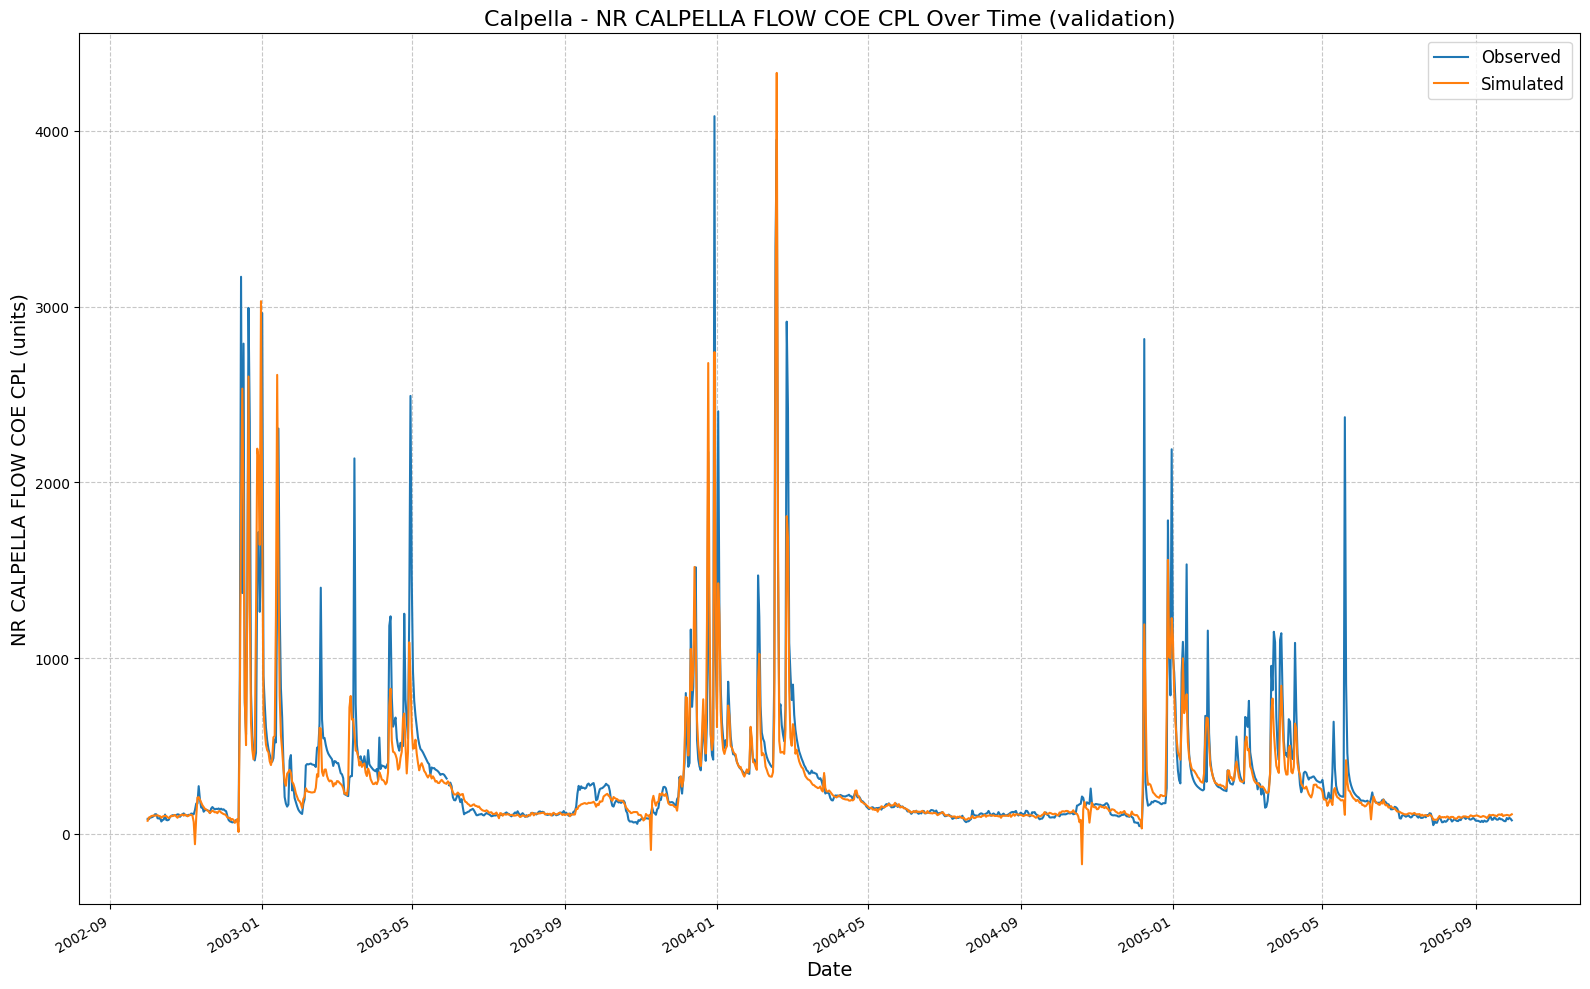

[INFO] CSV output saved at: c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224120\results_output_validation.csv


c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


In [14]:
if not skip_best_model_train:
    lstmNoPhysicsValBest = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=best_no_physics_params,
        input_features=None,
        physics_informed=False,
        physics_data_file=None,
        hourly=False,
        extend_train_period=False,
        gpu=0
    )
    lstmNoPhysicsValBest.train()
    no_physics_val_csv, no_physics_val_metrics = lstmNoPhysicsValBest.results()
    no_physics_val_metrics

2025-03-11 22:41:28,444: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224128\output.log initialized.
2025-03-11 22:41:28,445: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224128
2025-03-11 22:41:28,446: ### Run configurations for testing_run
2025-03-11 22:41:28,446: experiment_name: testing_run
2025-03-11 22:41:28,447: train_basin_file: calpella
2025-03-11 22:41:28,447: validation_basin_file: calpella
2025-03-11 22:41:28,448: test_basin_file: calpella
2025-03-11 22:41:28,449: train_start_date: 1994-10-01 00:00:00
2025-03-11 22:41:28,449: train_end_date: 2002-09-30 00:00:00
2025-03-11 22:41:28,450: validation_start_date: 2002-10-01 00:00:00
2025-03-11 22:41:28,450: validation_end_date: 2005-09-30 00:00:00
2025-03-11 22:41:28,451: test_start_date: 2005-10-01 00:00:00
2025-03-11 22:41:28,451: test_end_date: 2009-09-29 00:00:00
2025-03-1

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this ex

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]
2025-03-11 22:42:35,357: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224128\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:42:35,358: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224128\validation\model_epoch032\validation_results.p
got predictions


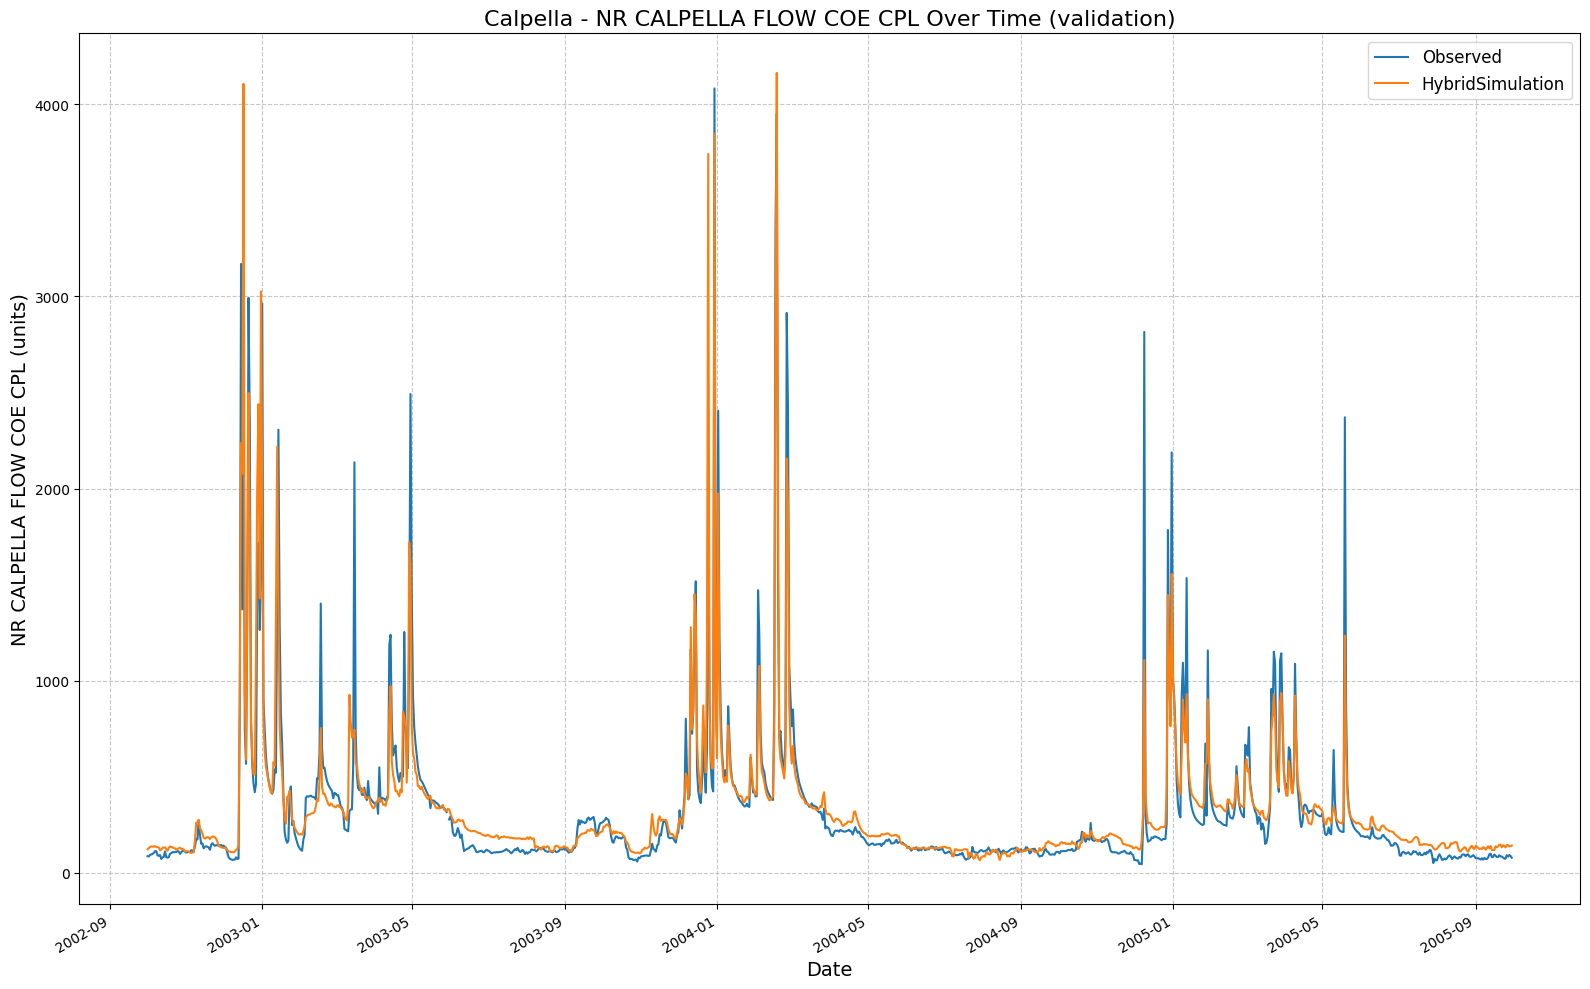

[INFO] CSV output saved at: c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224128\results_output_validation.csv


c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


In [15]:
if not skip_best_model_train:
    lstmPhysicsValBest = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=best_physics_params,
        input_features=features_with_physics,
        physics_informed=True,
        physics_data_file=path_to_physics_data,
        hourly=False,
        extend_train_period=False,
        gpu=-1
    )
    lstmPhysicsValBest.train()
    physics_val_csv, physics_val_metrics = lstmPhysicsValBest.results()
    physics_val_metrics

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\

[INFO] Wrote metrics CSV: CV_calpella_daily_val_metrics.csv
[INFO] Saved figure: CV_calpella_daily_val_model_comparison.png


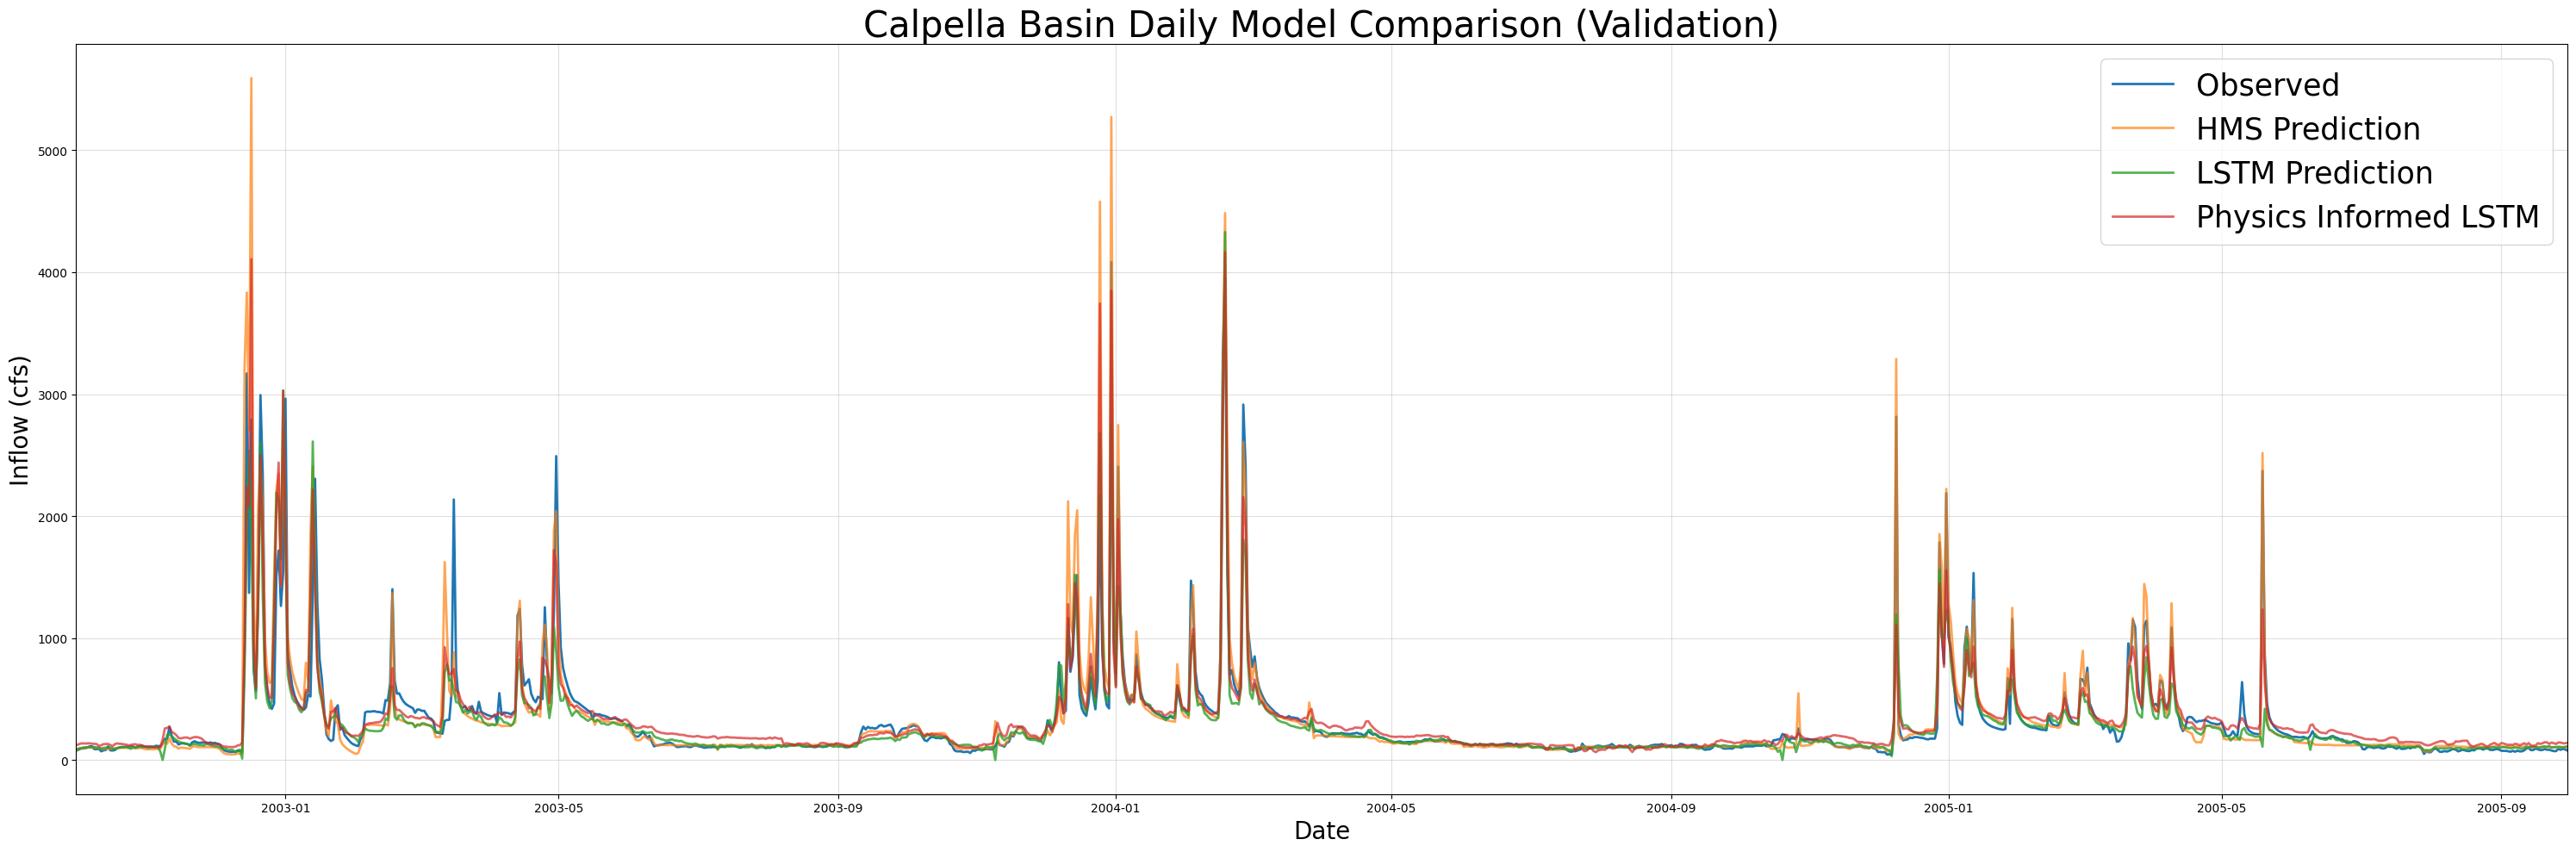

In [16]:
if not skip_best_model_train:
    combinedPlot(
        lstm_results=no_physics_val_csv,
        lstmPhysics_results=physics_val_csv,
        HMS_results=path_to_physics_data,
        title="Calpella Basin Daily Model Comparison (Validation)",
        fName="CV_calpella_daily_val_metrics.csv",
        plot_filename="CV_calpella_daily_val_model_comparison.png",
        timeseries_filename ="CV_calpella_daily_val_combined_ts.csv"
    )
else:
    combined_df = pd.read_csv("CV_calpella_daily_val_combined_ts.csv")
    combinedPlotFromDf(combined_df, title="Calpella Basin Daily Model Comparison (Validation)", fName="CV_calpella_daily_val_metrics.csv")

In [17]:
if not skip_best_model_train:
    fancyCombinedPlot(
        lstm_results=no_physics_val_csv,
        lstmPhysics_results=physics_val_csv,
        HMS_results=path_to_physics_data,  
        title='Calpella Basin Daily Model Comparison (Validation)',
        fName="CV_calpella_daily_val_metrics.csv",
        timeseries_filename ="CV_calpella_daily_val_combined_ts.csv"
    )
else:
    fancyCombinedPlotFromDf(combined_df, title='Calpella Basin Daily Model Comparison (Validation)', fName="CV_calpella_daily_val_metrics.csv")

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\

[INFO] Wrote metrics CSV: CV_calpella_daily_val_metrics.csv


In [18]:
if skip_best_model_train:
    test_metrics = pd.read_csv("CV_calpella_daily_val_metrics.csv", index_col=0)
    print(test_metrics)

### Re-run testing with best hyperparameters

2025-03-11 22:42:38,849: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224238\output.log initialized.
2025-03-11 22:42:38,850: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224238
2025-03-11 22:42:38,850: ### Run configurations for testing_run
2025-03-11 22:42:38,851: experiment_name: testing_run
2025-03-11 22:42:38,851: train_basin_file: calpella
2025-03-11 22:42:38,852: validation_basin_file: calpella
2025-03-11 22:42:38,853: test_basin_file: calpella
2025-03-11 22:42:38,854: train_start_date: 1994-10-01 00:00:00
2025-03-11 22:42:38,854: train_end_date: 2005-09-30 00:00:00
2025-03-11 22:42:38,855: validation_start_date: 2002-10-01 00:00:00
2025-03-11 22:42:38,855: validation_end_date: 2005-09-30 00:00:00
2025-03-11 22:42:38,856: test_start_date: 2005-10-01 00:00:00
2025-03-11 22:42:38,856: test_end_date: 2009-09-29 00:00:00
2025-03-1

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this e

# Validation: 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]
2025-03-11 22:42:50,005: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224238\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:42:50,008: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224238\validation\model_epoch032\validation_results.p
2025-03-11 22:42:50,018: Using the model weights from c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224238\model_epoch032.pt


c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this e

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]
2025-03-11 22:42:50,269: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224238\test\model_epoch032\test_metrics.csv
2025-03-11 22:42:50,272: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224238\test\model_epoch032\test_results.p
got predictions


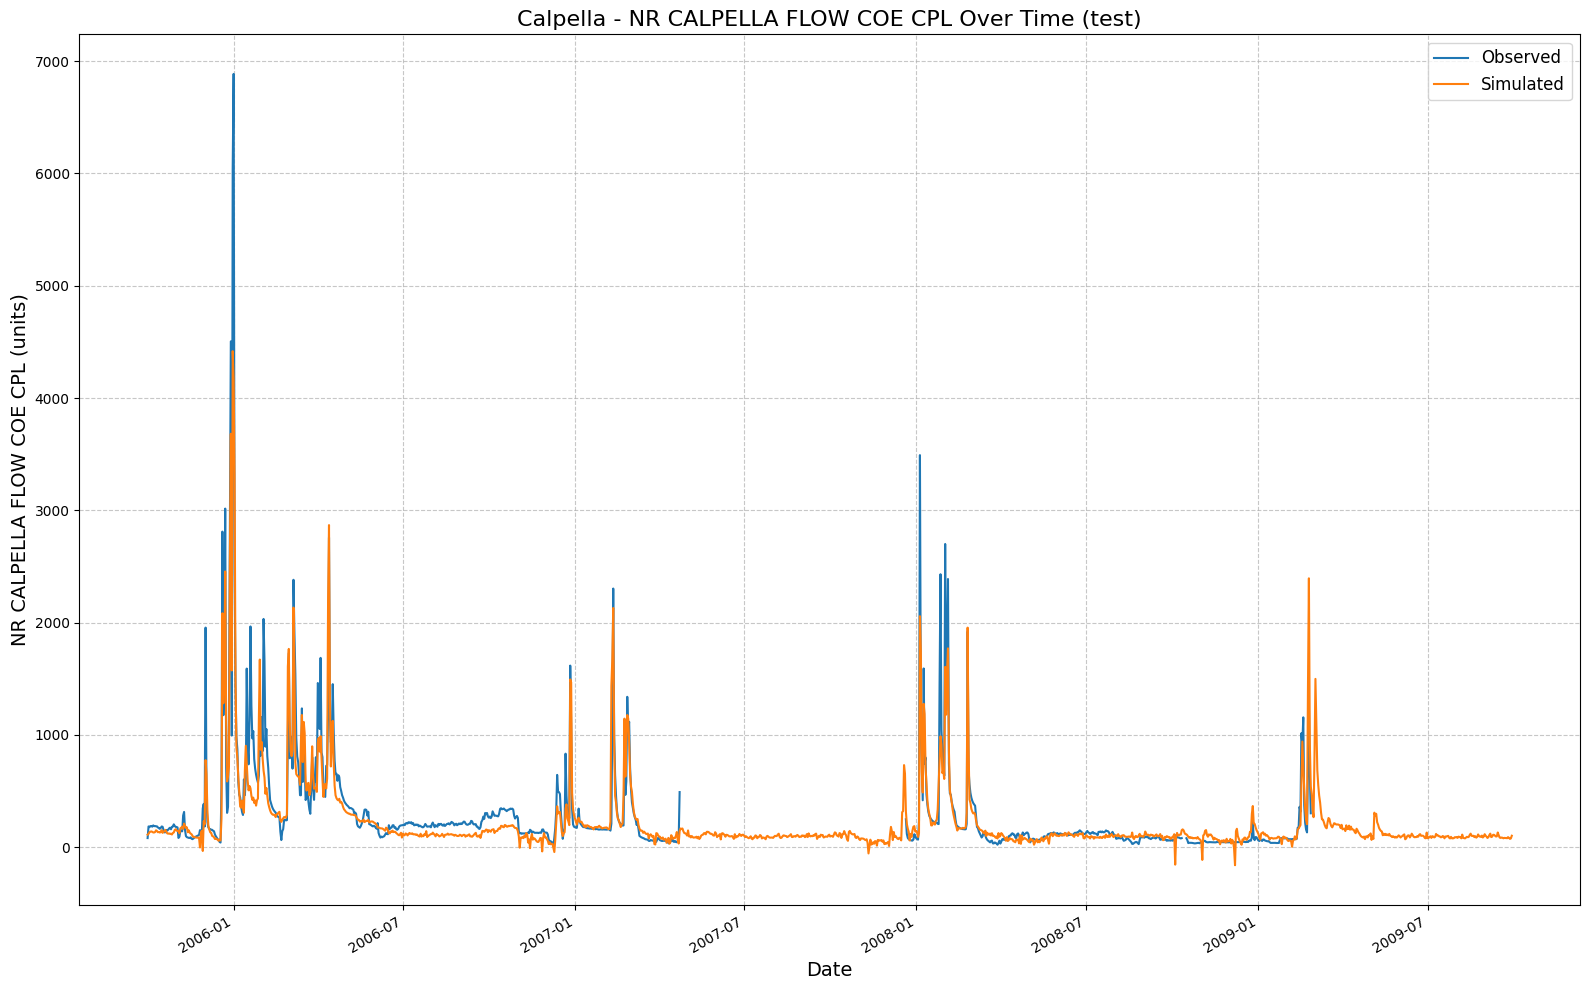

[INFO] CSV output saved at: c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224238\results_output_test.csv


c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.



In [19]:
if not skip_best_model_train:
    lstmNoPhysicsExtBest = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=best_no_physics_params,
        input_features=None,
        physics_informed=False,
        physics_data_file=None,
        hourly=False,
        extend_train_period=True,  
        gpu=0
    )
    
    lstmNoPhysicsExtBest.train()
    no_physics_test_csv, no_physics_test_metrics = lstmNoPhysicsExtBest.results('test')
    no_physics_test_metrics

2025-03-11 22:42:50,610: Logging to c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224250\output.log initialized.
2025-03-11 22:42:50,611: ### Folder structure created at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224250
2025-03-11 22:42:50,612: ### Run configurations for testing_run
2025-03-11 22:42:50,612: experiment_name: testing_run
2025-03-11 22:42:50,613: train_basin_file: calpella
2025-03-11 22:42:50,614: validation_basin_file: calpella
2025-03-11 22:42:50,615: test_basin_file: calpella
2025-03-11 22:42:50,616: train_start_date: 1994-10-01 00:00:00
2025-03-11 22:42:50,617: train_end_date: 2005-09-30 00:00:00
2025-03-11 22:42:50,617: validation_start_date: 2002-10-01 00:00:00
2025-03-11 22:42:50,618: validation_end_date: 2005-09-30 00:00:00
2025-03-11 22:42:50,618: test_start_date: 2005-10-01 00:00:00
2025-03-11 22:42:50,619: test_end_date: 2009-09-29 00:00:00
2025-03-1

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this e

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]
2025-03-11 22:43:02,798: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224250\validation\model_epoch032\validation_metrics.csv
2025-03-11 22:43:02,799: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224250\validation\model_epoch032\validation_results.p
2025-03-11 22:43:02,810: Using the model weights from c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224250\model_epoch032.pt


c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\evaluation\tester.py:133: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this e

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]
2025-03-11 22:43:03,169: Stored metrics at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224250\test\model_epoch032\test_metrics.csv
2025-03-11 22:43:03,170: Stored results at c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224250\test\model_epoch032\test_results.p
got predictions


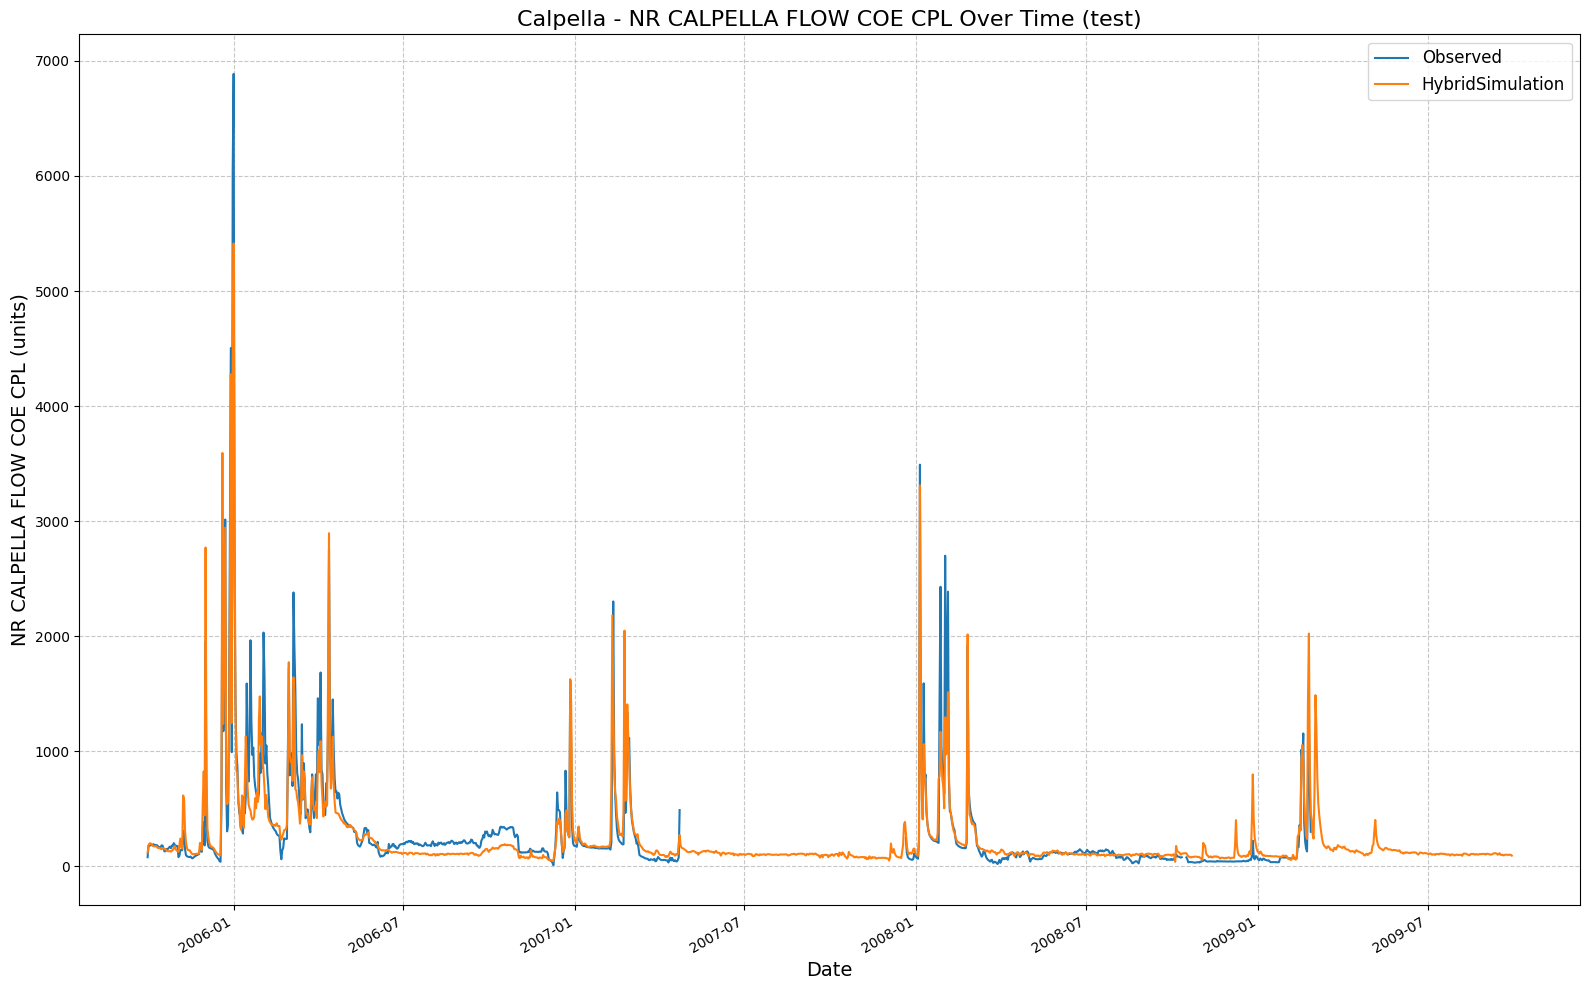

[INFO] CSV output saved at: c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\runs\testing_run_1103_224250\results_output_test.csv


c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.



In [20]:
if not skip_best_model_train:
    lstmPhysicsExtBest = UCB_trainer(
        path_to_csv_folder=path_to_csv,
        yaml_path=path_to_yaml,
        hyperparams=best_physics_params,
        input_features=features_with_physics,
        physics_informed=True,
        physics_data_file=path_to_physics_data,
        hourly=False,
        extend_train_period=True,
        gpu=0
    )
    
    lstmPhysicsExtBest.train()
    physics_test_csv, physics_test_metrics = lstmPhysicsExtBest.results('test')
    physics_test_metrics

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

[INFO] Wrote metrics CSV: CV_calpella_daily_test_metrics.csv
[INFO] Saved figure: CV_calpella_daily_test_model_comparison.png


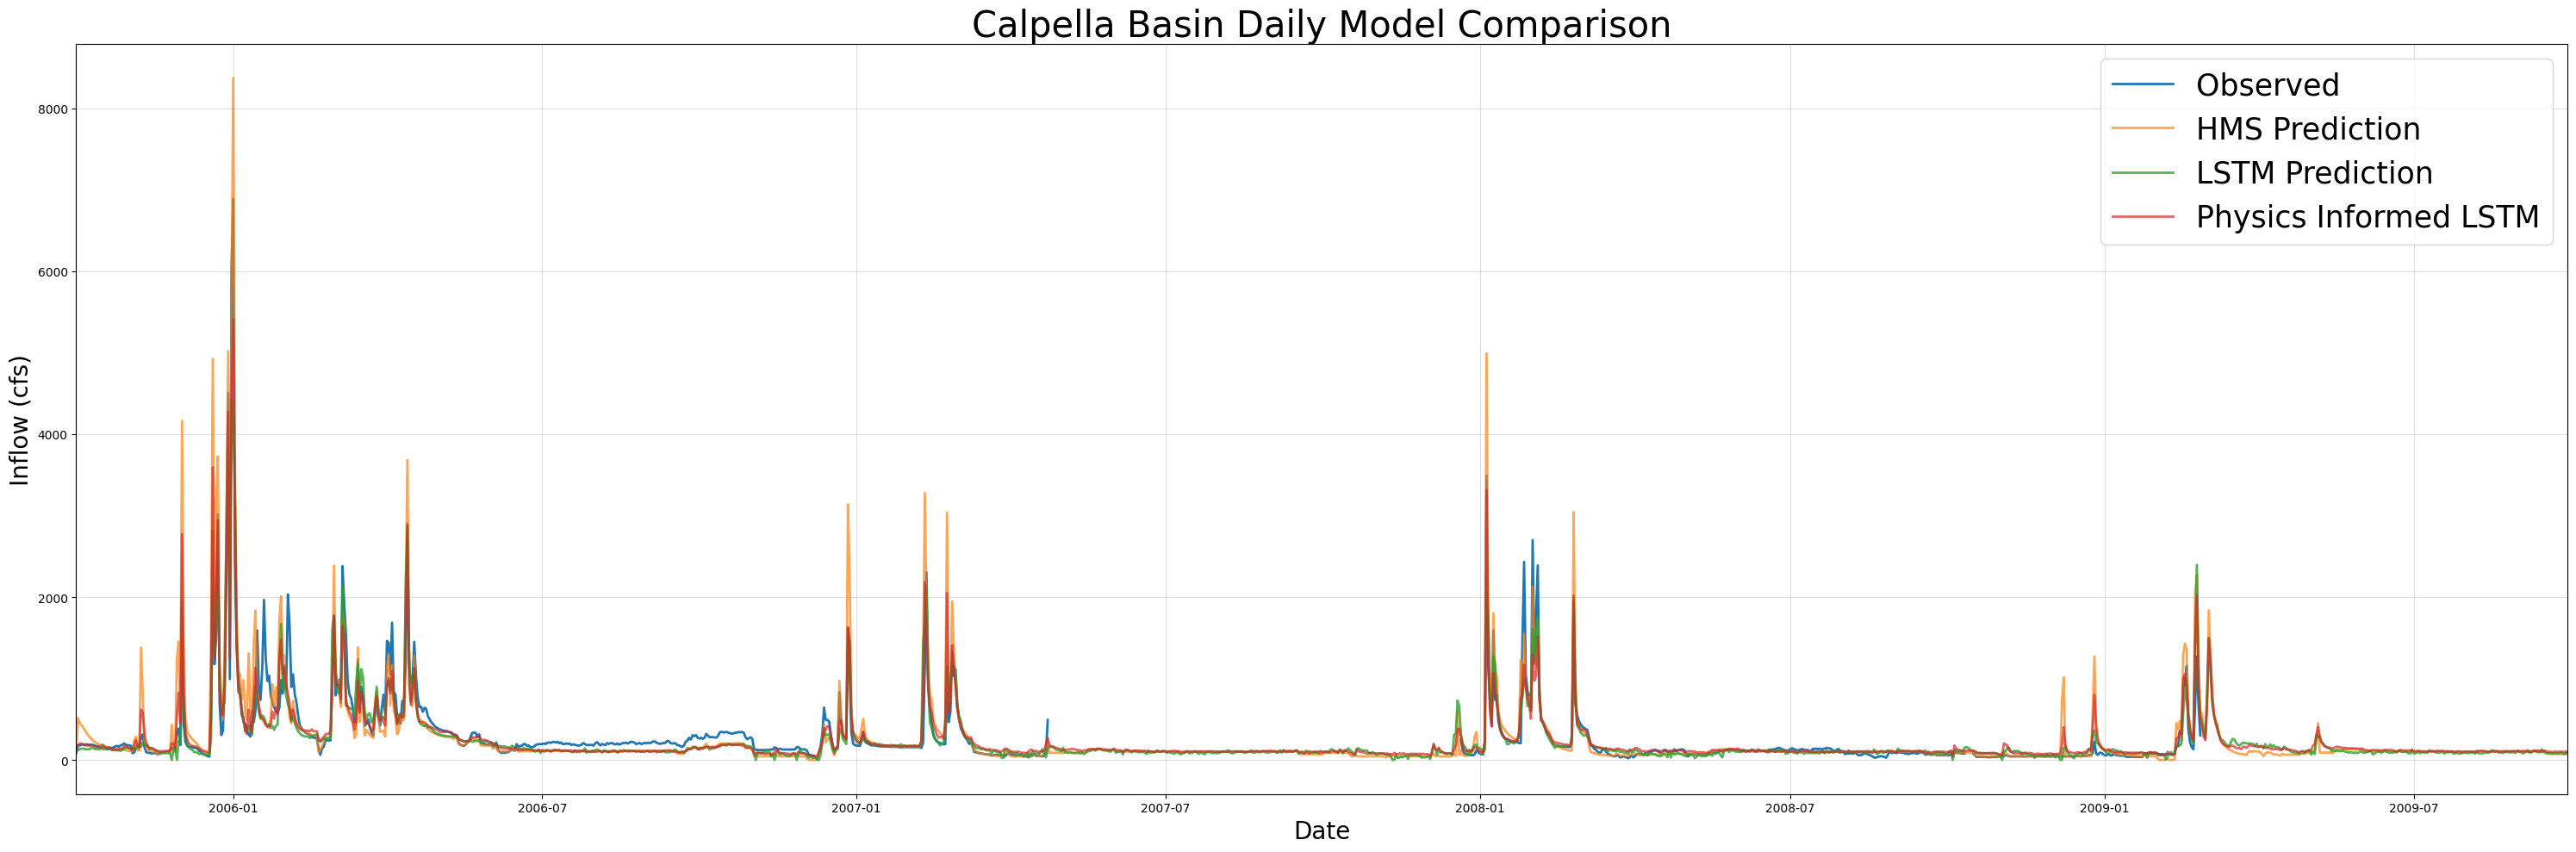

In [21]:
if not skip_best_model_train:
    combinedPlot(
        lstm_results=no_physics_test_csv,
        lstmPhysics_results=physics_test_csv,
        HMS_results=path_to_physics_data,
        title='Calpella Basin Daily Model Comparison',
        fName = "CV_calpella_daily_test_metrics.csv",
        plot_filename="CV_calpella_daily_test_model_comparison.png",
        timeseries_filename ="CV_calpella_daily_test_combined_ts.csv"
    )
else:
    combined_df = pd.read_csv("CV_calpella_daily_test_combined_ts.csv")
    combinedPlotFromDf(combined_df, title='Calpella Basin Daily Model Comparison', fName = "CV_calpella_daily_test_metrics.csv")

In [22]:
if not skip_best_model_train:
    fancyCombinedPlot(lstm_results=no_physics_test_csv, lstmPhysics_results= physics_test_csv, HMS_results=path_to_physics_data, title='Calpella Basin Daily Model Comparison', fName = "calpella_daily_test_metrics.csv", timeseries_filename ="calpella_daily_test_combined_ts.csv")
else:
    fancyCombinedPlotFromDf(combined_df, title='Calpella Basin Daily Model Comparison', fName = "calpella_daily_test_metrics.csv")

[INFO] Wrote metrics CSV: calpella_daily_test_metrics.csv


c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:339: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

c:\Users\arman\ucb-usace-lstm\UCB-USACE-LSTMs\UCB_training\models\calpella_all\..\..\..\..\UCB-USACE-LSTMs\neuralhydrology\datautils\utils.py:382: FutureWarning:

'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.

In [23]:
if skip_best_model_train:
    test_metrics = pd.read_csv("calpella_daily_test_metrics.csv", index_col=0)
    print(test_metrics)